# <center> AKUT KARACİĞER YETMEZLİĞİ TESPİTİ </center>


![alt text](https://imgrosetta.mynet.com.tr/file/2548751/2548751-1200x675.jpg)

### <center> *Dilara İşeri* - *21783561*</center>
### <center> *Umut Aydemir* - *21827148* </center>

## Abstract

Bu projede 2008-2009 ve 2014-2015 yılları arasında 20 yaş ve üstü Hindistan'da yaşayan toplam 8785 insandan alınan, insanların yaş, boy, demografik bilgi, gelir düzeyleri gibi bilgilerin buluduğu verileri kullnarak eğitimsel model oluşturulmuştur. Bu veri seti, akut karaciğer yetmezliği teşhisi adına kullanılmıştır. Aynı şekilde oluşturduğumuz model de bu bu durum için tahminde bulunmamıza yaramaktadır. Projede öncelikle veriyi analizi ettik. Bu adımda verisetindeki özellikler inceledik. Daha sonra veriyi modelleme için hazırladık. Bu adımda eksik verilerin doldurulması , kategorik özellikler için veri tipi dönüşümleri ve normalizasyon gibi işlemler uyguladık. Daha sonra denetimli öğrenme yöntemleriyle sınıflandırma modelleri oluşturduk. Projede sınıflandırma algoritmaları olarak : Lojistik regresyon, k- en yakın komşu sınıflandırıcısı, destek vektör makineleri , karar ağacı sınıflandırıcısı , rassal orman sınıflandırıcısı, ve AdaBoost sınıflandırıcısı kullandık. Son olarak oluşturulan modellerin başarılarını değerlendirdik. En başarılı model Rassal orman sınıflandırıcısı ve AdaBoost sınıflandırıcısı olmuştur. 

## İçerik

[Problem](#problem)   
[Verinin Anlaşılması](#data_understanding)   
[Verilerin Hazırlanması](#data_preparation)   
[Modelleme](#modeling)   
[Değerlendirme](#evaluation)   
[Referanslar](#references)   


# Problem <a id="problem"></a>


Siroz, hepatit ve kronik alkolizm gibi birçok karaciğer hastalığının sebebiyet verdiği karaciğerde ileri derecede hasar oluşumuna denir. Karaciğerde aşırı yara dokusu oluşmasıdır. Akut karaciğer yetmezliği ise, öncelikli olarak sağlıklı insanlarda ve aniden görülen bir hastalıktır. Akut ve kronik karaciğer iflaslarının ikisi de; proteinleri sağlayan ve toksinlerin dolaşımını sağlayan karaciğer hücrelerine zarar verir. Bu bakımdan siroz ve karaciğer yetmezliği birbirine benzerdir. Bu tür hastalıkların tespit edilmesi pahalı ve uzun sürede sonuçlanan tetkikler gerektirebilir. Bu da hem hastaların bu süreçte çok yıpranmasına hem de tedavi için oldukça zaman kaybetmelerine neden olabilir. Burada asıl önemli olan, akut karaciğer yetmezliğini bu tetkiklere gerek kalmadan doğru ve süratle teşhis edebilmektir. Eğer bu konuda isabetli tahminlerde bulunulabilinirse, çok geç olmadan önlem alınabilir ve olası kötü senaryolar önlenmiş olur.


Burada soracağımız ana sorular:

     1.Diğer veri özelliklerinden faydalanarak pahalı ve uzun sürede sonuçlanan tetkiklere gerek kalmadan hastalarda akut karaciğer yetmezliği olup olmadığını tahmin edebilir miyiz?

     2. Akut karaciğer yetmezliğini tetikleyen en önemli sebepler nelerdir?

Bu sorulara makine öğrenmesi ve denetimli öğrenme modellemeleri kullanarak cevap bulmaya çalışacağız.

## Veri Seti


1990'dan itibaren, Sağlık Teşhis ve Kontrol merkezi Hindistan'da yaşayan yetişkinler hakkında bilgi toplamayı amaçlamaktadır. Bu merkez yıllardan beridir eğitimli personelleri sayesinde insanların sağlıkları ve demografik yapısı hakkında direkt röportajlar, kan örnekleri ve anketler sayesinde bilgiler toplamaktadır. Bu veri ise 2008-2009 ve 2014-2015 yılları arasında 20 yaş ve üstü toplam 8785 insandan alınmıştır.

Veri seti, insanların sağlık durumları kadar, eğitim, yaşam vb. özellikleri de içinde bulundurmaktadır. Bu özellikten birkaç tanesi:

* Total Kolestrol
* Vücut Kitle Endeksi 
* Yaş
* Cinsiyet
* Evlilik Durumu
* Gelir 
* Nerede tedavi görüldü
* Görme Bozukluğu
* Hepatit
* ...

Buradaki verileri kullanarak akut karaciğer yetmezliği teşhisi koyabilir miyiz? Sorusuna cevap arayacağız. Ancak bu veri setini kullanmadan önce normalizasyon, eksik verileri doldurma vb. problemlerle ilgilenmeliyiz.

## Gerekli Kütüphaneler

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import io
import re 

# Verinin Anlaşılması<a id="data_understanding"></a>

Verinin anlaşılması elimizde olan verilerin problemi çözmek için yeterli olup olmadığını anlamamıza olanak sağlar. Veriyi anlaşılmasını ve veri yayılımını daha iyi anlamak için histogram ve grafikleri kullandık. Açıklayıcı istatistiklerle veriyi hazırlamak ve temizlemek için veri seti hakkında bilgi sahibi olmayı amaçladık.

**Veriyi yükleme**

Veri setini içeri aktarma.

In [2]:
# Load dataset
url = "ALF_Data.xlsx"

df = pd.read_excel(url)


**Verinin Başı**

Veri setimizin ilk 5 örneklemi. Sütunlar bilgileri, satırlar ise insanları temsil eder.

In [3]:
df.head()

,Age,Gender,Region,Weight,Height,Body Mass Index,Obesity,Waist,Maximum Blood Pressure,Minimum Blood Pressure,...,PoorVision,Alcohol Consumption,HyperTension,Family HyperTension,Diabetes,Family Diabetes,Hepatitis,Family Hepatitis,Chronic Fatigue,ALF
0,65,M,east,56.0,162.1,21.31,0.0,83.6,135.0,71.0,...,0.0,1,0.0,0,0.0,1,1.0,0.0,0.0,0.0
1,36,M,south,60.2,162.2,22.88,0.0,76.6,96.0,52.0,...,0.0,0,0.0,0,0.0,0,0.0,0.0,0.0,0.0
2,66,M,east,83.9,162.5,31.77,1.0,113.2,115.0,57.0,...,0.0,1,0.0,0,1.0,0,0.0,0.0,0.0,0.0
3,54,M,east,69.4,160.5,26.94,0.0,77.9,110.0,57.0,...,0.0,1,0.0,0,0.0,0,0.0,0.0,0.0,0.0
4,63,M,north,73.1,159.2,28.84,0.0,89.3,132.0,73.0,...,0.0,0,1.0,0,0.0,0,0.0,0.0,0.0,0.0


**Verinin Boyutu**



In [4]:
df.shape

(8785, 30)

Veri setimizde 8785 satır, 30 sütun bulunmakta.



**Veri Hakkında Genel Bilgi**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8785 entries, 0 to 8784
Data columns (total 30 columns):
Age                       8785 non-null int64
Gender                    8785 non-null object
Region                    8785 non-null object
Weight                    8591 non-null float64
Height                    8594 non-null float64
Body Mass Index           8495 non-null float64
Obesity                   8495 non-null float64
Waist                     8471 non-null float64
Maximum Blood Pressure    8481 non-null float64
Minimum Blood Pressure    8409 non-null float64
Good Cholesterol          8768 non-null float64
Bad Cholesterol           8767 non-null float64
Total Cholesterol         8769 non-null float64
Dyslipidemia              8785 non-null int64
PVD                       8785 non-null int64
Physical Activity         8775 non-null float64
Education                 8765 non-null float64
Unmarried                 8333 non-null float64
Income                    7624 non-nu

Veri setinde bulunan özelliklerin 21 tanesi float64, 6 tanesi int64 ve 3 tanesi object(string) veri tipindedir. Veriyi düzenlerken hangi özelliklerde veri tipi dönüşümü yapacağımıza karar vermek için bu tabloya ihtiyaç duyacağız. 

**Veri hakkında açıklama**

Verinin mean, std, min, max ve çeyrek bilgilerini görüntüleyeceğiz. Böylece versetindeki özelliklerin aldığı değerler ile ilgili daha detaylı bilgi sahibi olabileceğiz.


In [6]:
df.describe()

,Age,Weight,Height,Body Mass Index,Obesity,Waist,Maximum Blood Pressure,Minimum Blood Pressure,Good Cholesterol,Bad Cholesterol,...,PoorVision,Alcohol Consumption,HyperTension,Family HyperTension,Diabetes,Family Diabetes,Hepatitis,Family Hepatitis,Chronic Fatigue,ALF
count,8785.000000,8591.000000,8594.000000,8495.000000,8495.000000,8471.000000,8481.000000,8409.000000,8768.000000,8767.000000,...,8222.000000,8785.000000,8705.000000,8785.000000,8783.000000,8785.000000,8763.00000,8779.000000,8750.000000,6000.000000
mean,49.349915,79.100198,167.028124,28.296022,0.315951,96.845178,125.832213,71.516827,51.822536,152.587544,...,0.063610,0.304041,0.402412,0.233238,0.111351,0.311781,0.06653,0.020503,0.029029,0.077333
std,18.831309,19.406975,10.103450,6.184846,0.464921,15.101170,21.046860,12.672351,15.789131,42.976096,...,0.244071,0.460026,0.490412,0.422917,0.314585,0.463247,0.24922,0.141723,0.167896,0.267142
min,20.000000,25.600000,130.400000,12.040000,0.000000,58.500000,72.000000,10.000000,8.000000,27.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,33.000000,65.400000,159.700000,24.080000,0.000000,86.200000,111.000000,64.000000,41.000000,123.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,47.000000,76.800000,166.600000,27.360000,0.000000,96.300000,122.000000,72.000000,49.000000,149.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
75%,65.000000,89.550000,174.200000,31.380000,1.000000,106.100000,136.000000,79.000000,60.000000,177.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000
max,85.000000,193.300000,200.100000,66.440000,1.000000,173.400000,233.000000,132.000000,160.000000,684.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000


In [7]:
df.columns

Index(['Age', 'Gender', 'Region', 'Weight', 'Height', 'Body Mass Index',
       'Obesity', 'Waist', 'Maximum Blood Pressure', 'Minimum Blood Pressure',
       'Good Cholesterol', 'Bad Cholesterol', 'Total Cholesterol',
       'Dyslipidemia', 'PVD', 'Physical Activity', 'Education', 'Unmarried',
       'Income', 'Source of Care', 'PoorVision', 'Alcohol Consumption',
       'HyperTension', 'Family  HyperTension', 'Diabetes', 'Family Diabetes',
       'Hepatitis', 'Family Hepatitis', 'Chronic Fatigue', 'ALF'],
      dtype='object')

Verimizde bulunan tüm satırlar ve isimleri.

**Eksik Verilerin Gösterilmesi**

Verimizde eksik değerlerin gösterilmesi verinin analizi açısından önemlidir. Modelleme adımına geçmeden önce eksik veriler ile ilgilenilmesi ve bu eksik verilerin doldurulması ya da veri setinden çıkarılması gerekir.Çok fazla eksik veriye sahip özellikler veriden çıkartılabilir.

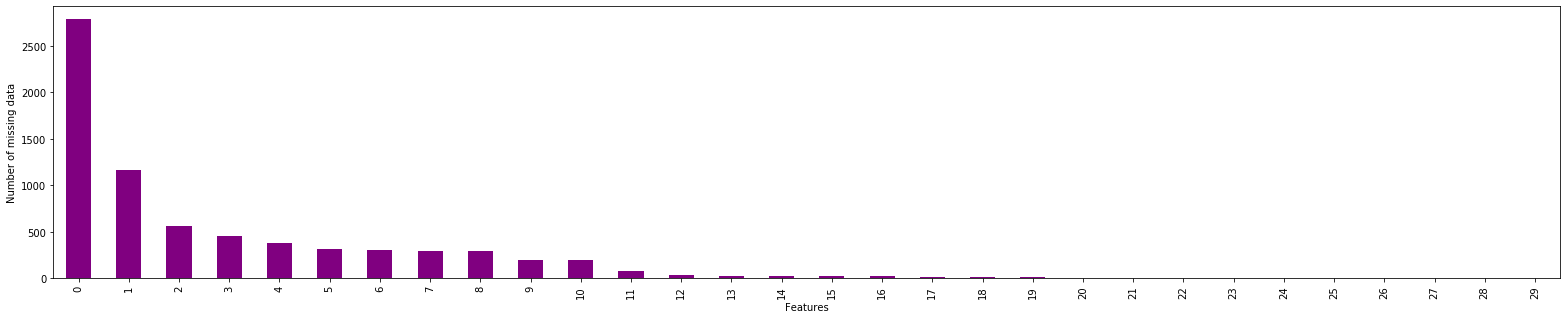

,Total missing,Percentage
ALF,2785,31.701764
Income,1161,13.215709
PoorVision,563,6.408651
Unmarried,452,5.145134
Minimum Blood Pressure,376,4.280023
Waist,314,3.574274
Maximum Blood Pressure,304,3.460444
Obesity,290,3.301081
Body Mass Index,290,3.301081
Weight,194,2.208310


In [8]:
def printMissingData (df):
    total = df.isnull().sum().sort_values(ascending=False)

    null_count = df.isnull().count()
    null= df.isnull().sum()

    percentage_missing = (null/null_count).sort_values(ascending=False)
    missing_data = pd.concat([total, percentage_missing*100], axis=1, keys=['Total missing', 'Percentage'])
    
    plt.figure(figsize=(27,5))
    total.plot.bar(color ='purple')
    y = ((lambda x: str(x)) (x) for x in range(len(df.columns)))
    plt.xticks(np.arange(len(df.columns)), (y))

    plt.ylabel("Number of missing data")
    plt.xlabel("Features")
    plt.show()
    return missing_data
missing_data=printMissingData(df)
missing_data

En çok eksik veri hedefimiz olan ALF'de çıkmıştır. Onu Income, PoorVisin ve Unmarried özellikleri takip etmektedir.

##  Veri Analizi

Bu kısımda veri setindeki sütunlar hakkında analizer yapacağız. Bu sütunların temsil ettiği özelliklerin veri setinde nasıl dağıldığını inceleyeceğiz. Aşadaki yöntem parametre olrak aldığı özelliğin değerlere göre dağılımını bar grafiği ile görselleştirmektedir.

In [9]:
import seaborn as sns
def plot_feature_counts(column_name):
  sns.set(font_scale=1.4)
  df[column_name].value_counts().plot(kind='bar', figsize=(30, 6), rot=0, color='purple')
  plt.xlabel(column_name, labelpad=14)
  plt.ylabel("Count of Patients", labelpad=14)
  plt.title(column_name+ " of the Patients", y=1.02);

### **Age**

Ankete katılanların yaşlarını gösteren özelliktir. Olası arağılın dışında bulunan örneklemleri dahil etmeyiz.Yaşı 100'den büyük veya 10'dan küçük olanları "0" kabul ederiz. Veri setindeki tüm değerleri görmek için de unique() methodunu kullandık.

In [10]:

df.loc[df['Age']>100, 'Age'] = 0
df.loc[df['Age']<10, 'Age'] = 0
df['Age'].unique()

array([65, 36, 66, 54, 63, 26, 59, 53, 78, 47, 62, 60, 30, 28, 52, 24, 38,
       85, 21, 46, 74, 58, 35, 27, 81, 44, 32, 72, 48, 83, 50, 73, 43, 71,
       41, 39, 64, 34, 22, 40, 25, 20, 45, 42, 70, 29, 61, 37, 68, 76, 49,
       67, 82, 79, 56, 51, 80, 75, 77, 33, 69, 31, 23, 57, 55, 84])

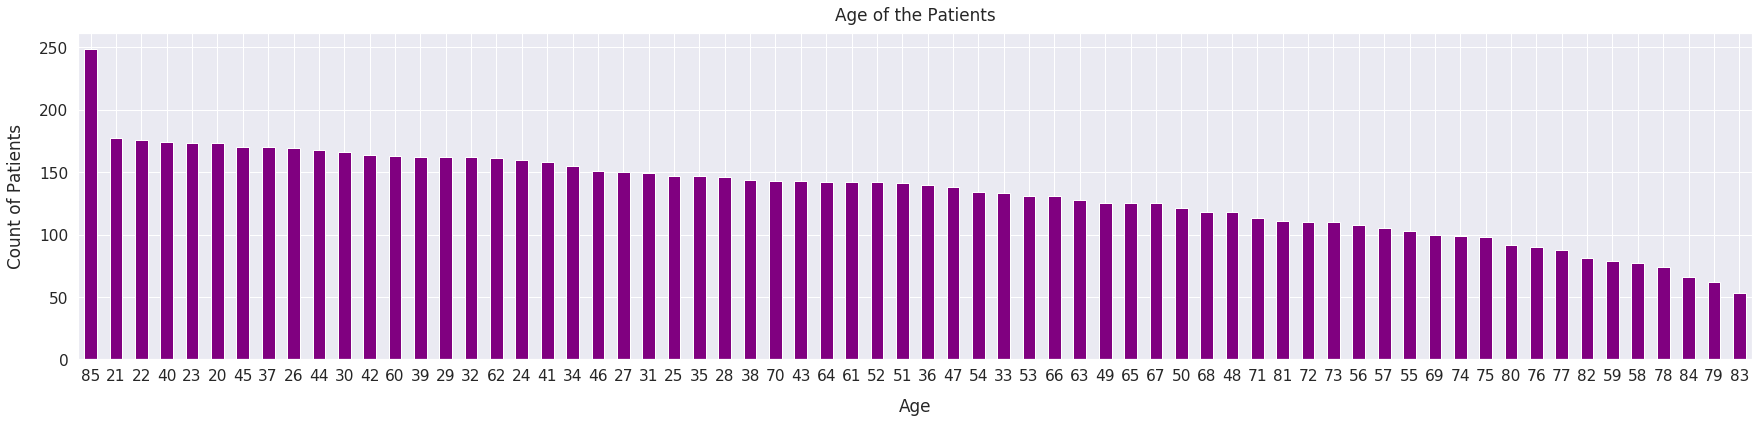

In [11]:
plot_feature_counts('Age')

In [12]:
df['Age'].value_counts()

85    249
21    177
22    176
40    174
23    173
     ... 
58     77
78     74
84     66
79     62
83     53
Name: Age, Length: 66, dtype: int64

Yukarıdaki grafikte katılımcıların çoğunun 20-40 yaş aralığında olduğu ancak 85 yaşın da en fazla yoğunlukta olduğu anlaşılmaktadır.

### **Gender**

Katılımcıların cinsiyetlerini gösteren özelliktir. Histogram ile cinsiyet dağılımını gözlemlemeye çalışıyoruz.

In [13]:
df['Gender'].unique()

array(['M', 'F'], dtype=object)

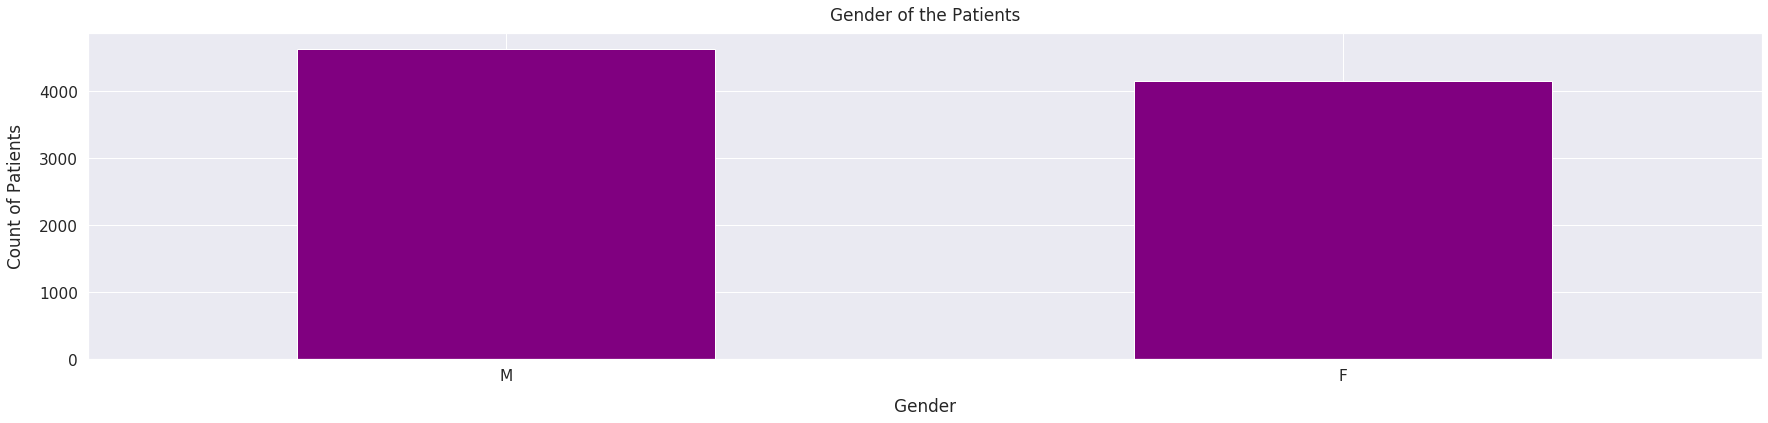

In [14]:
plot_feature_counts('Gender')

Cinsiyet verimizde görüldüğü üzere eksik bilgi yoktur. Kadın ve erkek bilgileri de birbirine yakındır ancak veri setinde erkek örneklem sayısı daha fazladır.

### **Region**

Hastaların hangi bölgeden geldiklerini ifade eden özelliktir. Burada örneklemlerin bölgelere göre dağılımlarını inceleyeceğiz.

In [15]:
df['Region'].unique()

array(['east', 'south', 'north', 'west'], dtype=object)

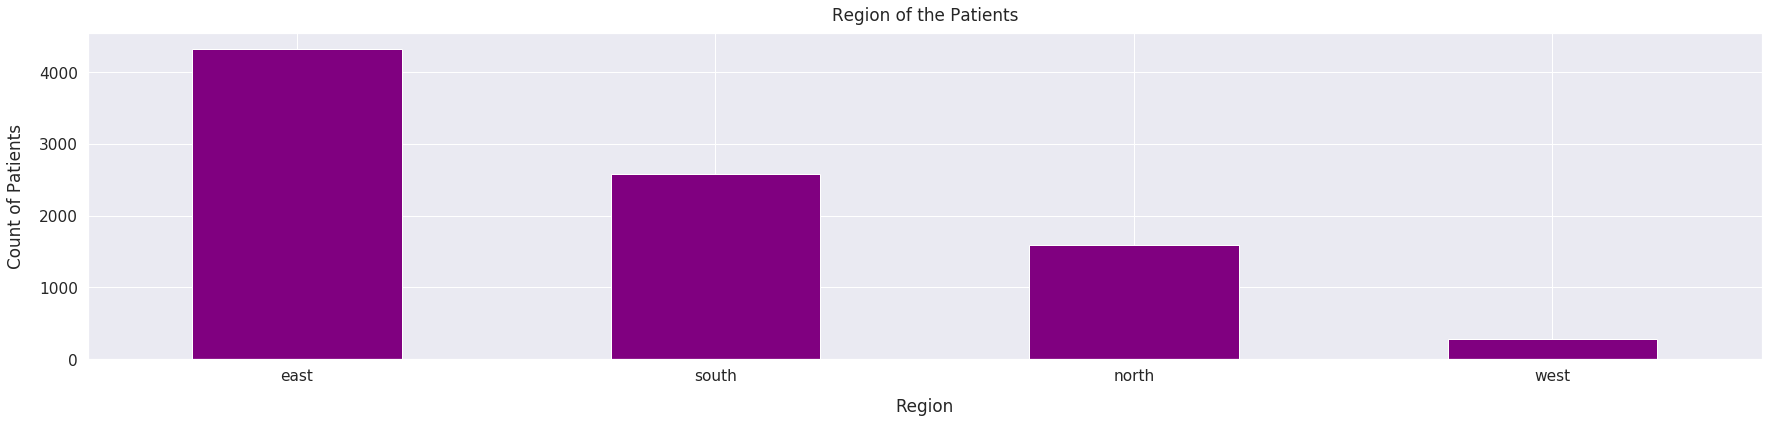

In [16]:
plot_feature_counts('Region')

Bölge verimizde de eksik veri bulunmamaktadır. Hastaların çoğunluğu doğudan gelirken, doğuyu güney, kuzey ve batı takip eder.

### **BMI**

Vücut kitle endeksini gösteren özelliktir. Bu özelliği kullanırken hastanın kilo ve boyunu değil, özelliğin kendisini kullandık. Neredeyse herkesin bmi değeri farklı olacağından dolayı grafikte aralıklar vererek göstermeyi tercih ettik.


In [17]:
print(df['Body Mass Index'].unique())
print("Maximum value : " + str(df['Body Mass Index'].max()))
print("Minimum value : " + str(df['Body Mass Index'].min()))

[21.31 22.88 31.77 ... 34.84 36.95 30.48]
Maximum value : 66.44
Minimum value : 12.04


In [18]:
df['Body Mass Index'].value_counts()

26.51    16
24.85    15
27.55    15
25.23    13
28.08    13
         ..
40.54     1
18.34     1
32.03     1
42.52     1
36.16     1
Name: Body Mass Index, Length: 2439, dtype: int64

25-29.9      3089
18.5-24.9    2583
30-34.9      1596
35-40         744
41-67         344
0-18.4        139
Name: Body Mass Index, dtype: int64


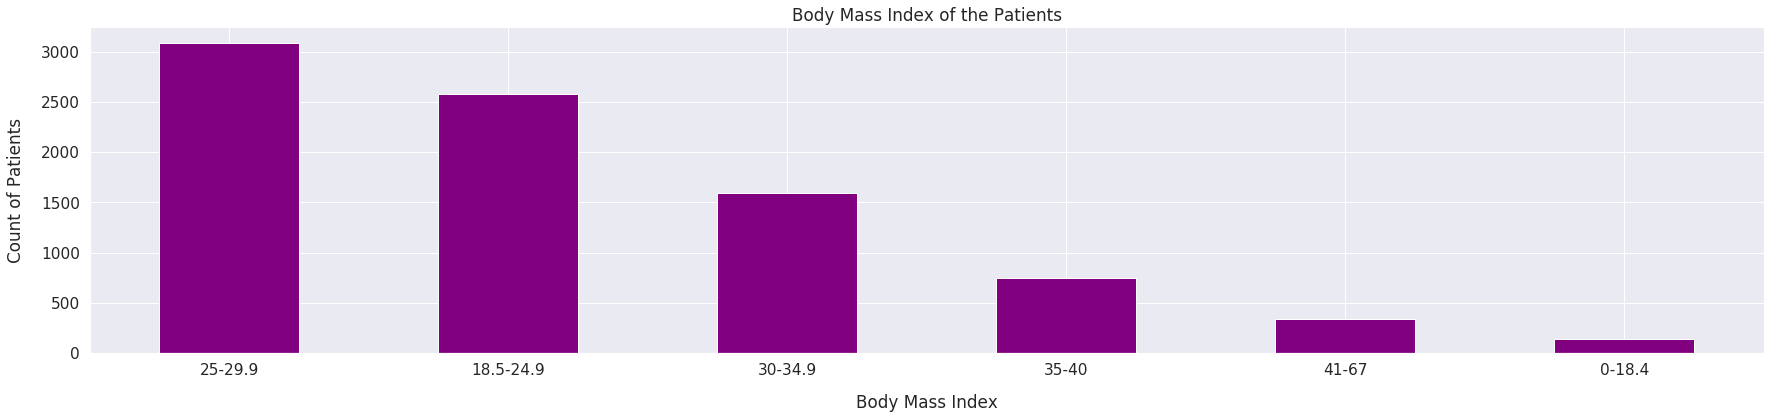

In [19]:
sns.set(font_scale=1.4)
BMI_groups=pd.cut(df['Body Mass Index'], [0, 18.5, 25, 30, 35, 41,67], labels=["0-18.4", "18.5-24.9", "25-29.9", "30-34.9", "35-40","41-67"], include_lowest=True)
print(BMI_groups.value_counts())
df['BMI_groups']= BMI_groups
BMI_groups.value_counts().plot(kind='bar', figsize=(30, 6), rot=0, color='purple')
plt.xlabel('Body Mass Index', labelpad=16)
plt.ylabel("Count of Patients", labelpad=16)
plt.title('Body Mass Index'+ " of the Patients");

Hastaların çoğunluğunun vücut kitle endeksi 25-29.9 aralığındadır. Bunu 18.5-24.9 takip eder.

### **Obesity**

Hastaların obezite olup olmadığını belirten veridir. İki farklı olasılık vardır.

In [20]:
df['Obesity'].unique()

array([ 0.,  1., nan])

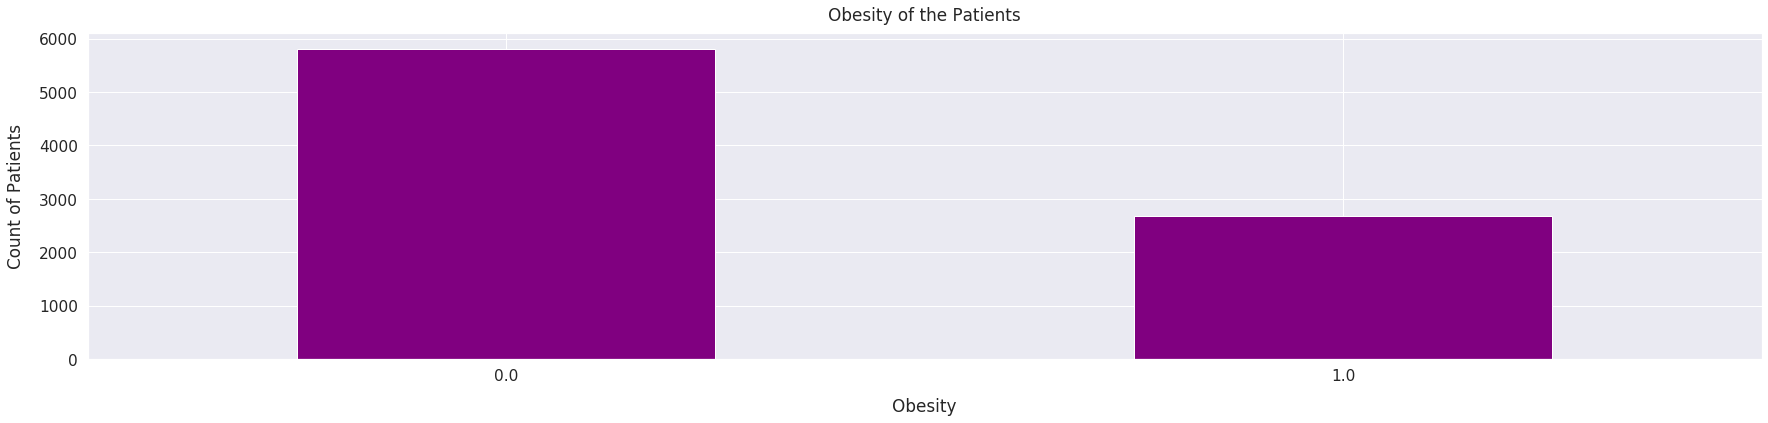

In [21]:
plot_feature_counts('Obesity')

Obeziteyi açıklarken, eksik veriler yerine nan koyduk. Verinin analizine göre, obezite olmayan hastaların sayısı obezite olan hastaların sayısının iki katıdır.

### **Waist**

Hastaların bel çevresinin uzunluğunu gösteren veridir. Bu veri setinde 58.5 ile 173.4 arasında değişmektedir.

In [22]:
df.loc[df['Waist']<30, 'Waist'] = df['Waist'].mean()

print("Maximum value : " + str(df['Waist'].max()))
print("Minimum value : " + str(df['Waist'].min()))

Maximum value : 173.4
Minimum value : 58.5


60-80      4026
80-100     2716
0-60       1142
100-120     520
120-140      61
140-174       6
Name: Waist, dtype: int64


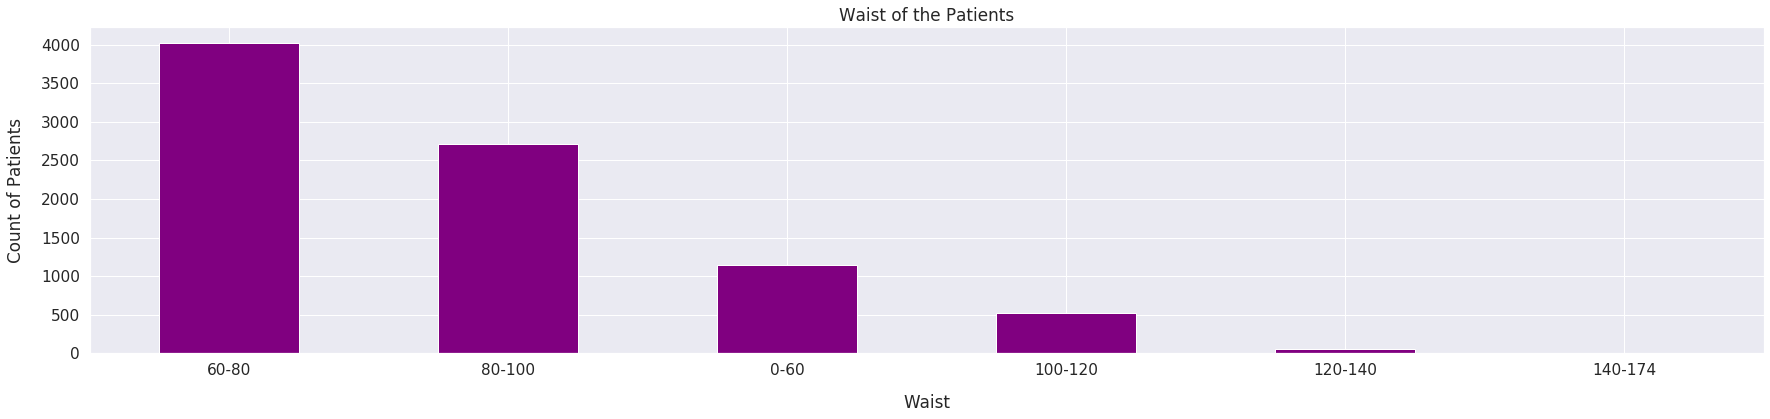

In [23]:
sns.set(font_scale=1.4)
Waist_groups=pd.cut(df['Waist'], [58, 80, 100, 120, 140, 160,174], labels=["0-60", "60-80", "80-100", "100-120", "120-140","140-174"], include_lowest=True)
print(Waist_groups.value_counts())

Waist_groups.value_counts().plot(kind='bar', figsize=(30, 6), rot=0, color='purple')
plt.xlabel('Waist', labelpad=16)
plt.ylabel("Count of Patients", labelpad=16)
plt.title('Waist'+ " of the Patients");

Hastaların çoğunun bel uzunluğu 60-80 cm arası değişmektedir. Bu veri setinde 30 dan düşük uzunlukları veri setinin ortalaması olarak değiştirdik. 100-140 arası çok az hasta olduğu gözlenir. Bel çevresi uzunluğu, hastaların kilo ve vücut kitle endeksi değerleriyle doğru orantılıdır.

### **Total Cholesterol**

Hastaların total kolestrol verilerinin ölçümünü veren veridir. Bu veride 72.0 ile 727.0 arasında değişiklik gösterir.

In [24]:
print("Maximum value : " + str(df['Total Cholesterol'].max()))
print("Minimum value : " + str(df['Total Cholesterol'].min()))

Maximum value : 727.0
Minimum value : 72.0


0-100      4333
100-200    4239
200-300     167
300-400       9
500-600       2
600-700       1
400-500       0
Name: Total Cholesterol, dtype: int64


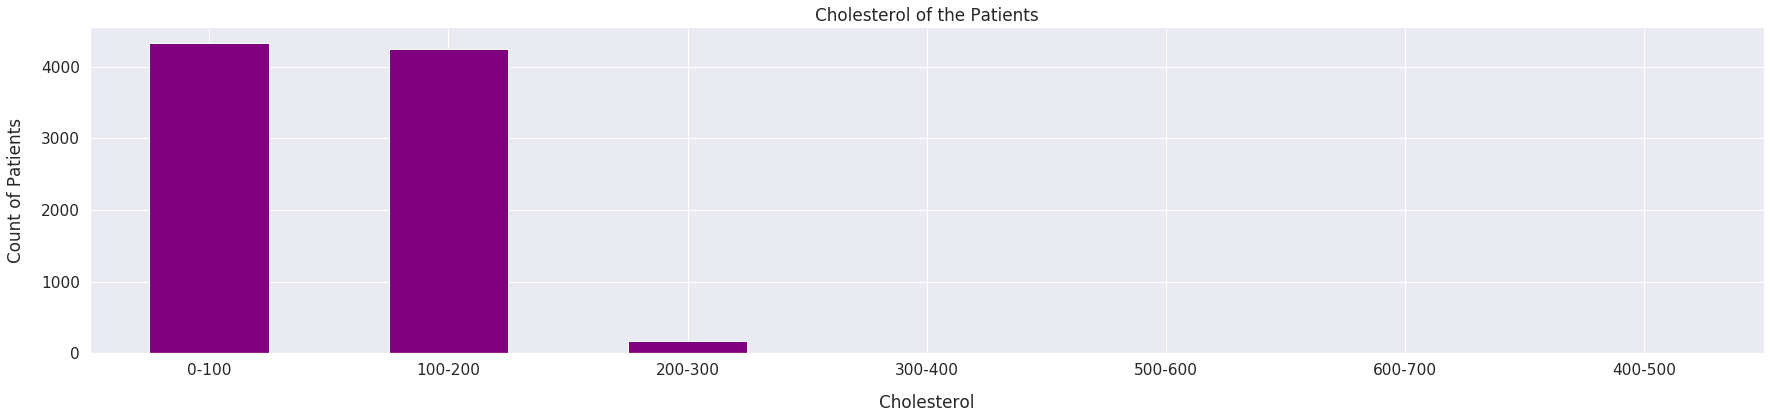

In [25]:
sns.set(font_scale=1.4)
Cholesterol_groups=pd.cut(df['Total Cholesterol'], [100, 200, 300, 400, 500, 600,700,800], labels=["0-100", "100-200", "200-300", "300-400", "400-500","500-600","600-700"], include_lowest=True)
print(Cholesterol_groups.value_counts())

Cholesterol_groups.value_counts().plot(kind='bar', figsize=(30, 6), rot=0, color='purple')
plt.xlabel('Cholesterol', labelpad=16)
plt.ylabel("Count of Patients", labelpad=16)
plt.title('Cholesterol'+ " of the Patients");

Hastaların kolestrolünün çok farklı değer alabileceğinden dolayı aralıklarla değendirmeye karar verdik. 300-700 arası çok nadir sıklıkta olduğu gözlemleniyor. Hastaların geneli 0-100 ve 100-200 arasında değişmekte.

### **Dyslipidemia**


Dislipidemi, kan lipid seviyesinin aşırı olması hastalığıdır. Hastada bu hastalığın bulunması 1, bulunamaması 0 olarak gösterilmiştir. 

In [26]:
df['Dyslipidemia'].unique()

array([0, 1])

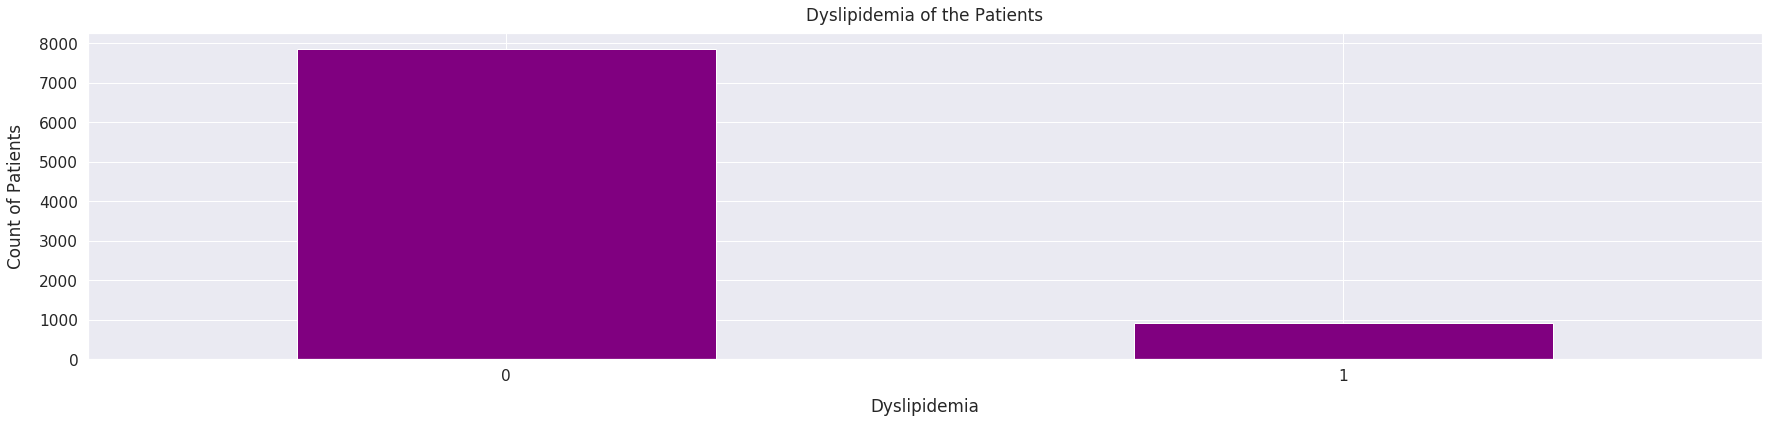

In [27]:
plot_feature_counts('Dyslipidemia')

Dislipidemi olmayan hastaların sayısı ile olan hastaların sayısı arasında 8:1 e yakın bir oran vardır. Bu hastalığı temsil eden sütunda da eksik veri bulunmamaktadır.

### **PVD**

PVD, hastada damar tıkanıklığı olup olmadığını gösteren veridir. Hastada olması 1, olmaması 0'ı gösterir.

In [28]:
df['PVD'].unique()

array([0, 1])

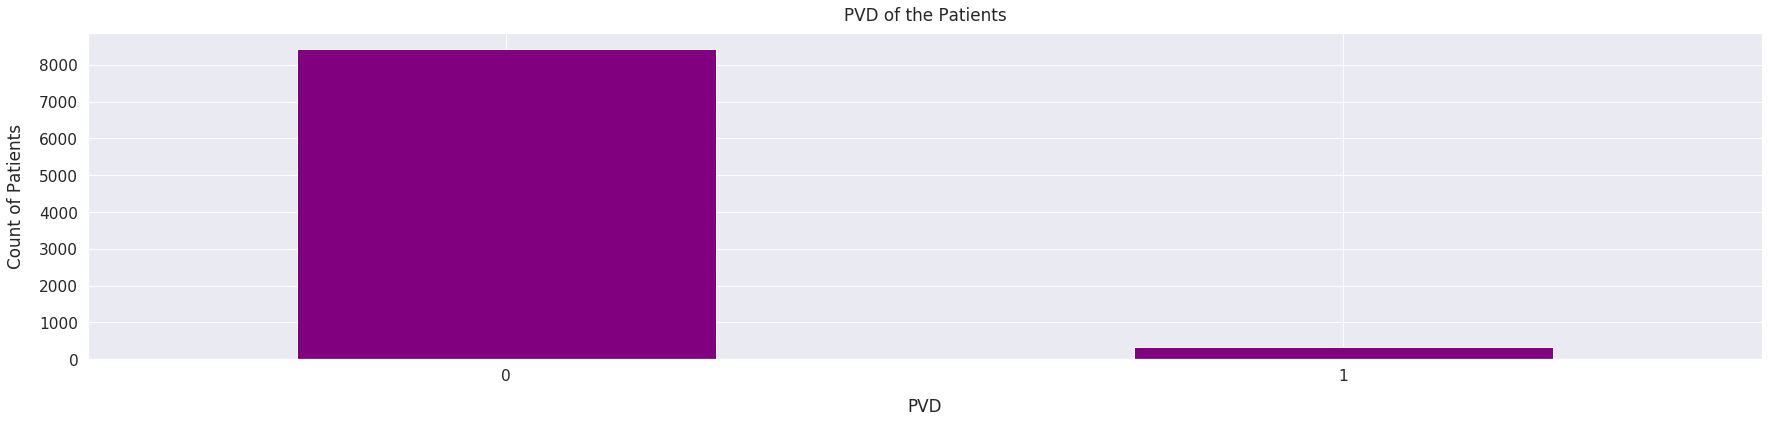

In [29]:
plot_feature_counts('PVD')

Hastaların büyük çoğunluğunda damar tıkanıklığı bulunmamaktadır. 

### **Physical Activity**

Hastalar tarafından "Haftada hangi sıklıkla fiziksel aktivitede bulunursunuz?" sorusuna verilen cevaptır. Bu sıklıklar, sayıların çoktan aza sıralanmasıyla yerleştirilir. Eksik veriler 'nan' olarak atanmıştır.

4 - çok sık

3 - sık

2 - biraz

1 - az

In [30]:
df['Physical Activity'].unique()

array([ 3.,  1.,  2.,  4., nan])

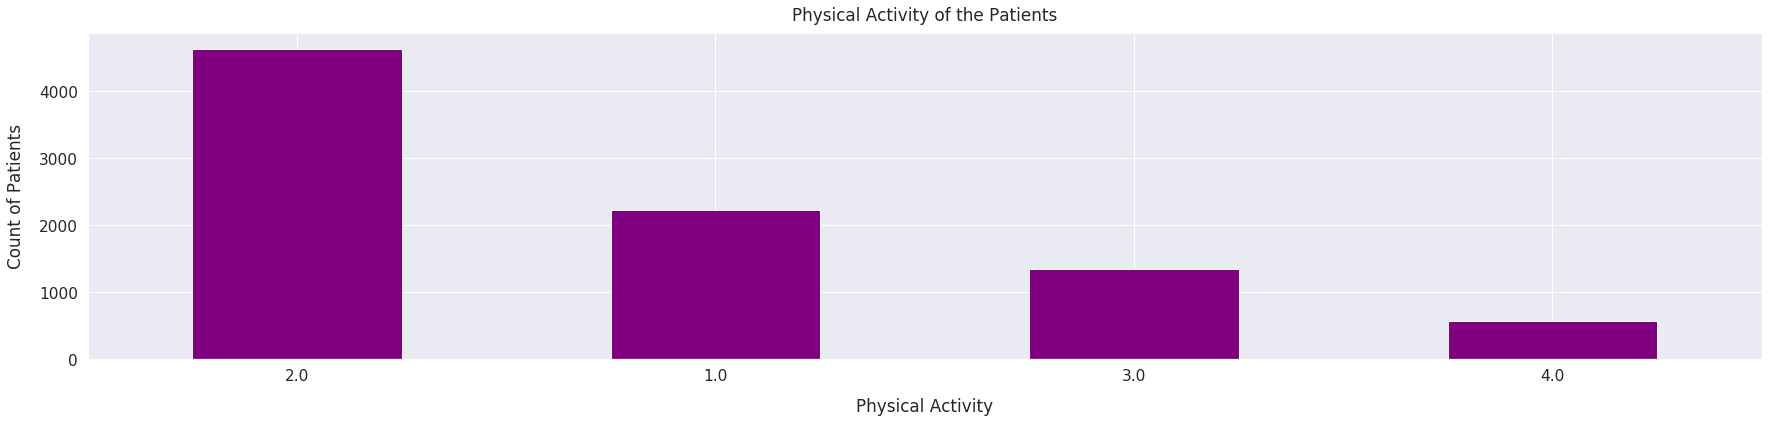

In [31]:
plot_feature_counts('Physical Activity')

Hastaların daha çok orta sıklıkta aktivite yaptığını görmekteyiz. Ancak bunu en az sıklığın takip etmesi, veri hakkında biraz bilgi verebilir.

### **Education**

"Eğitim görüyor musunuz" sorusuna hastaların verdiği cevaplardır. Eğitim görmekte olan hastalar 1 ile, görmeyen hastalar 0 ile temsil edilir. Eksik veriler 'nan' ile belirtilir.

In [32]:
df['Education'].unique()

array([ 0.,  1., nan])

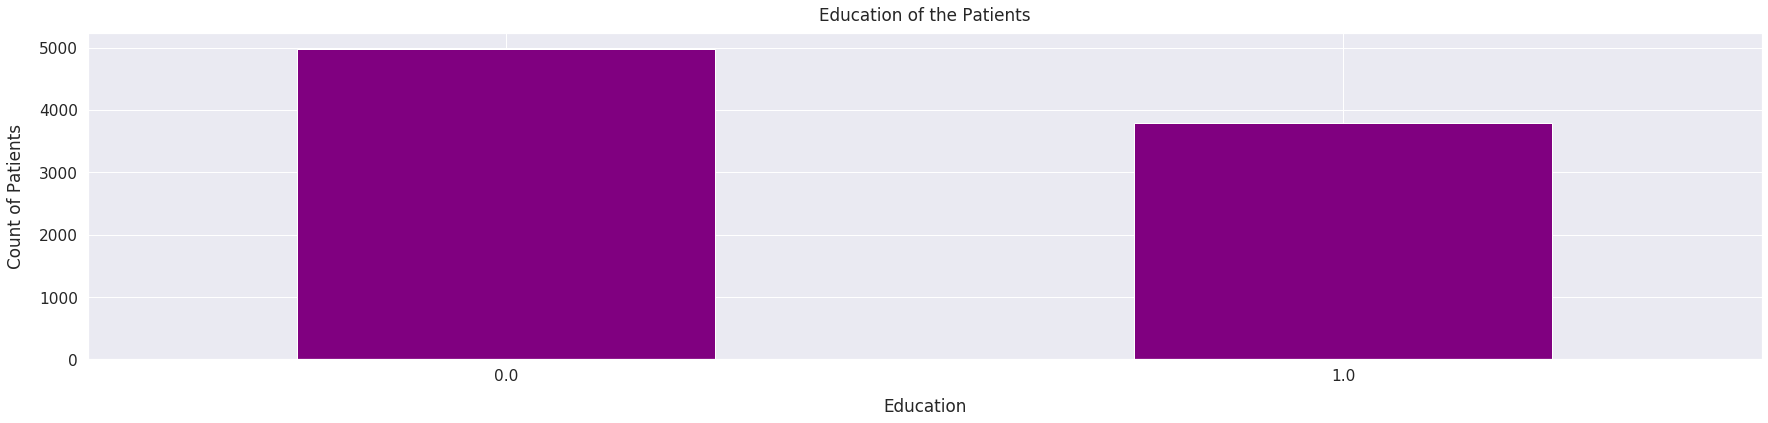

In [33]:
plot_feature_counts('Education')

Eğitim görmeyen hastaların ağırlıkta olduğu bilgisine sahip oluyoruz.

### **Unmarried**

"Bekar mısınız?" sorusuna hastaların verdiği cevaptır. Hasta bekar ise 1, değil ise 0, veri eksikse 'nan' olarak belirtilir.

In [34]:
df['Unmarried'].unique()

array([ 0., nan,  1.])

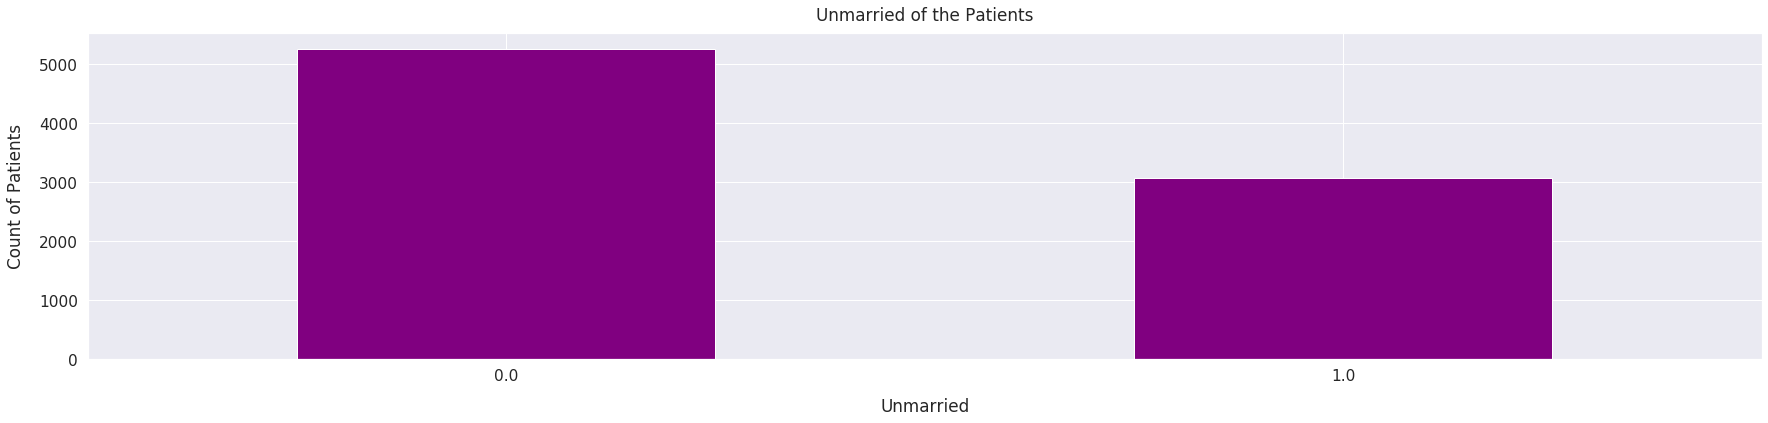

In [35]:
plot_feature_counts('Unmarried')

Yukarıdaki grafiğe göre bu veri setinden evli hastaların daha fazla olduğuna ulaşıyoruz.

### **Income**

Hastanın bir geliri olup olmadığını anladığımız özelliktir. Hastaya "Bir geliriniz var mı?" sorusu sorularak elde edilir. Eksik verilerde 'nan' kullanıldı.

In [36]:
df['Income'].unique()

array([ 1.,  0., nan])

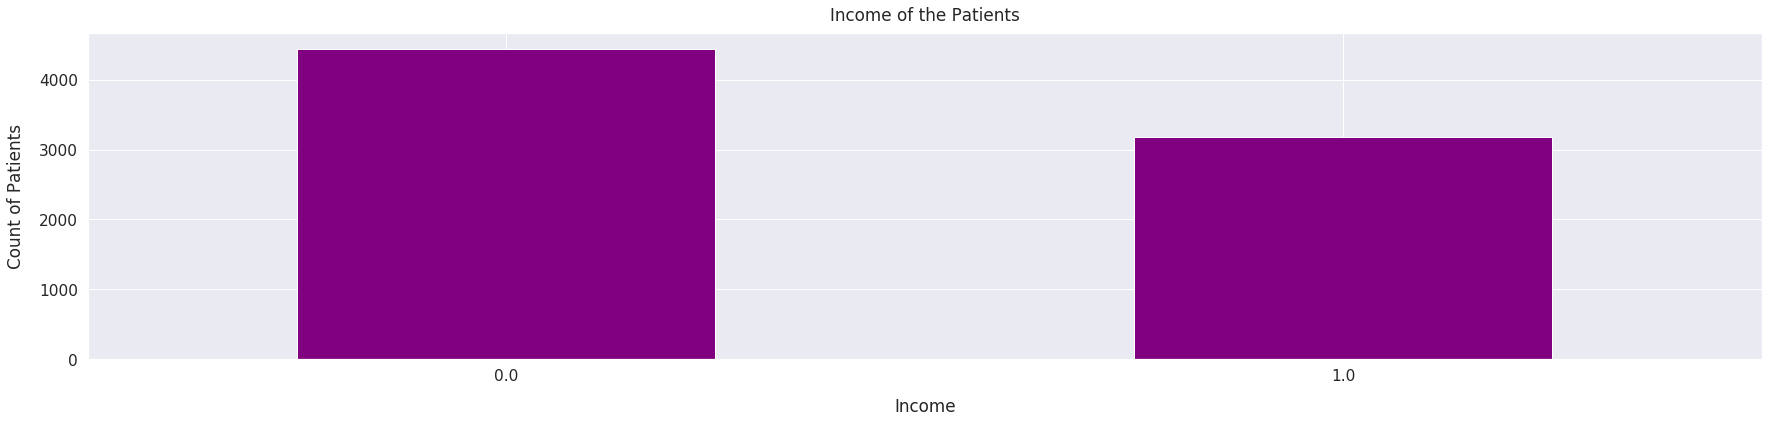

In [37]:
plot_feature_counts('Income')

Çizdiğimiz histogram, geliri olmayan hastaların çoğunlukta olduğunu gösterir.

### **Source of Care**

"Tedavinizi nerede gördünüz/görüyorsunuz" sorusuna hastaların verdiği cevaptır. Bu veri seti, hastalığın saptanmasında ortamın ne kadar etkili olduğunu anlamamız için önemli olabilecek niteliktedir. Veri setinde klinik, özel hastane, develt hastanesi veya hiç görmedim seçenekleri vardır. Bu özellik için veri setinde eksik veriler yoktur.

In [38]:
df['Source of Care'].unique()

array(['Governament Hospital', 'Never Counsulted', 'Private Hospital',
       'clinic', ' '], dtype=object)

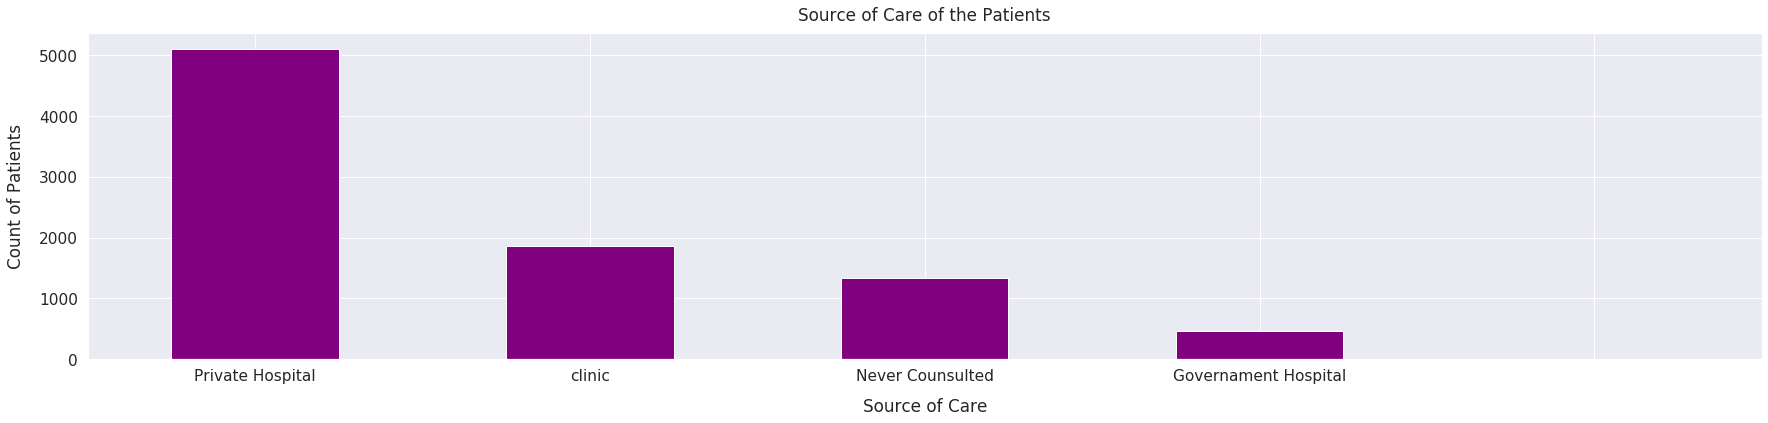

In [39]:
plot_feature_counts('Source of Care')

Yukarıdaki bar grafiğinden de anlaşılacağı gibi veri setindeki hastaların çoğunluğu özel hastanede tedavi görmüştür.

### **Poor Vision**

Hastaların görme kaybı olup olmadığını gösteren özelliktir. Görme kaybı olan hastalar 1 ile, olmayan hastalar 0 ile gösterilir. Eksik veriler 'nan' ile gösterilir. 

In [40]:
df['PoorVision'].unique()

array([ 0., nan,  1.])

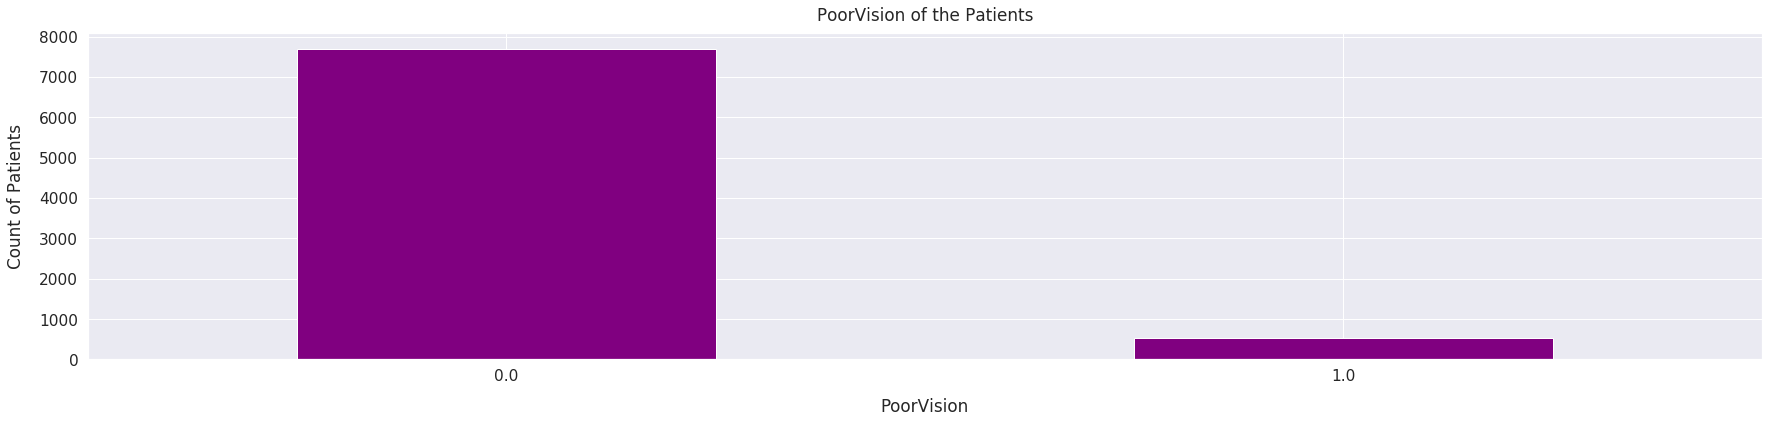

In [41]:
plot_feature_counts('PoorVision')

Görme kaybı yaşayan hastaların ciddi anlamda azınlıkta olduğu gözlemlenir.

### **Alcohol Consumption**

Alkolün karaciğeri nasıl etkilediğini hepimiz iyi biliyoruz. Hastaların alkol tüketip tüketmediğini gösteren veri setidir. Hastalar "Alkol tüketiyor musunuz?" sorusunu cevaplar. Alkol tüketen hastalar 1, tüketmeyenler 0 ile gösterilir.

In [42]:
df['Alcohol Consumption'].unique()

array([1, 0])

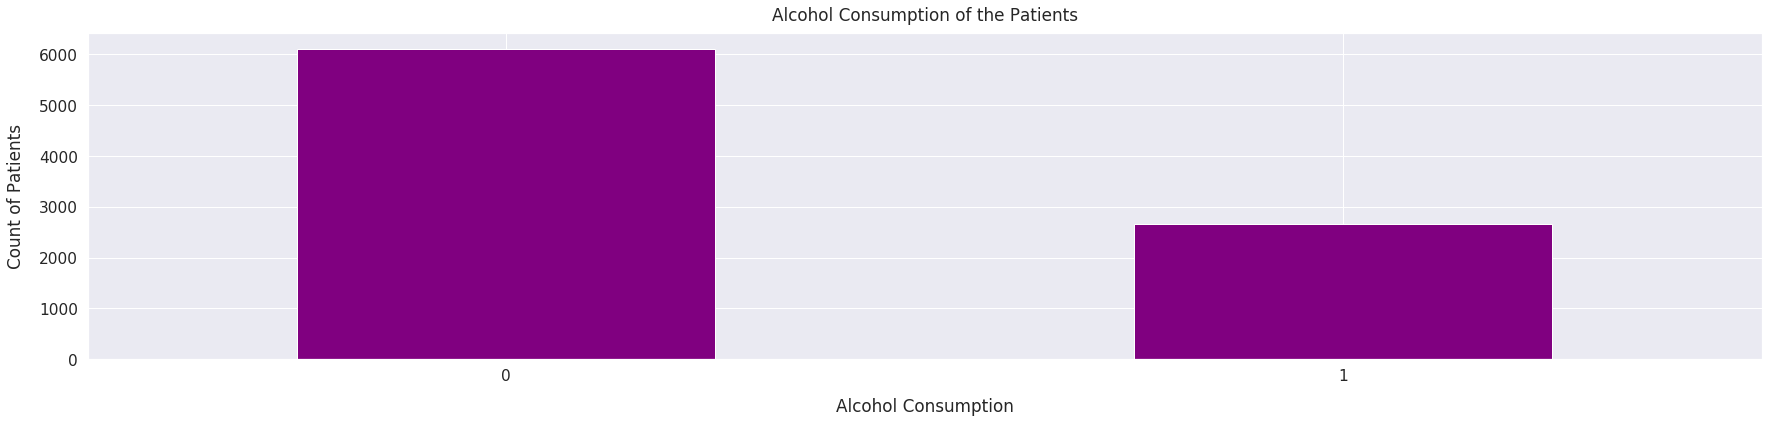

In [43]:
plot_feature_counts('Alcohol Consumption')

Alkol kullanmayan hastalar kullananların yaklaşık iki katına tekabül etmektedir.

### **HyperTension and Family  HyperTension**

Bildiğiniz üzere Hiper Tansiyon karaciğer ile doğrudan bağlantılıdır. Buradaki veri ise "Sizde veya ailenizde hiper tansiyonu olan var mı" sorusu sorularak elde edilir. 0 verisi yok, 1 verisi varı temsil eder. Eksik verilerde 'nan' kullanılmıştır.

In [44]:
print("Unique values of HyperTension: " + str(df['HyperTension'].unique()))
print("Unique values of Family HyperTension: " + str(df['Family  HyperTension'].unique()))

Unique values of HyperTension: [ 0.  1. nan]
Unique values of Family HyperTension: [0 1]


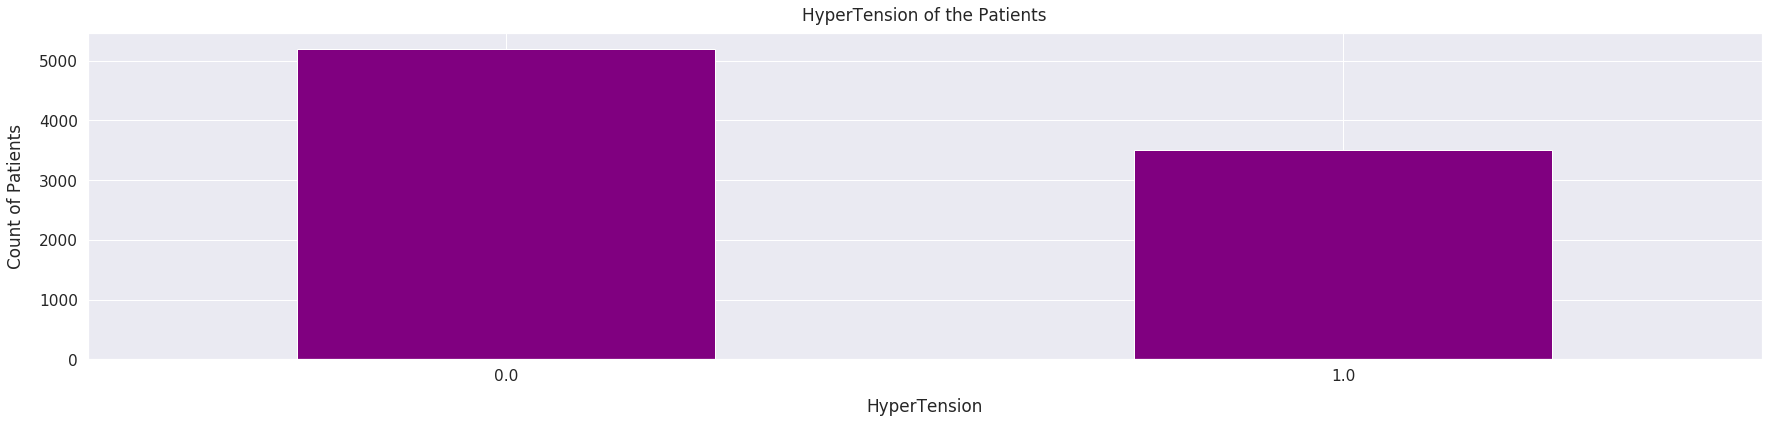

In [45]:
plot_feature_counts('HyperTension')


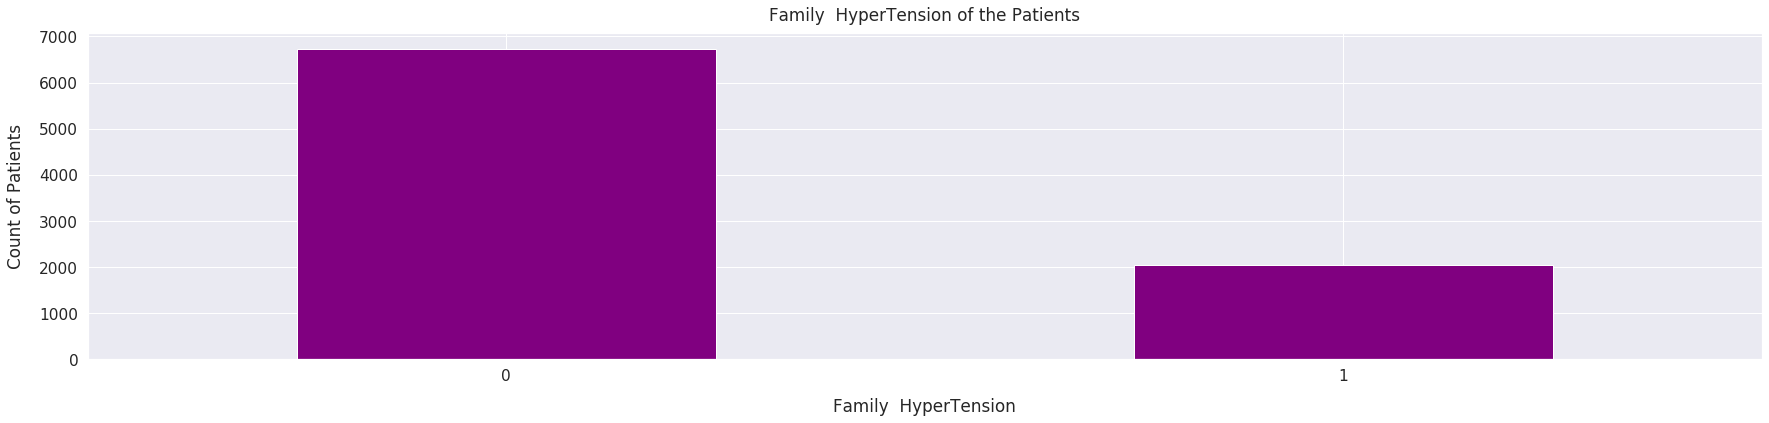

In [46]:
plot_feature_counts('Family  HyperTension')

Family HyperTension verisinde eksik veri yoktur. İki tarafta da hiper tansiyon olmayanların sayısı fazlalıktadır ancak hiper tansiyon kişinin kendisinde daha sıklıkla görülmektedir.

### **Diabetes and Family Diabetes**

Akut Karaciğer Yetmezliği tespiti için önemli verilerden biri de bu olacaktır.  Buradaki veri "Sizde veya ailenizde diyabet hastalığı olan var mı" sorusu sorularak elde edilir. 0 verisi yok, 1 verisi varı temsil eder. Eksik verilerde 'nan' kullanılmıştır.

In [47]:
print("Unique values of Diabetes: " + str(df['Diabetes'].unique()))
print("Unique values of Family Diabetes: " + str(df['Family Diabetes'].unique()))

Unique values of Diabetes: [ 0.  1. nan]
Unique values of Family Diabetes: [1 0]


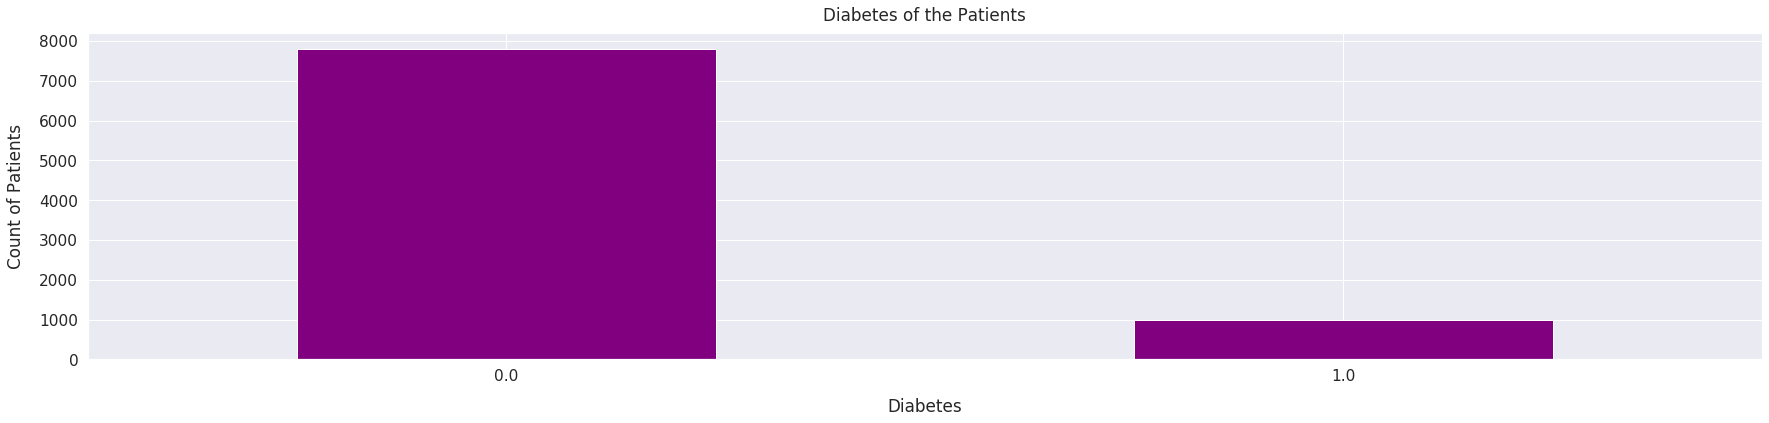

In [48]:
plot_feature_counts('Diabetes')

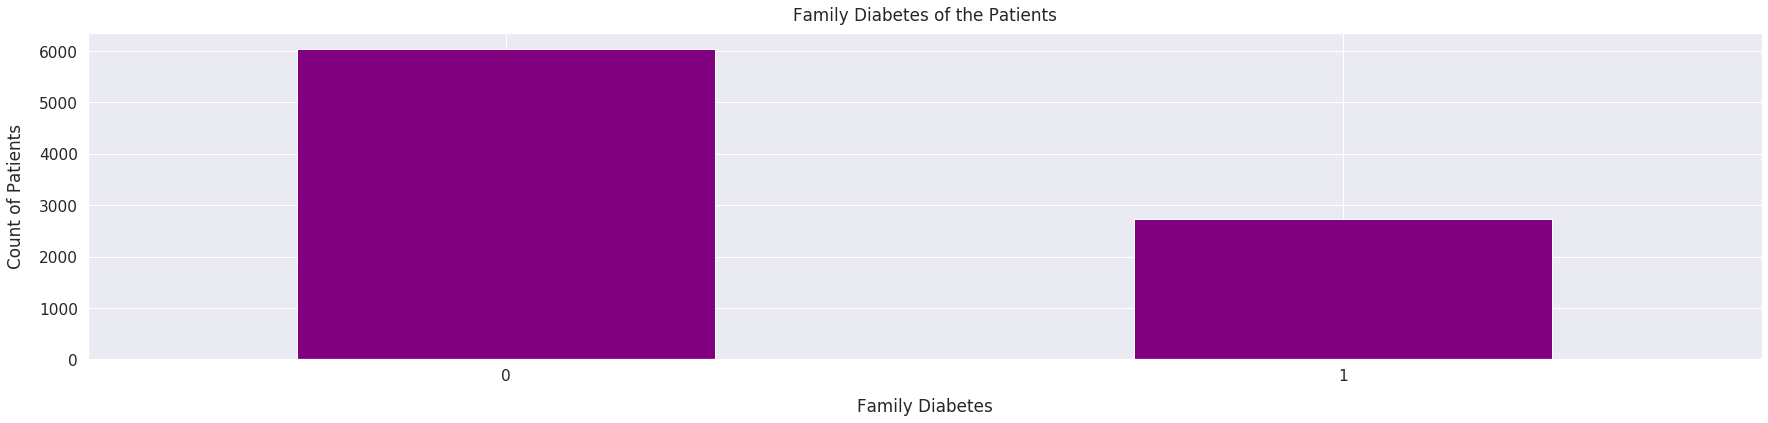

In [49]:
plot_feature_counts('Family Diabetes')

Bu veride de hiper tansiyonun tersi bir durum ortaya çıkmıştır. Aile fertlerinde daha sıklıkla görülmüştür.

### **Hepatitis and Family Hepatitis**

  Buradaki veri "Sizde veya ailenizde hepatit hastalığı olan var mı" sorusu sorularak elde edilir. 0 verisi yok, 1 verisi varı temsil eder. Eksik verilerde 'nan' kullanılmıştır.



In [50]:
print("Unique values of Hepatitis: " + str(df['Hepatitis'].unique()))
print("Unique values of Family Hepatitis: " + str(df['Family Hepatitis'].unique()))

Unique values of Hepatitis: [ 1.  0. nan]
Unique values of Family Hepatitis: [ 0.  1. nan]


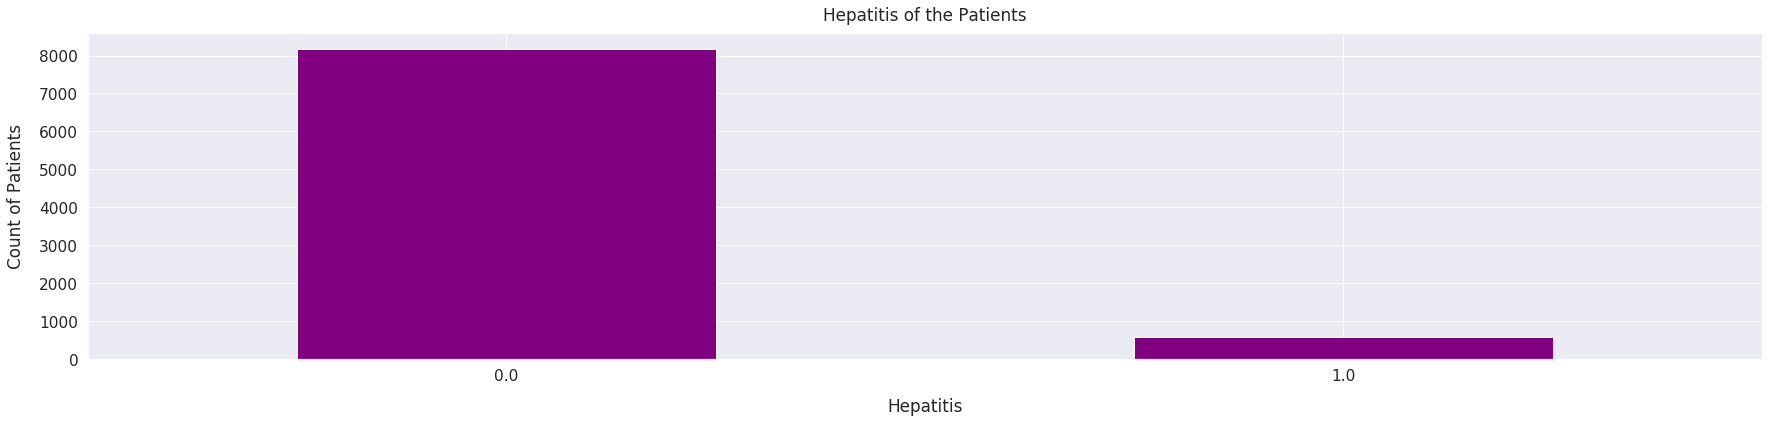

In [51]:
plot_feature_counts('Hepatitis')

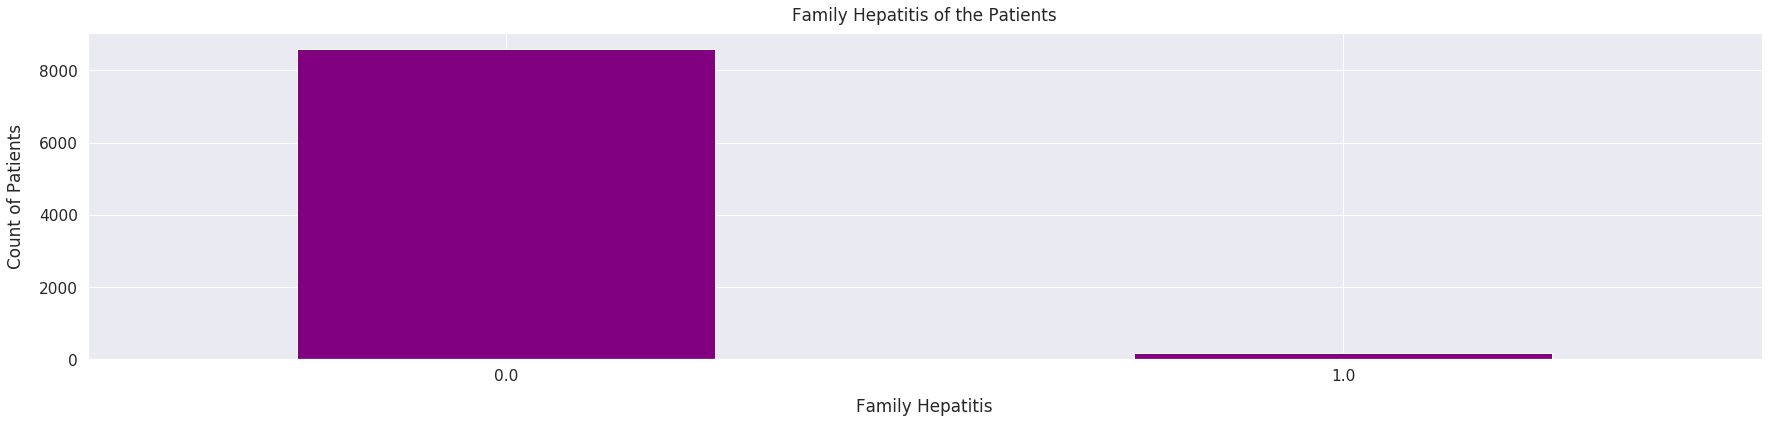

In [52]:
plot_feature_counts('Family Hepatitis')

İki tarafta da hepatit olanların çok çok düşük olduğu gözlemlenmekte. Verinin nadirliği seçim yapmada önemli bir etken olabilir.

### **Chronic Fatigue**

 Buradaki veri "Kronik yetmezliğiniz var mı" sorusu sorularak elde edilir. 0 verisi yok, 1 verisi varı temsil eder. Eksik verilerde 'nan' kullanılmıştır.

In [53]:
df['Chronic Fatigue'].unique()

array([ 0., nan,  1.])

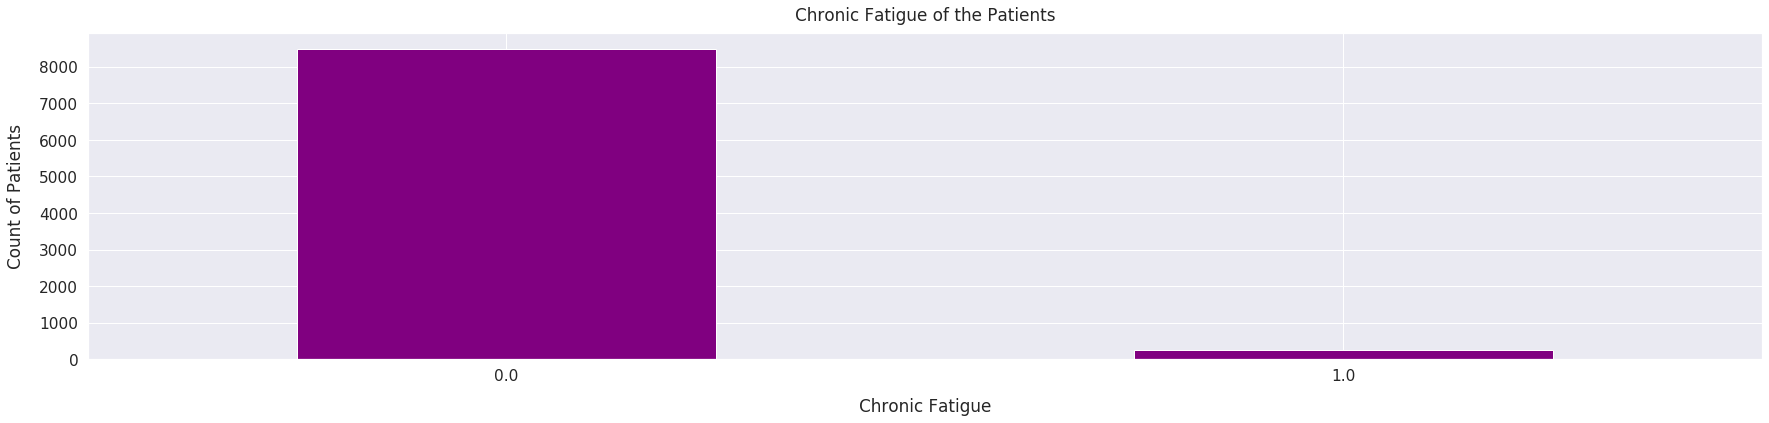

In [54]:
plot_feature_counts('Chronic Fatigue')

Kronik yetmezliği olmayanların sayısı olanlara göre ciddi miktarda baskınlıktadır.

### **ALF (Akute Liver Failure)**

  Hedef verimizdir. Bu projede ulaşmak istediğimiz veridir. Hastaların Akut Karaciğer yetmezliği yaşayıp yaşamadıkları öğrenilir. Hedef verimiz olduğundan dolayı, pie chart ile göstermemiz daha mantıklı olacaktır.

In [55]:
df['ALF'].unique()

array([ 0.,  1., nan])

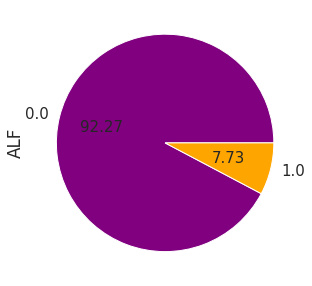

In [56]:
colors = ["purple", "orange","gray"]
df['ALF'].value_counts().plot(kind='pie',autopct='%.2f', fontsize=15, figsize=(5, 5) ,colors=colors)

Veri setinin genel dağılımı ile orantılı değildir. Hastaların yüzde 7.73 ü akut karaciğer yetmezliğine sahiptir.

# Verilerin Hazırlanması <a id="data_preparation"></a>

Veri hazırlaması, veri analizi ve tahmini için en önemli ve zor kısımlardan biridir. Bu bölümün projenin büyük kısmını oluşturduğu söylenebilir. Bu bölümde veri analizinde elde ettiğimiz bilgilerden faydalanarak verilerin yeniden biçimlendirilmesi, eksik verilerin düzenlenmesi, verilerin ayrılması, eğer gerek duyulursa özelliklerin seçilmesi ve verilerin normalleştirilmesi gibi kısımlar anlatılacaktır.

Veri hazırlamasının genel amacı, modelleme bölümünde kullanılacak veri setini uygun hale getirmektir. Veri hazırlaması yaparken, halihazırda elimizde olan (veri analizinde incelediğimiz) dataframe'i kullandık.

### Featureset Oluşturma  



Hedef özelliğimiz olan ALF'yi dataframe'den çıkarttık.

In [57]:
X = df.drop('ALF', axis=1)
X

,Age,Gender,Region,Weight,Height,Body Mass Index,Obesity,Waist,Maximum Blood Pressure,Minimum Blood Pressure,...,PoorVision,Alcohol Consumption,HyperTension,Family HyperTension,Diabetes,Family Diabetes,Hepatitis,Family Hepatitis,Chronic Fatigue,BMI_groups
0,65,M,east,56.0,162.1,21.31,0.0,83.6,135.0,71.0,...,0.0,1,0.0,0,0.0,1,1.0,0.0,0.0,18.5-24.9
1,36,M,south,60.2,162.2,22.88,0.0,76.6,96.0,52.0,...,0.0,0,0.0,0,0.0,0,0.0,0.0,0.0,18.5-24.9
2,66,M,east,83.9,162.5,31.77,1.0,113.2,115.0,57.0,...,0.0,1,0.0,0,1.0,0,0.0,0.0,0.0,30-34.9
3,54,M,east,69.4,160.5,26.94,0.0,77.9,110.0,57.0,...,0.0,1,0.0,0,0.0,0,0.0,0.0,0.0,25-29.9
4,63,M,north,73.1,159.2,28.84,0.0,89.3,132.0,73.0,...,0.0,0,1.0,0,0.0,0,0.0,0.0,0.0,25-29.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8780,35,F,east,70.0,171.5,23.80,0.0,87.5,114.0,76.0,...,0.0,1,0.0,1,0.0,1,0.0,0.0,0.0,18.5-24.9
8781,66,F,north,102.0,180.7,31.24,1.0,113.2,117.0,72.0,...,0.0,0,1.0,0,0.0,1,0.0,0.0,0.0,30-34.9
8782,37,F,south,84.4,186.0,24.40,0.0,93.6,144.0,82.0,...,0.0,0,1.0,0,0.0,0,0.0,0.0,0.0,18.5-24.9
8783,39,F,east,92.1,184.8,26.97,0.0,98.2,121.0,75.0,...,0.0,0,0.0,0,0.0,0,0.0,0.0,0.0,25-29.9


In [58]:
y= df[['ALF']]
y

,ALF
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
8780,NaN
8781,NaN
8782,NaN
8783,NaN


Burada veriyi X ve y olarak böldük. Projenin amacı bize verilmiş özellikler üzerinde modelleme yaparak ALF olup olmadığını tahmin etmeye çalışmak olduğundan dolayı verimizi X=diğer özellikler y=ALF olacak şekilde böldük.  İleride modele bu şekilde katacağız.

### Keşifsel Veri Analizi (EDA)



Veri Keşfi olarak da bilinen Keşifsel Veri Analizi (EDA) , kullanılan veri kümesini daha iyi anlamak için bir dizi tekniğin kullanıldığı bir adımdır. Bizim verimizde 30 farklı özellik olduğundan dolayı 30 farklı özellik arasındaki bağlantıları anlayabilmek için bunları görselleştireceğiz. Eğer ilişkisi az olan özellik bulunursa böylece bunu kaldırmamız overfittingi önlemek açısından mümkün olacaktır.

#### Gerekli Kütüphaneler

In [59]:
%matplotlib inline
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

In [60]:
def showPlot(fig, x=22, y=4):
    fig = plt.gcf()
    fig.set_size_inches(x, y)
    plt.show()

#### **Age**

25-29.9      3089
18.5-24.9    2583
30-34.9      1596
35-40         744
41-67         344
0-18.4        139
Name: Body Mass Index, dtype: int64


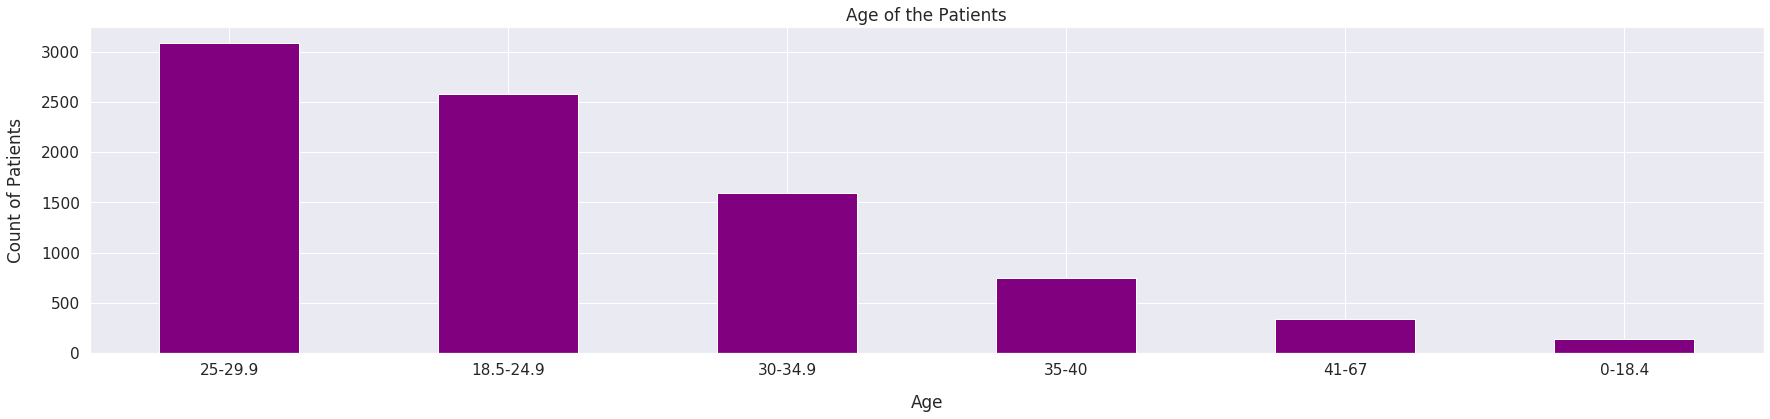

In [61]:
sns.set(font_scale=1.4)
Age_groups=pd.cut(df['Age'], [0,15, 25, 35, 45, 60,65], labels=["0-15", "15-25", "25-35", "35-45", "45-60","60+"], include_lowest=True)
print(BMI_groups.value_counts())
df['Age_groups']=Age_groups
BMI_groups.value_counts().plot(kind='bar', figsize=(30, 6), rot=0, color='purple')
plt.xlabel('Age', labelpad=16)
plt.ylabel("Count of Patients", labelpad=16)
plt.title('Age'+ " of the Patients");

Yaş dağılımı grafiği incelendiğinde, katılımcıların çoğunluğunu 25-30 yaş aralığındaki bireyler oluşturmaktadır.

#### **Body Mass Index (BMI)**




Halk arasında boy kilo indeksi olarak da bilinen vücut kitle indeksi, kilogram cinsinden vücut kitlesinin, metre cinsinden vücut uzunluğunun karesine bölünmesiyle hesaplanabilir. Günümüzde BMI, en sık kullanılan sağlık ölçülerinden birisidir. Kişinin kilolu veya zayıf olup olmadığını anlattığı için, karaciğer yetmezliği ile ilişkilendirilebilir. Vücut kitle endeksine göre:

*   18.5'un altı aşırı zayıf,
*   18.5-24.9 arası normal,
*   25-29.9 arasız kilolu,
*   30'dan fazla obez demektir.

Şimdi ise vücut kitle endeksinin elimizdeki diğer verilere göre dağılımını göreceğiz.


##### BMI-Gender İlişkisi

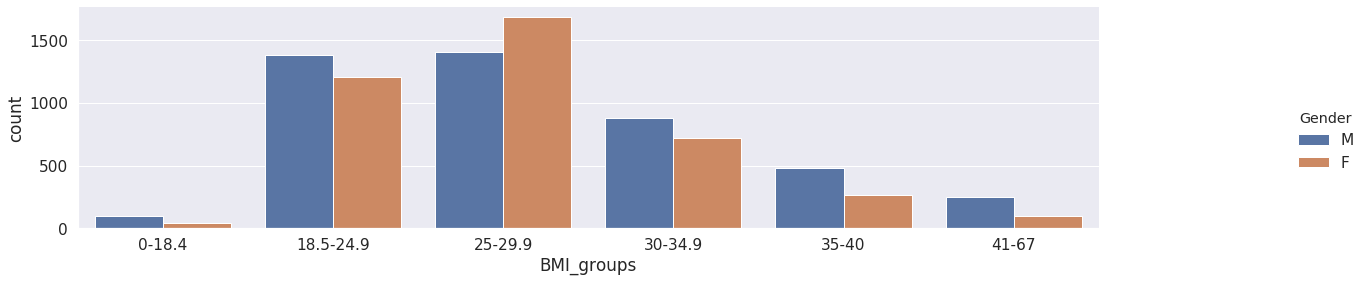

In [62]:
fig = sns.catplot(x='BMI_groups', hue='Gender', data=df, kind="count")
showPlot(fig)

Üstteki grafiğe bakılacak olursa, zayıf ve normal kilolu insanlarda erkekler çoğunlukta, kilolu insanlarda kadınlar çoğunlukta ve obeziteye sahip olanlarda ise erkekler çoğunluktadır. 

##### BMI-Region İlişkisi

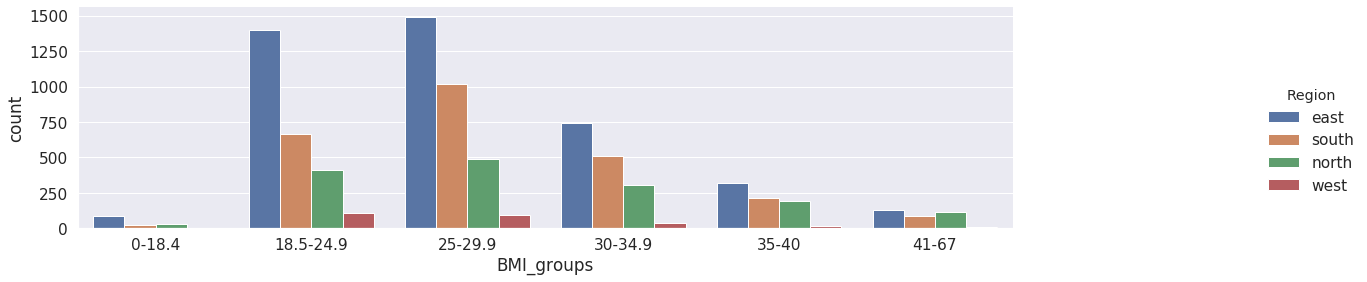

In [63]:
fig = sns.catplot(x='BMI_groups', hue='Region', data=df, kind="count")
showPlot(fig)

Üstteki grafiği incelersek, batı hariç her eyalette kilolu (25-30 BMI) insanlar diğerlerine göre sayıca üstündür. Öte yandan bunu normal kilolu insanlar takip eder. Batıda aşırı obez veya aşırı zayıf insan bulunmamaktadır.

##### BMI-Age İlişkisi

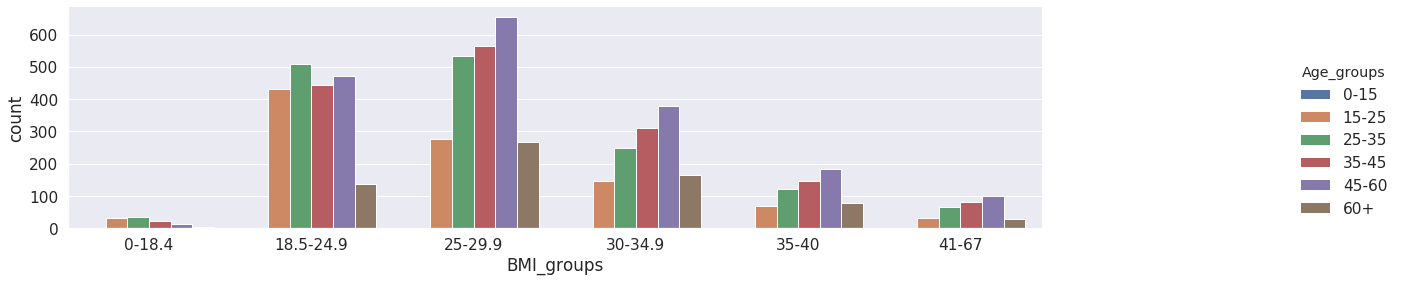

In [64]:
fig = sns.catplot(x='BMI_groups', hue='Age_groups', data=df, kind="count")
showPlot(fig)

Grafiğimize göre, kilolu ve obez insanlar en çok 45-60 yaşlarında gözlemlenmiştir. Normal kilolu ve zayıf insanlar ise 25-35 yaşları arasında yoğunluk göstermiştir. 15-25 yaşlarındaki insanlar genel olarak normal kiloludur.

##### BMI-Physical Activity İlişkisi

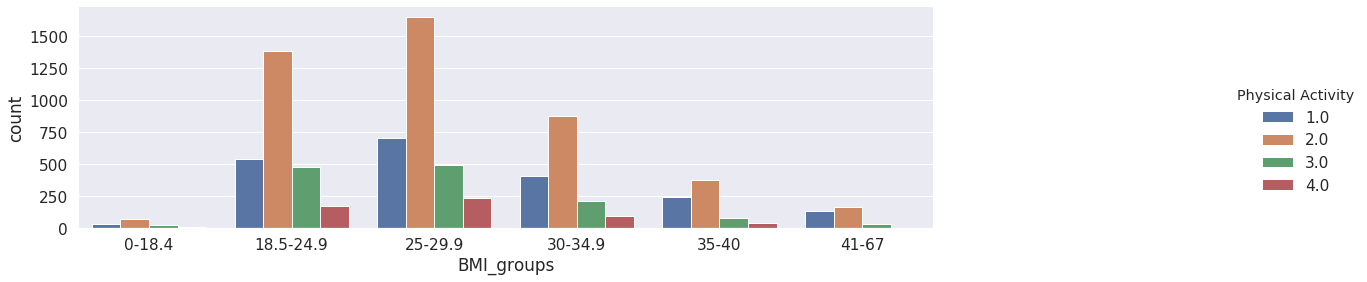

In [65]:
fig = sns.catplot(x='BMI_groups', hue='Physical Activity', data=df, kind="count")
showPlot(fig)

Grafiğe göre, BMI arttıkça aktivitede düşüş görülmüştür. En çok aktivite 25-30 BMI arasında görülmüştür. 

##### BMI-Dyslipidemia İlişkisi

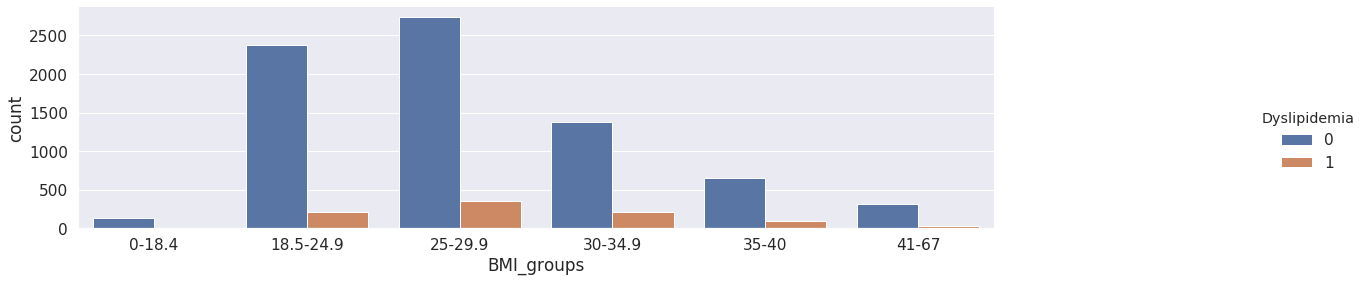

In [66]:
fig = sns.catplot(x='BMI_groups', hue='Dyslipidemia', data=df, kind="count")
showPlot(fig)

Grafiğe göre Dyslipidemia çoğu BMI grubunda benzer şekilde dağılmıştır. Zayıf olarak belirtilen bireylerde Dyslipidemia görülmemiştir. Onun dışında Dyslipidemia olmayan bireyler ağırlıktadır.

##### BMI-PVD İlişkisi

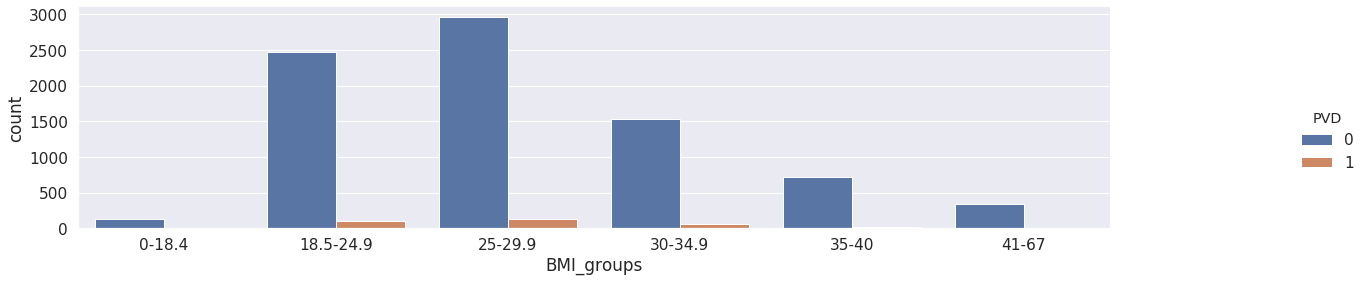

In [67]:
fig = sns.catplot(x='BMI_groups', hue='PVD', data=df, kind="count")
showPlot(fig)

Damar tıkanıklığı çoğu BMI grubunda damar tıkanıklığı olmayanlar baskın olacak şekilde benzer dağılmıştır. Damak tıkanıklığı sadece 18.5-34.9 aralığında vardır.

##### BMI-Obesity İlişiikisi

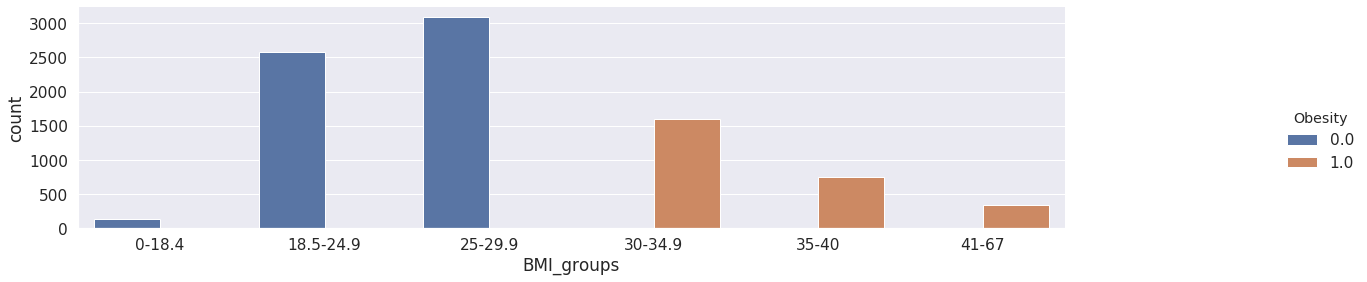

In [68]:
fig = sns.catplot(x='BMI_groups', hue='Obesity', data=df, kind="count")
showPlot(fig)

Bir insanın obeziteye sahip olup olmadığı BMI değerlerine göre belirlendiği için, 30 ve üstü obezite sayılır.

##### BMI-Education İlişkisi

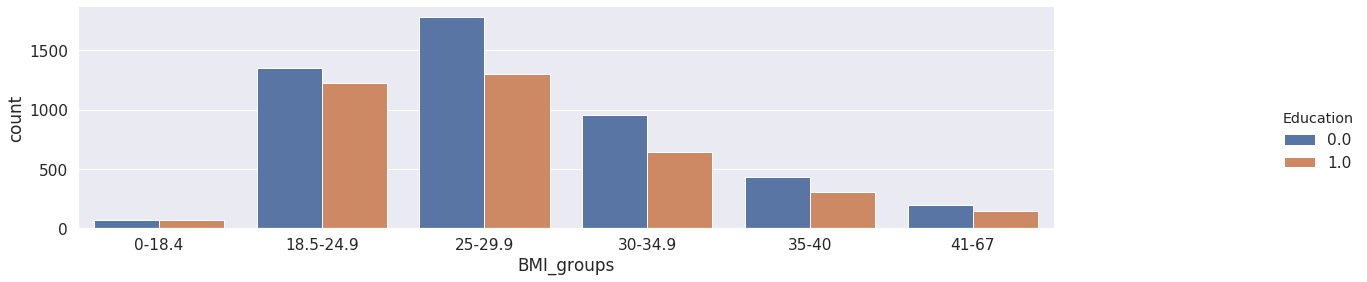

In [69]:
fig = sns.catplot(x='BMI_groups', hue='Education', data=df, kind="count")
showPlot(fig)

0-18.4 hariç Her BMI grubunda eğitim görmeyenler görenlere göre üstünlük göstermiştir. Ancak bu üstünlük en fazla 25-29.9 arasındadır.

##### BMI-Unmarried İlişkisi

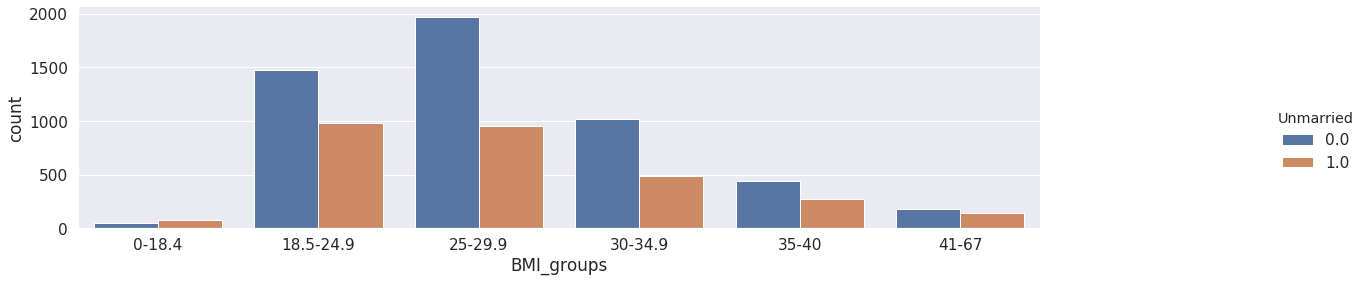

In [70]:
fig = sns.catplot(x='BMI_groups', hue='Unmarried', data=df, kind="count")
showPlot(fig)

Zayıf grup hariç her grupta evlilerin sayısı bekarlığa baskındır. Zayıfların daha az evlendiği, 25-30 BMI grubu arasındaki kilolu denebilecek kişilerin daha sıklıkla evlendiği tespit edilmiştir.

##### BMI-Income İlişkisi

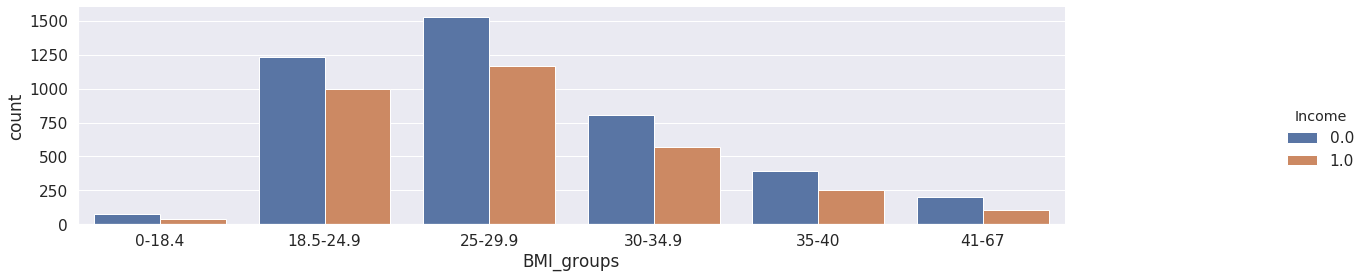

In [71]:
fig = sns.catplot(x='BMI_groups', hue='Income', data=df, kind="count")
showPlot(fig)

Her BMI grubunda geliri olmayanlar geliri olanlara göre sayıca fazladır. 

##### BMI-Source Of Care İlişkisi

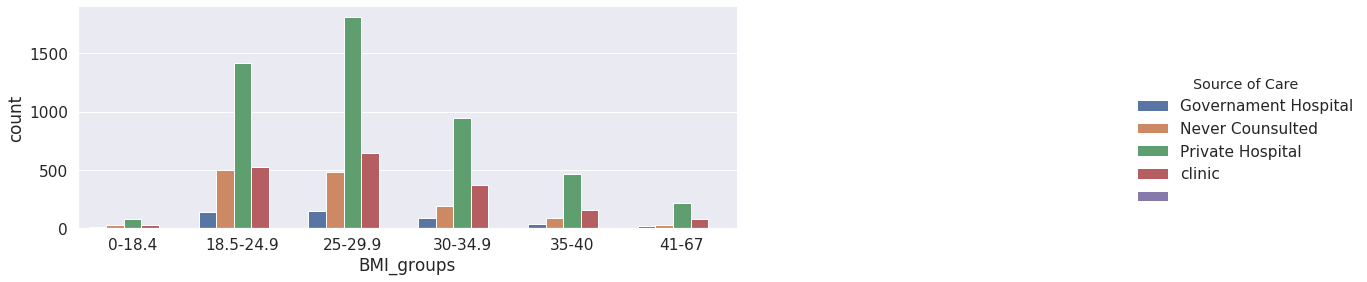

In [72]:
fig = sns.catplot(x='BMI_groups', hue='Source of Care', data=df, kind="count")
showPlot(fig)

Bütün BMI gruplarında Özel Hastaneye başvuranların sayısı diğerlerine göre fazladır. Bunları klinik ve hiç tedavi görmemişler takip eder. Ancak normal kilolu bireylerde hiç tedavi görmeyenler ile kliniğe gidenlerin sayıları çok yakındır. Bu bize normal kilolularda tedavi görülmeme olasılığının arttığını belirtir.

##### BMI-PoorVision İlişkisi

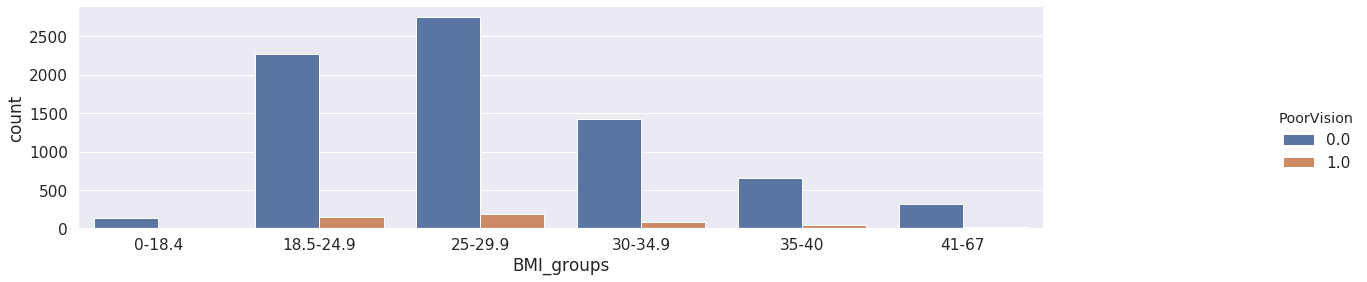

In [73]:
fig = sns.catplot(x='BMI_groups', hue='PoorVision', data=df, kind="count")
showPlot(fig)

Bütün BMI gruplarında görme kaybı yaşamayanların baskınlığı vardır. Aşırı zayıf grupta ise görme kaybı gözlemlenmemiştir.

##### BMI-Alcohol Consumption İlişkisi

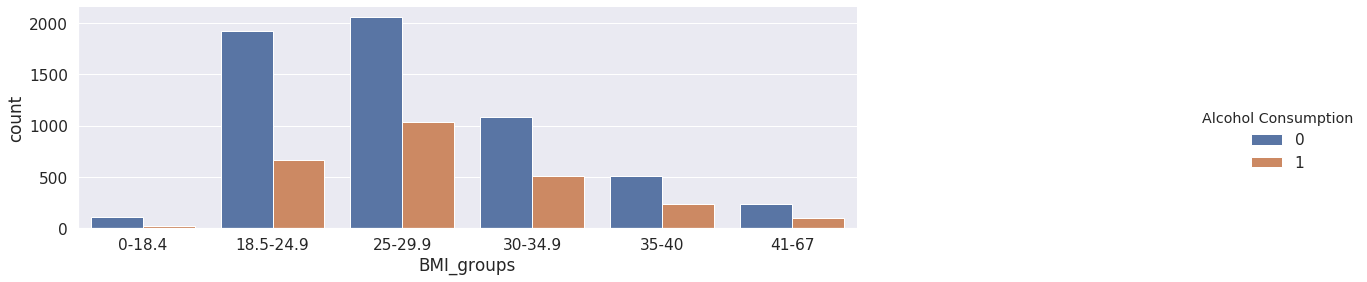

In [74]:
fig = sns.catplot(x='BMI_groups', hue='Alcohol Consumption', data=df, kind="count")
showPlot(fig)

Alkol tüketiminin dağılımı 25-30 BMI grubunda daha baskındır. 

#### **Akute Liver Failure**

Akut karaciğer yetmezliği, öncelikli olarak sağlıklı insanlarda ve aniden görülen bir hastalıktır. Akut ve kronik karaciğer iflaslarının ikisi de; proteinleri sağlayan ve toksinlerin dolaşımını sağlayan karaciğer hücrelerine zarar verir. Veri setimizde 1 veya 0 halinde bulunur.  

Akut karaciğer yetmezliğinin elimizdeki diğer verilere göre dağılımını incelersek:

##### ALF-Gender İlişkisi

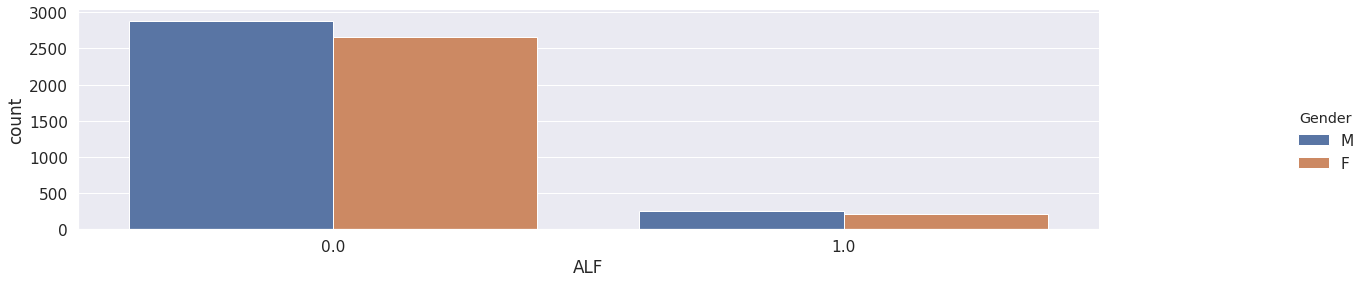

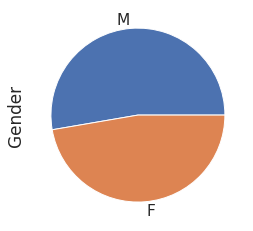

In [75]:
fig = sns.catplot(x='ALF', hue='Gender', kind="count", data=df)
showPlot(fig)

df['Gender'].value_counts().plot(kind='pie')

Erkek bireylerde ALF nin görülme sıklığı daha fazladır.

##### ALF-Obesity İlişkisi

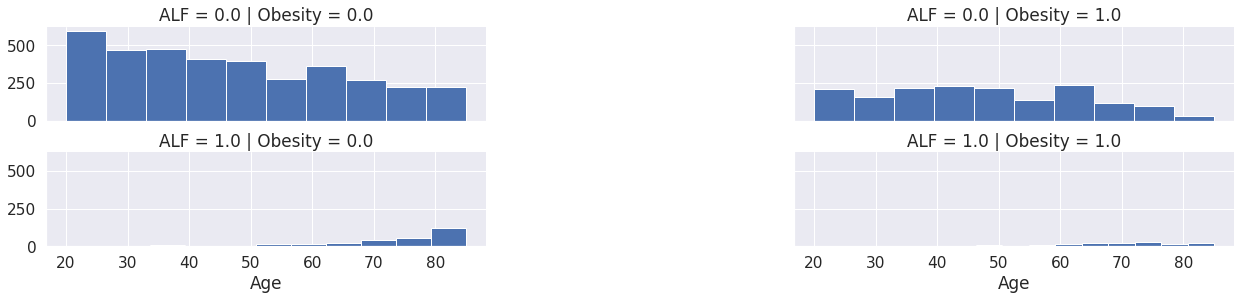

In [76]:
fig = sns.FacetGrid(df, col='Obesity',  row="ALF")
fig = fig.map(plt.hist, "Age")
showPlot(fig)

Üstteki grafikten 


*   ALF gözlenmediği durumlarda, obeziteye sahip olmayanların sayısı olanlardan fazladır 
*   ALF gözlendiği durumlarda, obeziteye sahip olmayanların sayısı olanlardan fazladır 
*   Obeziteye sahip insanlarda, ALF 60 yaşından sonra görülmeye başlanmıştır
*   Obeziteye sahip olmayan insanlarda, ALF görülmesi 60 yaşından sonra azalmıştır;
 
 çıkarımları yapılabilir.
 

##### ALF-Alcohol Consumption İlişkisi

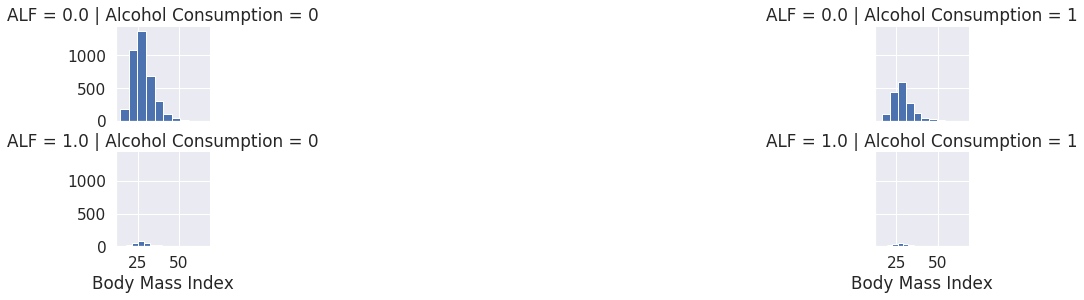

In [77]:
fig = sns.FacetGrid(df, col='Alcohol Consumption',  row="ALF")
fig = fig.map(plt.hist, "Body Mass Index")
showPlot(fig)

Yukarıdaki grafikten:
* 25 BMI çevresinde alkol kullanıp ALF'ye yakalanmayan hasta sayısı yoğunlaşmıştır. Ancak alkol kullanıp ALF'ye yakalana hastalar da yakalanmayana göre az olsa da bu aralıkta çoğalmıştır.
* 25 BMI çevresinde alkol kullanmayıp ALF'ye yakalanmayan hasta sayısı yoğunlaşmıştır. Ancak alkol kullanmayıp ALF'ye yakalana hastalar da yakalanmayana göre az olsa da bu aralıkta çoğalmıştır.

Üstteki iki çıkarım da birbirine benzer olduğundan çok da farklılık olmadığı söylenebilr.

##### ALF-Region İlişkisi

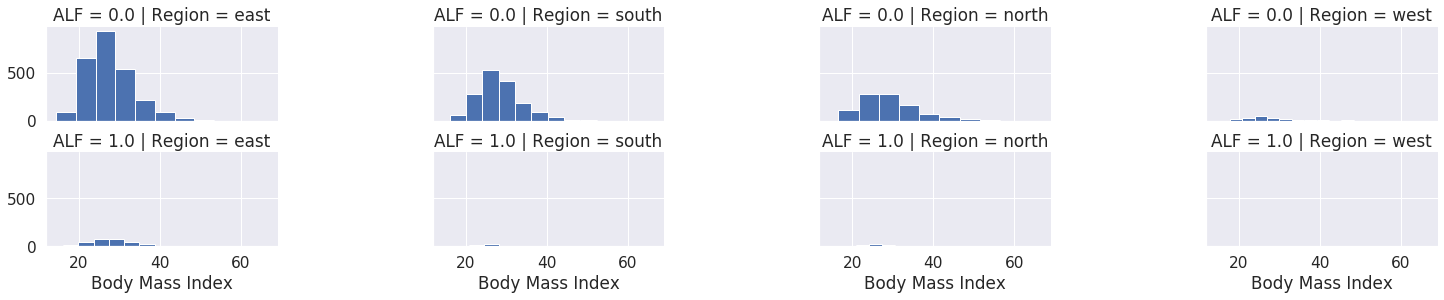

In [78]:
fig = sns.FacetGrid(df, col='Region',  row="ALF")
fig = fig.map(plt.hist, "Body Mass Index")
showPlot(fig)

Grafiklerden katılımcı sayısı en fazla doğu, sonra güney, sonra kuzey ve en son da batı olarak adlandırılabilir. Katılımcı sayısı farklı olsa da, ALF hastalığına yakalanan hastalar bütün bölgelered 25 BMI çevresinde ve benzer oranda dağılım göstermektedir çıkarımını yapabiliriz.

##### ALF-PoorVision İlişkisi

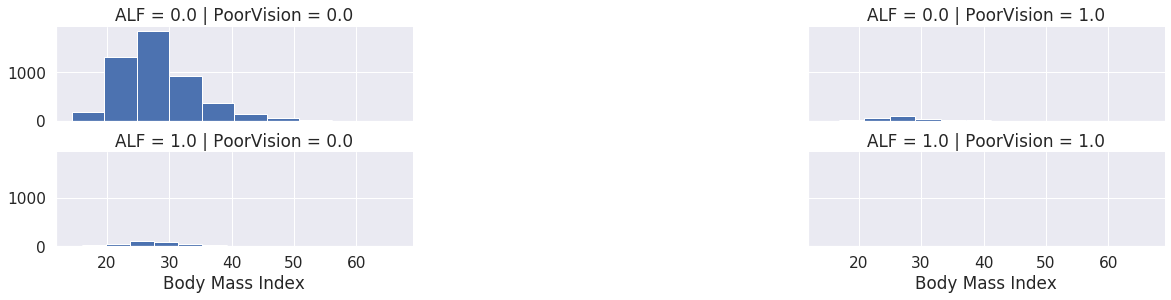

In [79]:
fig = sns.FacetGrid(df, col='PoorVision',  row="ALF")
fig = fig.map(plt.hist, "Body Mass Index")
showPlot(fig)

ALF si olan hastalarda, görme kaybı olmayan hastalar görme kaybı olan hastalara göre daha fazladır. ALF bulunmayan hastalarda da durum aynıdır.

### Korelasyon



Korelasyon, iki değişken arasındaki doğrusal ilişkinin yönünü ve gücünü belirtir. Genel istatistiksel kullanımda korelasyon, bağımsızlık durumundan ne kadar uzaklaşıldığını gösterir. Pythonda korelasyonu sağlama kiçin corr() methoduunu kullanırız. Verilerimiz zaten sayısal değer olduğundan bir sıkıntı çıkmadı.Bu prjoede korelasyonu alakasız verileri elemek için kullanacağız. Korelasyonu daha iyi anlamak için ise ısı haritasını kullanacağız.

In [80]:
corralation = df.corr().round(2)
corralation

,Age,Weight,Height,Body Mass Index,Obesity,Waist,Maximum Blood Pressure,Minimum Blood Pressure,Good Cholesterol,Bad Cholesterol,...,PoorVision,Alcohol Consumption,HyperTension,Family HyperTension,Diabetes,Family Diabetes,Hepatitis,Family Hepatitis,Chronic Fatigue,ALF
Age,1.00,-0.05,-0.12,0.02,0.00,0.18,0.55,0.02,0.03,0.15,...,0.17,0.20,0.49,-0.12,0.24,0.09,0.27,-0.02,0.18,0.37
Weight,-0.05,1.00,0.46,0.86,0.66,0.87,0.06,0.19,-0.31,0.12,...,-0.03,0.09,0.13,0.08,0.12,0.10,0.02,-0.03,0.03,-0.02
Height,-0.12,0.46,1.00,-0.04,-0.06,0.20,-0.08,0.16,-0.20,-0.02,...,-0.03,0.10,-0.07,-0.00,-0.04,-0.04,-0.01,-0.07,-0.03,-0.05
Body Mass Index,0.02,0.86,-0.04,1.00,0.78,0.87,0.12,0.12,-0.24,0.14,...,-0.01,0.05,0.18,0.10,0.16,0.13,0.03,0.01,0.04,0.00
Obesity,0.00,0.66,-0.06,0.78,1.00,0.68,0.08,0.10,-0.18,0.11,...,-0.01,0.02,0.16,0.06,0.12,0.11,0.03,0.01,0.03,0.01
Waist,0.18,0.87,0.20,0.87,0.68,1.00,0.19,0.13,-0.31,0.22,...,0.02,0.13,0.25,0.05,0.22,0.13,0.08,-0.00,0.07,0.06
Maximum Blood Pressure,0.55,0.06,-0.08,0.12,0.08,0.19,1.00,0.34,0.00,0.14,...,0.10,0.07,0.63,0.00,0.18,0.08,0.14,-0.01,0.06,0.22
Minimum Blood Pressure,0.02,0.19,0.16,0.12,0.10,0.13,0.34,1.00,-0.08,0.12,...,-0.04,0.00,0.23,0.08,-0.05,0.05,-0.04,-0.07,-0.05,-0.09
Good Cholesterol,0.03,-0.31,-0.20,-0.24,-0.18,-0.31,0.00,-0.08,1.00,-0.20,...,-0.01,-0.02,-0.01,-0.01,-0.12,-0.06,-0.07,0.02,-0.05,-0.03
Bad Cholesterol,0.15,0.12,-0.02,0.14,0.11,0.22,0.14,0.12,-0.20,1.00,...,-0.00,0.04,0.10,0.01,0.05,0.04,0.00,-0.06,-0.01,0.03


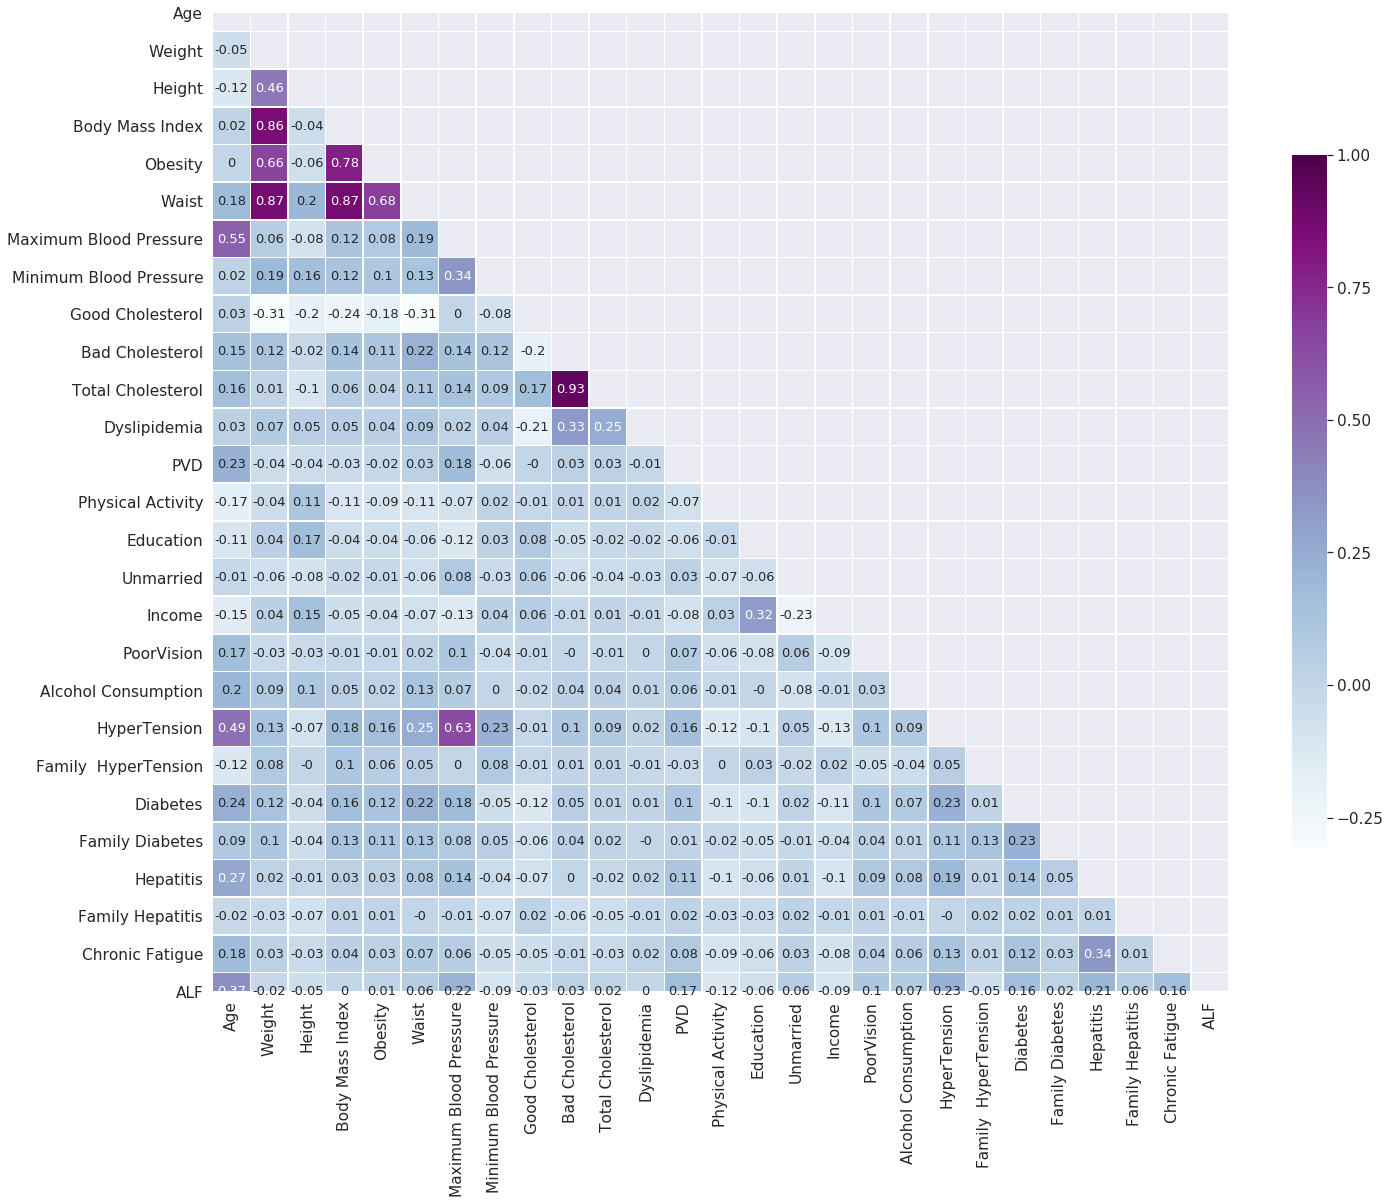

In [81]:

mask = np.zeros_like(corralation, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


f, ax = plt.subplots(figsize=(21, 21))


# Draw the heatmap
sns.heatmap(corralation, mask=mask,cmap= "BuPu",
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True,annot_kws={'size':13})

plt.tight_layout()

Isı haritasını incelediğimizde, aralarında yüksek korelasyon olan bölgeler, Height-Waist, Height-Obesity, Obesity-BMI, Obesity-Waist, Weight-BMI, Weight-Obesity, Weight-Waist, BMI-Waist, Total Kolestrol-Kötü Kolestrol, Hiper Tansiyon- Kan basıncı olduığunu görüyoruz. Bu verilerden yola çıkarak 
, Weight, Height, Heist ve Obesity verilerinde yüksek korelasyon olduğunu gözlemlediğimizden dolayı bu verileri çıkartmamız gerekmektedir. Bu veriler çıktıktan sonra BMI durabilir. 

Öte yandan daha kolay anlaşılacağı için iyi ve kötü kolestrol yerine sadece total kolestrol tutmaya karar verdik.



**Yüksek Korelasyonlu Bazı Özelliklerin Çıkarılması**

In [82]:
df.drop(['Weight','Height' , 'Waist'],axis=1, inplace=True)
df.drop(['Good Cholesterol','Bad Cholesterol'] ,axis=1, inplace=True)



In [83]:
df.drop(['BMI_groups','Age_groups'] ,axis=1, inplace=True)
df.head()

,Age,Gender,Region,Body Mass Index,Obesity,Maximum Blood Pressure,Minimum Blood Pressure,Total Cholesterol,Dyslipidemia,PVD,...,PoorVision,Alcohol Consumption,HyperTension,Family HyperTension,Diabetes,Family Diabetes,Hepatitis,Family Hepatitis,Chronic Fatigue,ALF
0,65,M,east,21.31,0.0,135.0,71.0,297.0,0,0,...,0.0,1,0.0,0,0.0,1,1.0,0.0,0.0,0.0
1,36,M,south,22.88,0.0,96.0,52.0,166.0,0,0,...,0.0,0,0.0,0,0.0,0,0.0,0.0,0.0,0.0
2,66,M,east,31.77,1.0,115.0,57.0,255.0,1,0,...,0.0,1,0.0,0,1.0,0,0.0,0.0,0.0,0.0
3,54,M,east,26.94,0.0,110.0,57.0,230.0,0,0,...,0.0,1,0.0,0,0.0,0,0.0,0.0,0.0,0.0
4,63,M,north,28.84,0.0,132.0,73.0,221.0,0,0,...,0.0,0,1.0,0,0.0,0,0.0,0.0,0.0,0.0


###Verideki boş yerleri doldurma


In [84]:
def fillNumericalNANs(column_name):
    df[column_name].fillna(df[column_name].mean(), inplace=True)
    
def fillCategoricalNANs(column_name):
    most_common_value= df[column_name].value_counts().idxmax()
    df[column_name].fillna(most_common_value, inplace=True)

In [85]:
df.dropna(subset=['ALF'],inplace=True)
df.shape

(6000, 25)

Burada ALF değerimiz hedef değer olduğu için orada bulunan boş değerler direkt kaldırıldı.

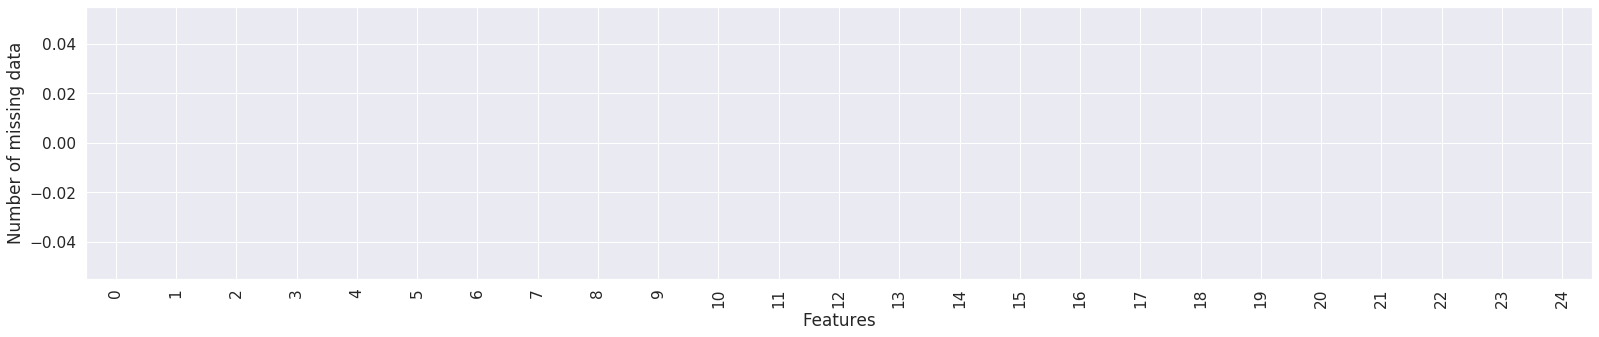

,Total missing,Percentage
ALF,0,0.0
Education,0,0.0
Gender,0,0.0
Region,0,0.0
Body Mass Index,0,0.0
Obesity,0,0.0
Maximum Blood Pressure,0,0.0
Minimum Blood Pressure,0,0.0
Total Cholesterol,0,0.0
Dyslipidemia,0,0.0


In [86]:
numerical_values = ["Maximum Blood Pressure", "Minimum Blood Pressure","Body Mass Index","Total Cholesterol"]
categorical_values =["Income","PoorVision","Unmarried","HyperTension","Chronic Fatigue","Hepatitis",
                    "Education","Physical Activity","Diabetes","Family Hepatitis","Obesity"]

for column in numerical_values:
    fillNumericalNANs(column)
for column in categorical_values:
    fillCategoricalNANs(column)
    
missing_data=printMissingData(df) 
missing_data

Sonuç olarak, boş verilerden kurtulmuş olduk.

### Veri Tipinin Dönüştürülmesi

Veriyi analiz ederken, bir sütunun veri türünün int veya float olmasını beklenir, ancak bunun yerine türü nesne ise, veride hata elde ederiz. Biz de nesne bulunan satırlara numerik değerler atayarak bunları önledik. Veri Setini gereksiz yere büyütmek yerine array'ler kullanarak da bu durumun üstesinden geldik.

Aşağıdaki yöntemle veri kümemizde eksik değerler yerine, o sütunun veri türüne göre en uygun değeri yerleştiririz.

In [87]:
df.loc[df['Source of Care'].str.contains('Governament Hospital' , regex=True, na=False), 'Source of Care'] = 0
df.loc[df['Source of Care'].str.contains('Never Counsulted' , regex=True, na=False), 'Source of Care'] = 1
df.loc[df['Source of Care'].str.contains('Private Hospital' , regex=True, na=False), 'Source of Care'] = 2
df.loc[df['Source of Care'].str.contains('clinic' , regex=True, na=False), 'Source of Care'] = 3

df['Source of Care'].unique()

array([0, 1, 2, 3, ' '], dtype=object)

In [88]:
df.loc[df['Source of Care'].str.contains(' ' , regex=True, na=False), 'Source of Care'] = 2
df['Source of Care'].unique()

array([0, 1, 2, 3])

In [89]:
df.loc[df['Gender'].str.contains('M' , regex=True, na=False), 'Gender'] = 0
df.loc[df['Gender'].str.contains('F' , regex=True, na=False), 'Gender'] = 1

df['Gender'].unique()

array([0, 1])

In [90]:
df.loc[df['Region'].str.contains('east' , regex=True, na=False), 'Region'] = 0
df.loc[df['Region'].str.contains('south' , regex=True, na=False), 'Region'] = 1
df.loc[df['Region'].str.contains('north' , regex=True, na=False), 'Region'] = 2
df.loc[df['Region'].str.contains('west' , regex=True, na=False), 'Region'] = 3
df['Region'].unique()

array([0, 1, 2, 3])

### Temizlenmiş Verinin İncelenmesi

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6000 entries, 0 to 5999
Data columns (total 25 columns):
Age                       6000 non-null int64
Gender                    6000 non-null int64
Region                    6000 non-null int64
Body Mass Index           6000 non-null float64
Obesity                   6000 non-null float64
Maximum Blood Pressure    6000 non-null float64
Minimum Blood Pressure    6000 non-null float64
Total Cholesterol         6000 non-null float64
Dyslipidemia              6000 non-null int64
PVD                       6000 non-null int64
Physical Activity         6000 non-null float64
Education                 6000 non-null float64
Unmarried                 6000 non-null float64
Income                    6000 non-null float64
Source of Care            6000 non-null int64
PoorVision                6000 non-null float64
Alcohol Consumption       6000 non-null int64
HyperTension              6000 non-null float64
Family  HyperTension      6000 non-null int

Görüldüğü üzere bütün verilerimiz int veya float şeklindedir.

#### Hedef Özelliğin Belirlenmesi

In [92]:
X = df.drop('ALF', axis=1)
y = df.iloc[:,-1]
X

,Age,Gender,Region,Body Mass Index,Obesity,Maximum Blood Pressure,Minimum Blood Pressure,Total Cholesterol,Dyslipidemia,PVD,...,Source of Care,PoorVision,Alcohol Consumption,HyperTension,Family HyperTension,Diabetes,Family Diabetes,Hepatitis,Family Hepatitis,Chronic Fatigue
0,65,0,0,21.31,0.0,135.0,71.0,297.0,0,0,...,0,0.0,1,0.0,0,0.0,1,1.0,0.0,0.0
1,36,0,1,22.88,0.0,96.0,52.0,166.0,0,0,...,1,0.0,0,0.0,0,0.0,0,0.0,0.0,0.0
2,66,0,0,31.77,1.0,115.0,57.0,255.0,1,0,...,1,0.0,1,0.0,0,1.0,0,0.0,0.0,0.0
3,54,0,0,26.94,0.0,110.0,57.0,230.0,0,0,...,2,0.0,1,0.0,0,0.0,0,0.0,0.0,0.0
4,63,0,2,28.84,0.0,132.0,73.0,221.0,0,0,...,3,0.0,0,1.0,0,0.0,0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,77,1,0,31.66,1.0,149.0,77.0,222.0,0,0,...,2,0.0,1,1.0,0,0.0,0,0.0,0.0,0.0
5996,49,1,0,30.36,1.0,130.0,75.0,161.0,0,0,...,2,0.0,0,1.0,1,0.0,0,0.0,0.0,0.0
5997,30,1,2,25.50,0.0,126.0,83.0,171.0,0,0,...,3,0.0,0,0.0,1,0.0,1,0.0,0.0,0.0
5998,75,1,2,25.30,0.0,129.0,50.0,192.0,0,0,...,2,0.0,1,1.0,0,1.0,1,0.0,0.0,0.0


### Normalizasyon ve Train - Test Verisetinin Ayrılması

Normalizasyonun iki temel amacı vardır. Veri tabanında veri tekrarlarını ortadan kaldırmak ve veri tutarlılığını artırmak.

Başarılı bir şekilde uygulandığında normalizasyon işlemi veri tabanının işlenme hızını büyük oranda artırır. Veri tabanının sabit diskteki boyutunu azaltır. Ayrıca veri tutarlılığını artırarak veri tekrarlarını engeller. Güncelleme ve silme işlemlerinde ortaya çıkabilecek aksaklıkları minimize eder.

In [93]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
from pandas import DataFrame


numeric_features=X.loc[:,["Age","Maximum Blood Pressure", "Minimum Blood Pressure","Body Mass Index","Total Cholesterol"]]
numeric_features

scaler = StandardScaler()
# transform data
scaled = scaler.fit_transform(numeric_features)
res =DataFrame(scaled)
    



Üst kısımda normalizasyon için numeric olan özelliklerimize standard oranlama uyguladık.

**Train - Test Verisetinin Ayrılması**

Veri kümesini 70:30'a denk gelecek şekilde böldük, yani verilerin %70'i eğitimde ve verilerin %30'unu eğitim kısmıyla oluşturduğumuz modeli test etmek için kullanmak üzere ayırdık. Veri setimiz şimdi modelimizi oluşturmak için daha uygun oldu.

In [94]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.30, random_state=1,)

In [95]:
normalized_X_train = X_train 

normalized_X_train.drop(["Age","Maximum Blood Pressure", "Minimum Blood Pressure","Body Mass Index","Total Cholesterol"],axis=1, inplace=True)
normalized_X_train['Age'] = res[0]
normalized_X_train['Maximum Blood Pressure'] = res[1]
normalized_X_train['Minimum Blood Pressure'] = res[2]
normalized_X_train['Body Mass Index'] = res[3]
normalized_X_train['Total Cholesterol'] = res[4]

normalized_X_test = X_test

normalized_X_test.drop(["Age","Maximum Blood Pressure", "Minimum Blood Pressure","Body Mass Index","Total Cholesterol"],axis=1, inplace=True)
normalized_X_test['Age'] = res[0]
normalized_X_test['Maximum Blood Pressure'] = res[1]
normalized_X_test['Minimum Blood Pressure'] = res[2]
normalized_X_test['Body Mass Index'] = res[3]
normalized_X_test['Total Cholesterol'] = res[4]

normalized_X_train
    
    

/home/dilara/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/home/dilara/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/home/dilara/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pa

,Gender,Region,Obesity,Dyslipidemia,PVD,Physical Activity,Education,Unmarried,Income,Source of Care,...,Diabetes,Family Diabetes,Hepatitis,Family Hepatitis,Chronic Fatigue,Age,Maximum Blood Pressure,Minimum Blood Pressure,Body Mass Index,Total Cholesterol
2139,1,0,0.0,1,0,1.0,0.0,0.0,0.0,2,...,0.0,0,1.0,0.0,1.0,1.798568,-0.269356,0.283069,-1.747860e-15,-2.037426
1785,0,1,0.0,0,0,2.0,0.0,1.0,1.0,3,...,1.0,0,0.0,0.0,0.0,1.054546,-0.607358,-1.440359,-3.582108e-01,0.045237
3601,1,2,1.0,0,0,4.0,1.0,0.0,1.0,1,...,0.0,0,0.0,0.0,0.0,-1.230666,-0.076213,0.201001,9.110945e-01,-0.215096
2019,1,0,1.0,1,0,2.0,1.0,1.0,0.0,2,...,0.0,1,0.0,0.0,0.0,-0.220922,0.020359,0.529273,3.229955e+00,1.110234
5339,1,1,0.0,1,0,1.0,0.0,0.0,0.0,1,...,0.0,1,0.0,0.0,0.0,-0.433499,-0.124498,1.349953,4.193198e-02,2.127899
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
905,1,2,0.0,0,0,1.0,0.0,1.0,0.0,0,...,0.0,1,0.0,0.0,0.0,-0.061488,0.406647,0.118933,-5.222037e-01,0.778902
5192,0,1,1.0,0,0,1.0,1.0,0.0,1.0,2,...,0.0,0,0.0,0.0,0.0,-1.336955,0.454933,1.514089,3.462825e+00,-0.238763
3980,0,0,0.0,0,0,3.0,0.0,0.0,1.0,2,...,0.0,0,0.0,0.0,0.0,-0.964944,-1.090218,0.201001,-1.040421e+00,-1.138094
235,0,0,0.0,0,0,2.0,1.0,0.0,1.0,2,...,0.0,0,0.0,0.0,0.0,-0.433499,-0.510786,-0.947951,-5.369631e-01,-0.972428


Train ve teste ayrı ayrı normalizasyon da uygulandı.

# Modelleme  <a  id="modeling"></a>

Bu aşamaya kadar verisetimizi inceledik analiz ettik. İncelemelerimiz sonucunda verisetimizi makine öğrenmesi modellerinde kullanılacak şekilde hazırladık. Şimdi bu bölümde hazırladığımız verisetini kullanarak farklı sınıflandırma modelleri oluşturacağız. 

Akut karaciğer yetmezliği tanısı tespiti için makine öğrenmesi modelleri oluştururken denetimli öğrenme modellerini kullandık. Denetimli öğrenme kısaca , modeli eğitirken etiketli veriseti kullanarak bir model oluşturmaktır. Bu model çıktı olarak aldığı örneklerin etiketlerini tahmin eder. Oluşturacağımız modeller aldıkları hasta bilgilerine göre o hastanın akut karaciğer yetmezliğine sahip olup olmadığına ilişkin tahminde bulunur. 


Model oluşturma süreci şu şekildedir: Öncelikle eğitim işlemi gerçekleştirilir. Eğitim işleminde eğitim veriseti sınıf etiketleriyle birlikte seçilen model tarafından kullanılarak bir sınıflandırma modeli oluşturulur. Oluşturulan model daha sonra yeni örneklerin sınıf etiketlerini tahmin etmek için kullanılır. Bu bölümde sınıflandırma modellerinden Logistic Regression , KNN classifier , Decision Tree Classifier , Support Vector Machine , Random Forest Classifier , AdaBoost Classifier kullanacağız ve elde edeceğimiz sonuçları inceleyeceğiz.

#### Gerekli Kütüphaneler

In [96]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

#### Her Model İçin Kullanılacak Fonksiyonlar

Sınıflandırma modellerini oluşturmadan önce bu modelleri oluşturmak ve sonuçları göstermek için bazı fonksiyonlar yazdık. 


- **train_and_test_model()** fonksiyonu parametre olarak sınıflandırma modeli alır. Eğitim verisetini kullanarak modeli oluşturduktan sonra test veriseti ile modelin performansını ölçer. Bu fonksiyon daha sonra test verisetinden aldığı sonuçları kullanarak confusion matrix hesaplar. 


- **plot_confusion_matrix()** fonksiyonu ise train_and_test_model() fonksiyonundan aldığı confusion matrix i kullanarak bize bir heatmap çizer. 



- **detailed_analysis()** fonksiyonu doğru pozitif , yanlış pozitif, doğru negatif , yanlış negatif değerlerini hesaplar ve bize sınıflandırma raporunu gösteririr. 



- **plot_ROC_plot()** ROC eğrisi ve eğri altında kalan alan (AUC) çizer. 



Bu fonksiyonları tüm sınıflandırma modellerini oluşturmak ve sonuçları değerlendirmek için kullanacağız.

In [97]:
def train_and_test_model(model):
    
    #Fitting model with training data
    model.fit(normalized_X_train, Y_train)
    
    # prediction for training data
    train_predict = model.predict(normalized_X_train)
    train_accuracy_score = metrics.accuracy_score(Y_train, train_predict)
    
    # prediction for testing data
    yhat = model.predict(normalized_X_test)
    test_accuracy_score = metrics.accuracy_score(Y_test , yhat)
    
   
    print("Test Accuracy  : "+str(test_accuracy_score))
    print("Train Accuracy  : "+str(train_accuracy_score))
    
    
    # confusion matrix
    confusion_matrix = metrics.confusion_matrix(Y_test, yhat)
    
    plot_confusion_matrix(confusion_matrix)
    detailed_analysis(confusion_matrix , Y_test, yhat,model)
    plot_ROC_plot(Y_test, yhat)
    
    
    return test_accuracy_score

In [98]:
def plot_confusion_matrix(confusion_matrix):
    heat = sns.heatmap(confusion_matrix, fmt=".1f", cmap= "BuPu",annot=True)
    bottom, top = heat.get_ylim()
    heat.set_ylim(bottom + 0.75, top - 0.75)
    
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

In [99]:
def detailed_analysis(confusion_matrix , Y_test, yhat,model):
    
     
    TP = confusion_matrix[1, 1]   
    FP = confusion_matrix[0, 1]   
    TN = confusion_matrix[0, 0]   
    FN = confusion_matrix[1, 0]   
    
    print('\n\nAUC Score:', metrics.roc_auc_score(Y_test, yhat))
    
    
    false_positive_rate = FP / float(FP+TN)
    print('\n\nFalse Positive Rate:', false_positive_rate)
    
    false_negative_rate = FN / float(FN+TP)
    print('\n\nFalse Negative Rate:', false_negative_rate)
    
    true_negative_rate = TN / float(TN + FP)
    print('\n\nTrue Negative Rate:', true_negative_rate)
    
    presicion = TP / float(TP+FP)
    print('\n\nPrecision:', presicion)
    
    recall = TP / float(TP+FN)
    print('\n\nRecall:', recall)

    print("\n\nReport ")
    print(metrics.classification_report(Y_test, yhat))
    
    
    y_pred_prob = model.predict_proba(X_test)[:, 1]


In [100]:
def plot_ROC_plot (Y_test, yhat):
    
    auc_roc_score = metrics.roc_auc_score(Y_test, yhat)

    
    fpr, tpr, thresholds = metrics.roc_curve(Y_test, yhat)

    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.plot([0, 1], [0, 1], linestyle='--', dashes=(5, 10))
    

    plt.title('ROC Curve')
    plt.xlabel('False Positive')
    plt.ylabel('True Positive')
    plt.legend(loc=0)
    plt.show()
    area =  auc_roc_score
    print('Area : ' + str(area))

Modellere geçmeden önce oluşturacağımız modellerin performanslarını ölçmek için hesaplayacağımız ölçütler şunlardır: 

- **Doğru Pozitif (TP) :** Akut karaciğer yetmezliğine sahip olarak sınıflandırılan hastanın gerçekten akut karaciğer yetmezliğine sahip olması.


- **Doğru Negatif (TN) :** Akut karaciğer yetmezliğine sahip değil olarak sınıflandırılan hastanın gerçekten akut karaciğer yetmezliğine sahip olmaması.


- **Yanlış Pozitif (FP) :** Akut karaciğer yetmezliğine sahip olarak sınıflandırılan hastanın akut karaciğer yetmezliğine sahip olmaması.


- **Yanlış Negatif (FN) :** Akut karaciğer yetmezliğine sahip değil olarak sınıflandırılan hastanın gerçekten akut karaciğer yetmezliğine sahip olması.


- **Yanlış Pozitif Oranı :** Gerçek sonucu negatif olan hastaların kaçının yanlış  sınıflandırıldığıdır.


- **Yanlış Negatif Oranı :** Gerçek sonuç pozitif olan hastalarının kaçının yanlış sınıflandırıldığıdır. 


- **Doğru Negatif Orani(Özgüllük)  :** Gerçek sonuç negatif olan hastalarının kaçının doğru sınıflandırıldığıdır.


- **Kesinlik :** Pozitif olarak sınıflandırılan hastalarının kaçının gerçekten pozitif olduğudur. 


- **Duyarlılık :** Gerçekten pozitif olan hastaların kaçının model tarafından pozitif olarak sınıflandırıldığıdır. 


- **ROC Eğrisi :** X ekseni için yanlış pozitif değeri ve y ekseni için doğru pozitif değeri kullanılarak oluşturulur. Modelin başarılı olması için oluşan eğrinin grafiğin sol üst kısmına eğrilmesi gerekir. 


- **ROC Eğrisi Altında Kalan Alan (AUC) :** Eğri altında kalan alan ne kadar büyükse modelin performansı okadar yüksektir.


### GridSearchCV ile Optimum Parametrelerin Seçilmesi

Burada modelleri oluşturmadan önce bu modellere vereceğimiz parametreleri ayarlamak için **GridSearchCV** kullanacağız. **GridSearchCV** bir hiperparametre ayar yöntemidir. Oluşturmak istediğimiz her algoritma için GridSearchCV kullanarak verisetimiz için en uygun parametreleri belirleyeceğiz. Aşağıda kullanacağımız her algoritma için en iyi parametreler belirlenmiştir. Bu parametreleri belirlerken train  verisetini kulandık. Böylece test veriseti modelleme aşamasında hiç kullanılmamış olacağı için modelin performansını ölçerken bize daha doğru sonuçlar verecektir.

#### KNN

In [101]:
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()
k_range = list(range(1, 20))

param_grid = dict(n_neighbors=k_range)

grid_search = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')

grid_search.fit(normalized_X_train, Y_train)

knn_best_param = grid_search.best_params_
knn_best_param

{'n_neighbors': 4}

#### Decision Tree

In [102]:
decision_tree = DecisionTreeClassifier()

num_leafs = [1, 5, 10, 20, 50, 100,150]
depths = np.arange(1, 27)

param_grid = {'max_depth':depths,
              'min_samples_leaf':num_leafs
             }

grid_search = GridSearchCV(decision_tree, param_grid, cv=10,  scoring='recall', verbose=1)
grid_search.fit(normalized_X_train, Y_train);

decisiontree_best_param = grid_search.best_params_
decisiontree_best_param



Fitting 10 folds for each of 182 candidates, totalling 1820 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1820 out of 1820 | elapsed:   23.9s finished


{'max_depth': 19, 'min_samples_leaf': 1}

#### Support Vector Machine

In [103]:
svm = SVC()
param_grid = {'C':[1,10,100], 'kernel':['linear','rbf']}
grid_search = GridSearchCV(svm, param_grid, cv=3,  scoring='accuracy')
grid_search.fit(normalized_X_train, Y_train);

svm_best_param = grid_search.best_params_
svm_best_param

/home/dilara/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/dilara/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/dilara/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/dilara/anaconda3/lib/python3.7/site-packages/skle

{'C': 1, 'kernel': 'linear'}

#### Logistic Regression

In [104]:
lr = LogisticRegression()
param_grid = {'C' : [0.001, 0.01, 0.1, 1, 10] ,
            'penalty' : ['l1','l2'],  
            
            }

grid_search = GridSearchCV(lr, param_grid, scoring = 'recall', cv=5, iid=False)
grid_search.fit(normalized_X_train, Y_train);

lr_best_param = grid_search.best_params_
lr_best_param

/home/dilara/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/dilara/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/dilara/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/dilara/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/dilara/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs

/home/dilara/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/dilara/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/dilara/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/dilara/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/dilara/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs

{'C': 10, 'penalty': 'l2'}

#### Random Forest Classifier

In [105]:
random_forest = RandomForestClassifier()
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

grid_search = GridSearchCV(estimator=random_forest, param_grid=param_grid, cv= 5)
grid_search.fit(normalized_X_train, Y_train)

randomforest_best_param = grid_search.best_params_
randomforest_best_param


{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'sqrt',
 'n_estimators': 200}

#### AdaBoost Classifier

In [106]:
adaBoost = AdaBoostClassifier()

param_grid = {'n_estimators': (1, 2, 50, 100, 200,400),
                  'learning_rate':[.001,0.01,.1]}

grid_search = GridSearchCV(adaBoost, param_grid=param_grid, cv=5)
grid_search.fit(normalized_X_train, Y_train);

adaBoost_best_param = grid_search.best_params_
adaBoost_best_param

{'learning_rate': 0.1, 'n_estimators': 200}

### KNN

K-En yakın Komşu (KNN) sınıflandırma algoritması denetimli sınıflandırma modelleri arasında en çok kullanılan ve en basit modellerden biridir. K en yakın komşu algoritmasının temel özelliklerinden biri tembel bir algoritma olmasıdır. Yani bu algoritma eğitim aşamasında eğitim veriseti ile eğitilmez sadece eğitim verisetini ezberler. Yeni bir örnek geldiğinde bu örneğe en yakın k tane eğitim verisine göre tahminde bulunur. KNN parametik olmayan bir algoritmadır.


K en yakın komşu algoritmasının temel çalışma mantığı şu şekildedir: yeni bir örnek geldiğinde eğitim verisetinden bu örneğe en yakın belirlenen k değeri kadar örnek seçer ve bu örneklerin sınıf etiketlerine göre bir tahminde bulunur. Örnekler arasındaki uzaklığı hesaplamak için öklid fonksiyonu kullanır. Öğrenme işlemi gerçekleşmediği için KNN hızlı bir algoritdır. 


K en yakın komşu algoritmasını kullanarak model oluşturmak için scikit-learn kütüphanesinde bulunan **KNeighborsClassifier** sınıfını kullanacağız. K parametresine ise GridSearchCV ile elde ettiğimiz optimum parametreyi vereceğiz .

Test Accuracy  : 0.9277777777777778
Train Accuracy  : 0.9347619047619048


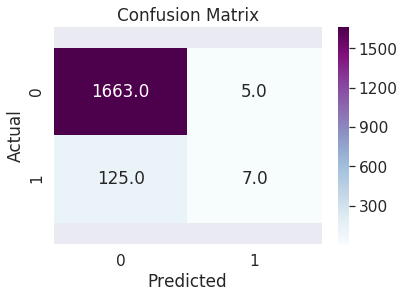



AUC Score: 0.5250163505559189


False Positive Rate: 0.002997601918465228


False Negative Rate: 0.946969696969697


True Negative Rate: 0.9970023980815348


Precision: 0.5833333333333334


Recall: 0.05303030303030303


Report 
              precision    recall  f1-score   support

         0.0       0.93      1.00      0.96      1668
         1.0       0.58      0.05      0.10       132

    accuracy                           0.93      1800
   macro avg       0.76      0.53      0.53      1800
weighted avg       0.90      0.93      0.90      1800



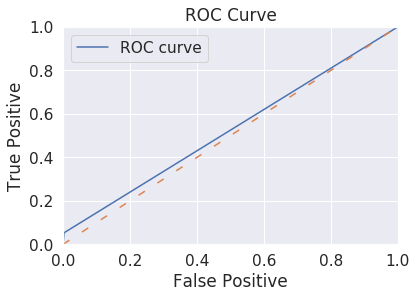

Area : 0.5250163505559189


0.9277777777777778

In [107]:
knn_model =KNeighborsClassifier(n_neighbors = knn_best_param['n_neighbors'])
knn_accuracy = train_and_test_model(knn_model)
knn_accuracy

K-en yakın komşu modelimizi oluşturduk ve daha sonra veriseti ile eğitilip test edilmesi için **train_and_test_model()** fonksiyonuna parametre olarak gönderdik. Burada verisetimiz ile model oluşturuldu ve test edildi. Yukarıda k- en yakın komşu algoritması ile oluşturulan modelin performansına ilişkin çıktılar bulunmaktadır. Modelin performansına ilişkin elde ettiğimiz bu sonuçları değerlendirmek gerekirse : Öncelikli olarak modelimizin **test doğruluk oranı %92 dir**. Bu yeterince yüksek bir orandır. Modelimizin **eğitim doğruluk oranı da %93 tür**. Eğitim doğruluk oranı test doğruluk oranından yüksek gelmiştir. Ancak aradaki fark çok fazla değildir. Bunun nedeni optimum parametrelerin eğitim verisetine göre seçilmesi olabilir. Model, eğitim ve test doğruluk oranları birbirine çok yakın geldiği için başarlı sayılabilir.  


Duyarlılık oranı bizim için önemlidir. Duyarlılık akut karaciğer yetmezliğine sahip hastaların kaçının doğru bir şekilde tespit edildiğini gösterir. Verisetimizde akut karaciğer yetmezliğine sahip örneklem sayısı çok az olduğu için düşük bir değer elde ettik. Bu oranı değerlendirirken elde ettiğimiz değerleri diğer modellerde elde ettiğimiz değerlerle kıyaslamayı tercih ettik. Burada veriseti eşit dağılmadığı için modelleri karşılaştırırken f1-score değerini kullandık. **KNN modelinde pozitif hastalar için f1-score 0.10 dur.**


ROC curve grafiğini incelediğimizde eğri altında kalan alanın **(AUC) değerinin %52 olduğunu gördük.** Grafiğimiz sol üst köşeye oldukça uzaktır. Bu da düşük bir AUC elde etmemize neden olur. Kesinlik , duyarlılık değerleri negatif sınıf etiketi için yüksek pozitif sınıf etiketi için düşük gelmiştir bunun nedeni verisetindeki pozitif örneklem sayısının az olmasıdır. 

### Karar Ağacı Sınıflandırıcısı (Decision Tree Classifier)

Karar ağaçları  sınıflandırıcısı karar düğümleri  ve yaprak düğümlerinden (leaf nodes) oluşur. Karar ağaçları , ağaç yapısı formunda bir model oluşturur ve bu şekilde sınıflandırma yapar. Karar ağacı algoritması, verilen veri setini küçük parçalara bölerek modeli geliştirilir. Bir karar düğümü bir veya birden fazla dallanma içerebilir. Karar ağacı algoritması sayısal veya sayısal olmayan veriler üzerinde işlem yapabilir. Karar ağacı sınıflandırıcıları genelde daha karmaşık sınıflandırma modelleri için kullanılır. Karar ağacı sınıflandırıcısı parametik olmayan bir algoritmadır.


Karar ağacı sınıflandırıcısı algoritmasının bazı avantajları şu şekildedir: Karar ağacı sınıflandırıcısı algoritması verinin normalleştirilmesini gerektirmez. Ayrıca bu algoritma verinin ölçeklendirilmesini gerektirmez. Bu özellik verinin hazırlanması aşamasını önemli ölçüde kısaltır. 


Karar ağacı sınıflandırıcısı modeli oluşturmak için scikit-learn kütüphanesinde bulunan **DecisionTreeClassifier** sınıfını kullanacağız. Bu modele parametre olarak GridSearchCV ile elde ettiğimiz optimum parametreleri vereceğiz.

Test Accuracy  : 0.8822222222222222
Train Accuracy  : 0.9990476190476191


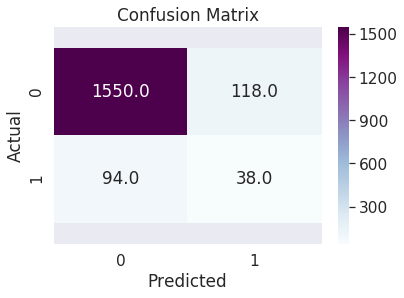



AUC Score: 0.6085676913015042


False Positive Rate: 0.07074340527577938


False Negative Rate: 0.7121212121212122


True Negative Rate: 0.9292565947242206


Precision: 0.24358974358974358


Recall: 0.2878787878787879


Report 
              precision    recall  f1-score   support

         0.0       0.94      0.93      0.94      1668
         1.0       0.24      0.29      0.26       132

    accuracy                           0.88      1800
   macro avg       0.59      0.61      0.60      1800
weighted avg       0.89      0.88      0.89      1800



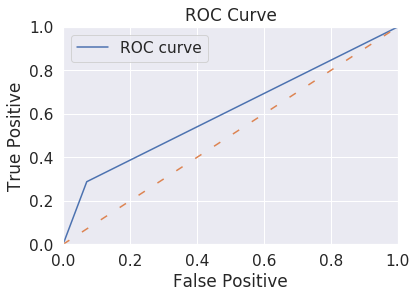

Area : 0.6085676913015042


0.8822222222222222

In [108]:
decision_tree_model = DecisionTreeClassifier(max_depth= decisiontree_best_param['max_depth'],
                                             min_samples_leaf=decisiontree_best_param['min_samples_leaf'])
decisiontree_accuracy = train_and_test_model(decision_tree_model)
decisiontree_accuracy

Karar ağacı sınıflandırıcısı modelimizi oluşturduk ve daha sonra verisetimiz ile eğitilip test edilmesi için **train_and_test_model()** fonksiyonuna parametre olarak gönderdik. Burada verisetimiz ile model oluşturuldu ve test edildi. Yukarıda karar ağacı sınıflandırması kullanarak oluşturduğumuz modelin performansına ait sonuçlar görülmektedir. 


Modelimizin performansını değerlendirecek olursak : modelimizin **doğruluk oranı (test doğruluğu) %88** olarak gelmiştir. Modelin **eğitim doğruluk oranı ise %100** olarak gelmiştir. Modelin eğitim doğruluk oranı test doğruluk oranından yüksek gelmiştir. Burada aşırı öğrenme(overfitting) durumu söz konusudur. Bunda optimum parametrelerin belirlenirken eğitim verilerinin kullanılmasının payı olabilir. 


Karar ağacı sınıflandırıcısı modelinde  yanlış negatif oranı KNN modeline göre düşmüştür. **Yani Karar ağacı sınıflandırıcısı KNN modeline göre akut karaciğer yetmezliği olan hastaları daha az yanlış tahmin etmektedir.** Duyarlılık ise KNN modeline göre yükselmiştir.Bu Karar ağacı sınıflandırıcısının daha iyi olduğunu gösterir. Bu Yine burada veriseti pozitif ve negatif veriler açısından çok dengesiz dağıldığı için duyarlılık değerleri bu sınıflar için oldukça farklıdır. **f1- score Karar ağacı sınıflandırıcısı modelinde pozitif hastalariçin 0.26 dır**. KNN den yüksektir.


ROC eğrisi ve ROC eğrisi altında kalan alan (AUC) incelendiğinde **AUC değerinin %62 olduğu görülmektedir.** Karar ağacı modeli için AUC değerinin de KNN modeli için AUC değerine göre daha yüksek olduğu görülmektedir. Karar ağacı sınıflandırıcısı modeli için çizilen ROC eğrisi sol köşeye daha eğilimlidir. Bu da modelin daha doğru çalıştığını gösterir.

### Destek Vektör Makineleri (Support Vector Machines)

Destek vektör makineleri(SVM) genellikle karmaşık ama küçük ve orta ölçekli versetleri için uygundur. SVM basitçe anlatmak gerekirse ; bir düzlem üzerine yerleştirilmiş noktaları ayırmak için bir doğru çizer ve noktaları sınıflara ayırır. Ancak burada önemli olan kısım SVM in çizdiği bu doğrunun, ayrılan iki sınıfının noktaları için de maksimum uzaklıkta olması gerektiğidir. SVM bu doğruyu bulmaya çalışır.

Destek vektör makineleri yüksek boyutlu ama nispeten orta ve küçük örnekli verisetlerinde çok iyi çalışır. Destek vektör makineleri çok sayıda parametreye sahiptir. Bu parametreler istenilen şekilde ayarlanarak oluşturulacak model iyileştirilebilir. Ayrıca destep vektör makineleri parametik olmayan bir algoritmadır.

Biz burada destek vektör makineleri modeli oluşturmak için scikit-learn kütüphanesinde bulunan **SVC** sınıfını kullanacağız. SVC sınıfından nesne oluştururken parametre olarak GridSearchCV ile elde ettiğimiz optimum değerleri vereceğiz.

Test Accuracy  : 0.9266666666666666
Train Accuracy  : 0.920952380952381


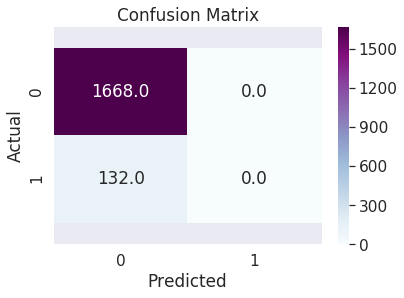



AUC Score: 0.5


False Positive Rate: 0.0


False Negative Rate: 1.0


True Negative Rate: 1.0


Precision: nan


Recall: 0.0


Report 
              precision    recall  f1-score   support

         0.0       0.93      1.00      0.96      1668
         1.0       0.00      0.00      0.00       132

    accuracy                           0.93      1800
   macro avg       0.46      0.50      0.48      1800
weighted avg       0.86      0.93      0.89      1800



/home/dilara/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in true_divide
/home/dilara/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


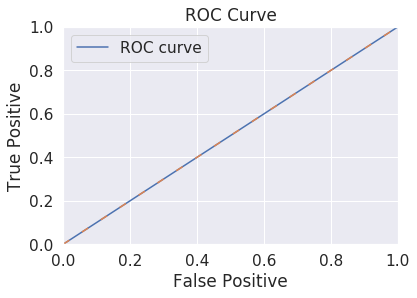

Area : 0.5


0.9266666666666666

In [109]:
svc_model =  SVC(C=svm_best_param['C'],
                 kernel=svm_best_param['kernel'],probability=True,)
svc_accuracy = train_and_test_model(svc_model)
svc_accuracy

Destek vektör makineleri modelimizi oluşturduk ve daha sonra verisetimiz ile eğitilip test edilmesi için **train_and_test_model()** fonksiyonuna parametre olarak gönderdik. Burada verisetimiz ile model oluşturuldu ve test edildi. Yukarıda Destek vektör makineleri kullanarak oluşturduğumuz modelin performansına ait sonuçlar görülmektedir.

Modelimizin performansını değerlendirecek olursak : modelimizin **doğruluk oranı (test doğruluğu) %92** olarak gelmiştir. Modelin **eğitim doğruluk oranı ise %92** olarak gelmiştir. Modelin test doğruluk oranı eğitim doğruluk oranından yüksek gelmiştir. Ancak aralarındaki fark gözardı edilebilecek kadar azdır. 

Destek vektör makineleri modelinde, yanlış negatif oranı  KNN modelinden ve karar ağacı sınıflandırıcısı modelinden daha yüksek gelmiştir. **Yani destek vektör makineleri modeli KNN modeline ve karar ağacı modeline göre akut karaciğer yetmezliği olan hastaların daha çoğunu yanlış bir şekilde tespit etmektedir.** Yine burada veriseti, pozitif ve negatif veriler açısından çok dengesiz dağıldığı için duyarlılık değerleri pozitif sınıf için bu şekildedir. Çünkü verisetinde pozitif örneklem sayısı çok azdır. **Destek vektör makineleri modeli , Karar ağacı sınıflandırıcısı modeline ve KNN modeline göre daha düşük performans göstermiştir.**

ROC eğrisi ve ROC eğrisi altında kalan alan (AUC) incelendiğinde **AUC değerinin %50 olduğu görülmektedir.** Destek vektör makineleri için AUC değeri , Karar ağacı modeli ve KNN modeli için AUC değerlerine göre daha düşüktür.  Destek vektör makineleri modeli için çizilen ROC eğrisi sol köşeye eğilimli değildir. Bu da modelin performansının düşük olduğunu gösterir.

### Lojisik Regresyon (Logistic Regression)

Lojistik regresyon bağımlı değişkene göre sınıflandırma yapan bir algoritmadır. Regresyon olarak adlandırılmasına rağmen bağımlı değişkenin kategorik değerlerdir. Ve algoritma verileri bu değişkenlere göre sınıflandırır. Bu yüzden bir sınıflandırma algoritmasıdır. Model eğitildikten sonra test verisilojistik regresyon modeli ile çok hızlı bir şekilde sınıflandırılabilir. 


Biz burada Lojistik regresyon modeli oluşturmak için scikit-learn kütüphanesinde bulunan **LogisticRegression** sınıfını kullanacağız. LogisticRegression sınıfından nesne oluştururken parametre olarak GridSearchCV ile elde ettiğimiz optimum değerleri vereceğiz.

/home/dilara/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Test Accuracy  : 0.9244444444444444
Train Accuracy  : 0.9252380952380952


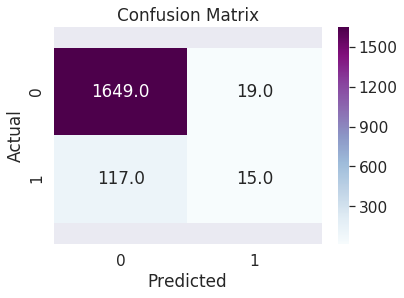



AUC Score: 0.5511227381730979


False Positive Rate: 0.011390887290167866


False Negative Rate: 0.8863636363636364


True Negative Rate: 0.9886091127098321


Precision: 0.4411764705882353


Recall: 0.11363636363636363


Report 
              precision    recall  f1-score   support

         0.0       0.93      0.99      0.96      1668
         1.0       0.44      0.11      0.18       132

    accuracy                           0.92      1800
   macro avg       0.69      0.55      0.57      1800
weighted avg       0.90      0.92      0.90      1800



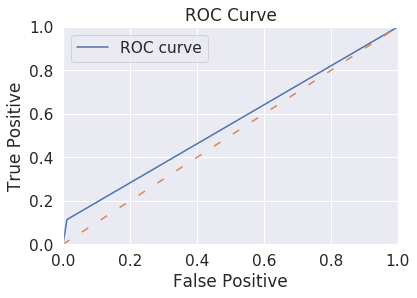

Area : 0.5511227381730979


0.9244444444444444

In [110]:
lr_model =LogisticRegression(C = lr_best_param['C'], 
                                penalty = lr_best_param['penalty'])
lr_accuracy = train_and_test_model(lr_model)
lr_accuracy

Lojistik regresyon modelimizi oluşturduk ve daha sonra verisetimiz ile eğitilip test edilmesi için train_and_test_model() fonksiyonuna parametre olarak gönderdik. Burada verisetimiz ile model oluşturuldu ve test edildi. Yukarıda Lojistik regresyon  kullanarak oluşturduğumuz modelin performansına ait sonuçlar görülmektedir.

Modelimizin performansını değerlendirecek olursak : modelimizin **doğruluk oranı (test doğruluğu) %92** olarak gelmiştir. Modelin **eğitim doğruluk oranı ise %92** olarak gelmiştir. Modelin eğitim doğruluk oranı test doğruluk oranından yüksek gelmiştir. Ancak aralarındaki fark gözardı edilebilecek kadar azdır.

Lojistik regresyon modelinde, yanlış negatif oranı KNN modelinden düşük, karar ağacı sınıflandırıcısı modelinden yüksek gelmiştir. Duyarlılık ise KNN modelinden yüksek karar ağacı sınıflandırıcısı modelinden düşük gelmiştir. **Yani lojistik regresyon modeli, karar ağacı sınıflandırıcısı modeline göre akut karaciğer yetmezliği olan hastaların daha çoğunu yanlış sınıflandırmaktadır.**  Çünkü verisetinde pozitif örneklem sayısı çok azdır. Lojistik regresyon modeli , KNN modelinden daha iyi , Karar ağacı sınıflandırıcısı modelinden daha düşük performans göstermiştir. **f1-score 0.18 dir. Yani KNN den daha yüksek ama karar ağacı sınıflandırıcısından daha düşüktür.**

ROC eğrisi ve ROC eğrisi altında kalan alan (AUC) incelendiğinde **AUC değerinin %55 olduğu görülmektedir**. Lojistik regresyon modeli için AUC değeri , Karar ağacı sınıflandırıcısı modeli için AUC değerlerine göre daha düşüktür. Lojistik regresyon modeli için çizilen ROC eğrisi sol köşeye çok eğilimli değildir. Bu da modelin performansının yüksek olmadığını gösterir.

### Rassal Orman Sınıflandırıcısı (Random Forest Classifier)

Rassal orman sınıflandırıcısı algoritması hiperparametre ayrımı yapmadan bile yüksek performans gösteren kullanımı kolay ve esnek bir sınıflandırma algoritmasıdır.


Rassal orman sınıflandırıcısı , karar ağacı sınıflandırıcısı algoritmasında meydana gelebilen aşırı öğrenme sorununu çözmek için geliştirilmiştir. Bu sorunu çözmek için Rassal orman modeli hem veri setinden hem de öznitelik setinden rassal olarak 100'lerce farklı alt-setler seçer ve bunları eğitir. Bu yöntemle 100'lerce farklı karar ağacı oluşturur ve her bir karar ağacı bireysel olarak tahminde bulunur. 


Biz burada Rassal orman sınıflandırıcısı modeli oluşturmak için scikit-learn kütüphanesinde bulunan **RandomForestClassifier** sınıfını kullanacağız. RandomForestClassifier sınıfından nesne oluştururken parametre olarak GridSearchCV ile elde ettiğimiz optimum değerleri vereceğiz.

Test Accuracy  : 0.9288888888888889
Train Accuracy  : 0.9447619047619048


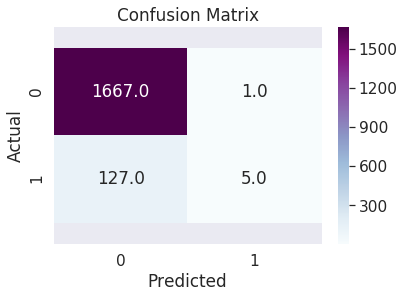



AUC Score: 0.5186396337475474


False Positive Rate: 0.0005995203836930455


False Negative Rate: 0.9621212121212122


True Negative Rate: 0.999400479616307


Precision: 0.8333333333333334


Recall: 0.03787878787878788


Report 
              precision    recall  f1-score   support

         0.0       0.93      1.00      0.96      1668
         1.0       0.83      0.04      0.07       132

    accuracy                           0.93      1800
   macro avg       0.88      0.52      0.52      1800
weighted avg       0.92      0.93      0.90      1800



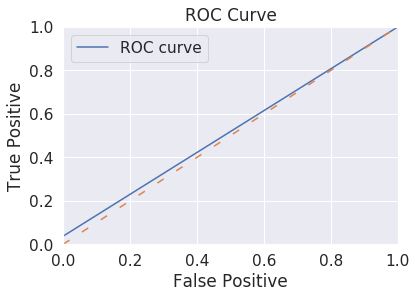

Area : 0.5186396337475474


0.9288888888888889

In [111]:
random_forest_model = RandomForestClassifier(n_estimators= randomforest_best_param['n_estimators'],
                                           max_features= randomforest_best_param['max_features'],
                                            max_depth=randomforest_best_param['max_depth'],
                                            criterion=randomforest_best_param['criterion'])
randomforest_accuracy= train_and_test_model(random_forest_model)
randomforest_accuracy


Rassal orman sınıflandırıcısı modelimizi oluşturduk ve daha sonra verisetimiz ile eğitilip test edilmesi için train_and_test_model() fonksiyonuna parametre olarak gönderdik. Burada verisetimiz ile model oluşturuldu ve test edildi. Yukarıda Rassal orman sınıflandırıcısı kullanarak oluşturduğumuz modelin performansına ait sonuçlar görülmektedir.

Modelimizin performansını değerlendirecek olursak : modelimizin **doğruluk oranı (test doğruluğu) %92** olarak gelmiştir. Modelin **eğitim doğruluk oranı ise %93** olarak gelmiştir. Modelin eğitim doğruluk oranı test doğruluk oranından yüksek gelmiştir. Ancak aralarındaki fark gözardı edilebilecek kadar azdır.


Rassal orman sınıflandırıcısı modelinde, yanlış negatif oranı KNN modelinden , karar ağacı sınıflandırıcısı modelinden ve lojistik regresyon modelinden yüksek gelmiştir. **Yani Rassal orman sınıflandırıcısı modeli daha az hastaya karaciğer yetmezliği tanısı koymaktadır.** Yine burada veriseti, pozitif ve negatif veriler açısından çok dengesiz dağıldığı için duyarlılık değerleri pozitif sınıf için bu şekildedir. Çünkü verisetinde pozitif örneklem sayısı çok azdır. **Rassal orman sınıflandırıcısı modeli, Karar ağacı sınıflandırıcısı modeline ,lojistik regresyon modeline ve KNN modeline göre daha düşük performans göstermiştir.** Pozitif hastalar için **f1-score 0.07** dir.


ROC eğrisi ve ROC eğrisi altında kalan alan (AUC) incelendiğinde **AUC değerinin %50 olduğu görülmektedir.** Rassal orman sınıflandırıcısı modeli için AUC değeri , Karar ağacı sınıflandırıcısı modeline , lojistik regresyon modeline göre daha düşüktür. Rassal orman sınıflandırıcısı modeli için çizilen ROC eğrisi sol köşeye eğilimli değildir. Bu da modelin başarılı olmadığını gösterir.

### AdaBoost Sınıflandırıcısı (AdaBoost Classifier)

Boosting algoritmalarının amacı zayıf makine öğrenme modellerini tespit edip bu modellerdeki doğru tahminleri güçlendirmektir. Bu amaçla en çok kullanılan moosting algoritmalarından biri adaBoost algoritmasıdır. 


Bir AdaBoost sınıflandırıcısı oluşturmak için gerçekleşen adımlar şu şekildedir: birinci sınıf ilk önce eğitilir ve bazı örnekler üzerinde tahminler yapar. Yanlış tahmin ettiği durumlar için göreceli ağırlık artırılır ve daha önemli hale gelir. İkinci bir sınıflandırıcı güncellenmiş ağırlıklar kullanılarak tekrar eğitilir ve yine tahminler yapar, ağırlıklar yine güncellenir, bu işlem son aşamaya kadar tekrarlanır. Böylece daha doğru sonuçlar elde edilir.


Biz burada AdaBoost sınıflandırıcısı modeli oluşturmak için scikit-learn kütüphanesinde bulunan **AdaBoostClassifier** sınıfını kullanacağız. AdaBoostClassifier sınıfından nesne oluştururken parametre olarak GridSearchCV ile elde ettiğimiz optimum değerleri vereceğiz.

Test Accuracy  : 0.9277777777777778
Train Accuracy  : 0.9257142857142857


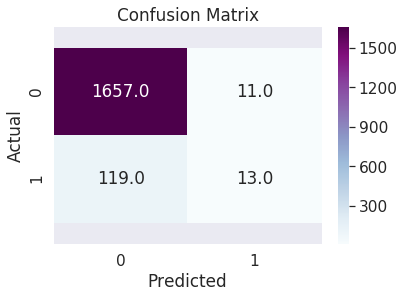



AUC Score: 0.5459450621321125


False Positive Rate: 0.006594724220623501


False Negative Rate: 0.9015151515151515


True Negative Rate: 0.9934052757793765


Precision: 0.5416666666666666


Recall: 0.09848484848484848


Report 
              precision    recall  f1-score   support

         0.0       0.93      0.99      0.96      1668
         1.0       0.54      0.10      0.17       132

    accuracy                           0.93      1800
   macro avg       0.74      0.55      0.56      1800
weighted avg       0.90      0.93      0.90      1800



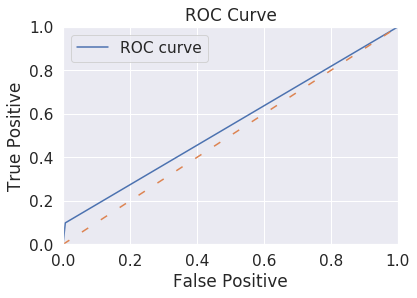

Area : 0.5459450621321125


0.9277777777777778

In [112]:
ada_boost_model = AdaBoostClassifier(n_estimators=adaBoost_best_param['n_estimators'],
                                     learning_rate=adaBoost_best_param['learning_rate'])
adaBoost_accuracy = train_and_test_model(ada_boost_model)
adaBoost_accuracy

AdaBoost sınıflandırıcısı modelimizi oluşturduk ve daha sonra verisetimiz ile eğitilip test edilmesi için train_and_test_model() fonksiyonuna parametre olarak gönderdik. Burada verisetimiz ile model oluşturuldu ve test edildi. Yukarıda AdaBoost sınıflandırıcısı kullanarak oluşturduğumuz modelin performansına ait sonuçlar görülmektedir.

Modelimizin performansını değerlendirecek olursak : modelimizin **doğruluk oranı (test doğruluğu) %92** olarak gelmiştir. Modelin **eğitim doğruluk oranı ise %92** olarak gelmiştir. Modelin test doğruluk oranı eğitim doğruluk oranından yüksek gelmiştir. Ancak aralarındaki fark gözardı edilebilecek kadar azdır.


AdaBoost sınıflandırıcısı modelinde, yanlış negatif oranı  karar ağacı sınıflandırıcısı modelinden ve lojistik regresyon modelinden yüksek gelmiştir. **Yani AdaBoost sınıflandırıcısı modeli karar ağacı sınıflandırıcısı modeline göre daha az hastaya karaciğer yetmezliği tanısı koymaktadır.** Yanlış negatif oranının bu kadar yüksek olmasının nedeni verisetinin, pozitif ve negatif veriler açısından çok dengesiz dağılmış olmasıdır. Çünkü verisetinde pozitif örneklem sayısı çok azdır. **AdaBoost sınıflandırıcısı modeli, Karar ağacı sınıflandırıcısı modeline ,lojistik regresyon modeline göre daha düşük performans göstermiştir.** Pozitif hastalar için f1-score 0.17 dir.


ROC eğrisi ve ROC eğrisi altında kalan alan (AUC) incelendiğinde **AUC değerinin %54 olduğu görülmektedir.** AdaBoost  sınıflandırıcısı modeli için AUC değeri , Karar ağacı sınıflandırıcısı modeline , lojistik regresyon modeline göre daha düşüktür. AdaBoost sınıflandırıcısı modeli için çizilen ROC eğrisi sol köşeye çok eğilimli değildir. Bu da modelin performansının yüksek olmadığını gösterir.

## Özellik Önemi

Bir önceki bölümde farklı sınıflandırma modelleri oluşturduk. Daha sonra bu modellerin doğruluklarını ve erformanslarını inceledik. Burada ise analizlerimiz sonucunda verisetimize göre en doğru iki sınıflandırma modeli seçip bu modeller üzerinde verisetindeki özelliklerin ne kadar önemli olduğunu hesapladık. Seçtiğimiz modeller rassal orman siniflandırıcısı ve adaBoost sınıflandırıcısıdır. Bu iki model sonucunda da en önemli 5 özellik şu şekildedir:

- Age
- Maximum Blood Pressure
- Minimum Blood Pressure
- Body Mass Index
- Total Cholesterol

### Random Forest Classifier

Feature: Gender, Score: 0.01198
Feature: Region, Score: 0.02344
Feature: Obesity, Score: 0.00905
Feature: Dyslipidemia, Score: 0.00705
Feature: PVD, Score: 0.02040
Feature: Physical Activity, Score: 0.02327
Feature: Education, Score: 0.01233
Feature: Unmarried, Score: 0.01253
Feature: Income, Score: 0.01206
Feature: Source of Care, Score: 0.02035
Feature: PoorVision, Score: 0.01593
Feature: Alcohol Consumption, Score: 0.01208
Feature: HyperTension, Score: 0.04642
Feature: Family  HyperTension, Score: 0.01132
Feature: Diabetes, Score: 0.02564
Feature: Family Diabetes, Score: 0.01314
Feature: Hepatitis, Score: 0.04734
Feature: Family Hepatitis, Score: 0.00908
Feature: Chronic Fatigue, Score: 0.03264
Feature: Age, Score: 0.29213
Feature: Maximum Blood Pressure, Score: 0.10329
Feature: Minimum Blood Pressure, Score: 0.08212
Feature: Body Mass Index, Score: 0.07150
Feature: Total Cholesterol, Score: 0.08492


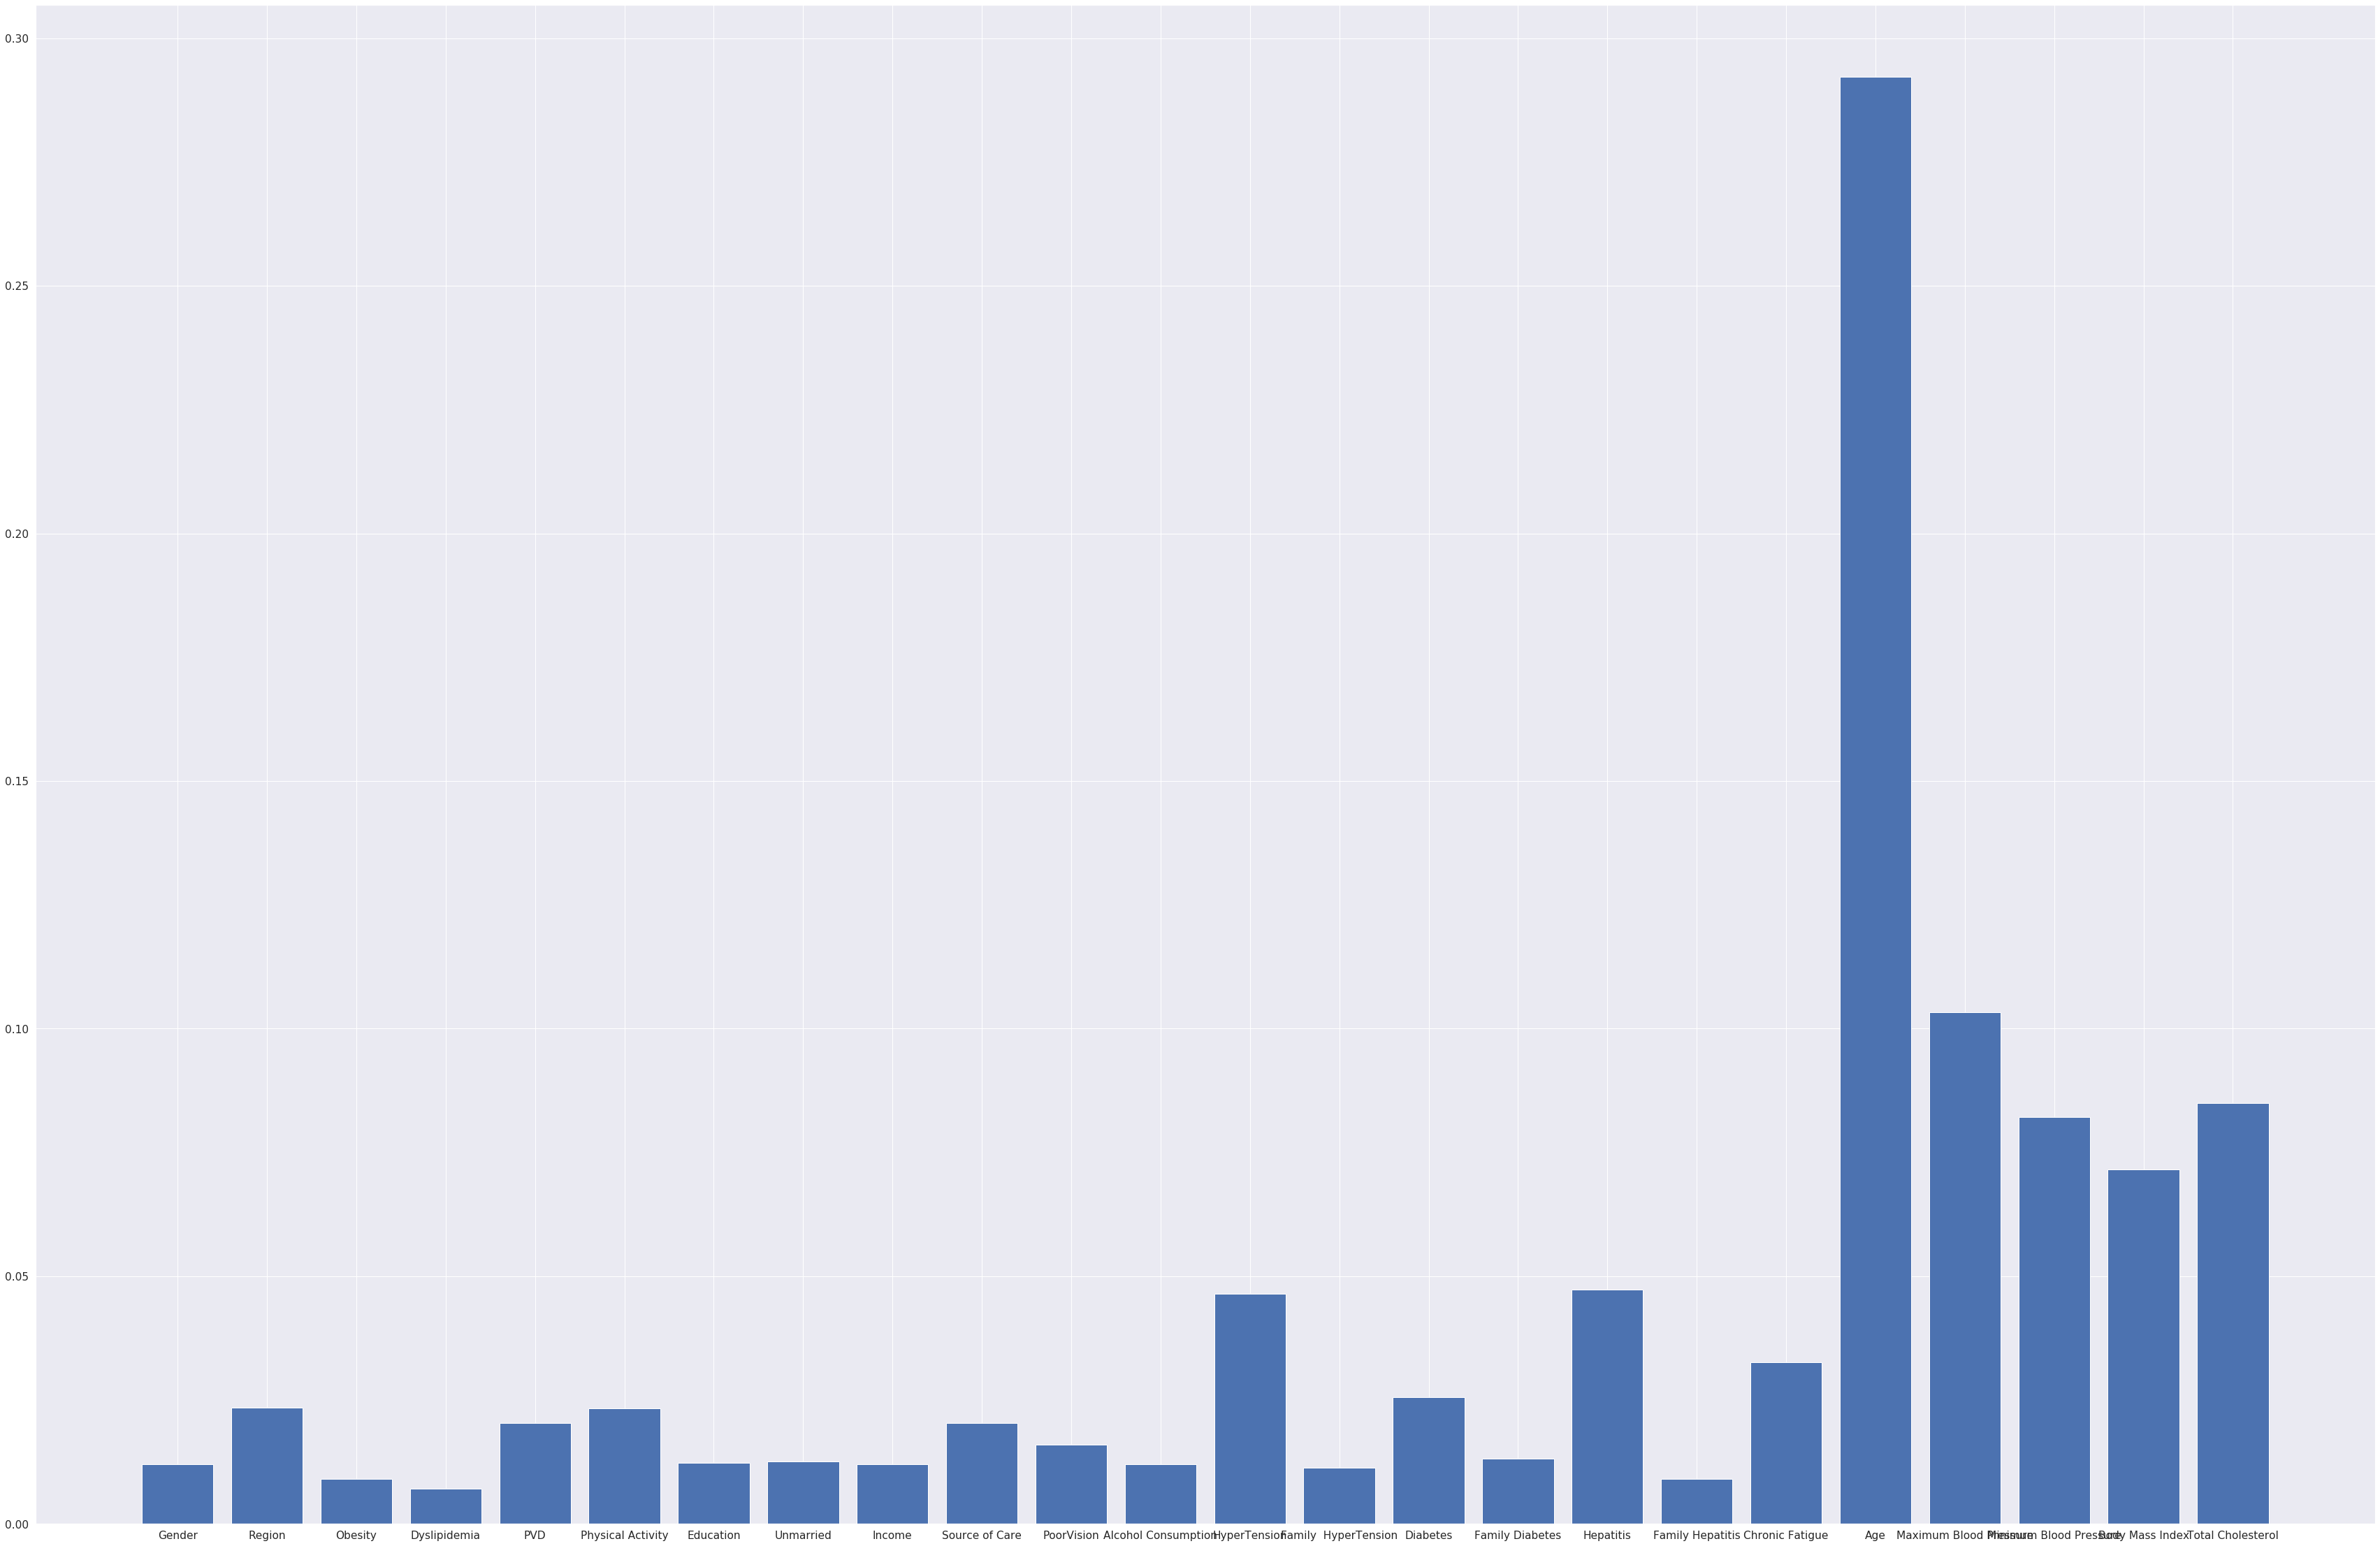

array([0.0119791 , 0.02344142, 0.00904684, 0.00705296, 0.02039593,
       0.02326682, 0.01232682, 0.01253105, 0.01205956, 0.02035398,
       0.01592714, 0.01207896, 0.04642469, 0.01132414, 0.02563711,
       0.01313679, 0.04733622, 0.00908023, 0.03263648, 0.29213225,
       0.10329192, 0.08211654, 0.07149858, 0.08492447])

In [113]:
x= list(normalized_X_train.columns)
random_forest_model = RandomForestClassifier(n_estimators= randomforest_best_param['n_estimators'],
                                           max_features= randomforest_best_param['max_features'],
                                            max_depth=randomforest_best_param['max_depth'],
                                            criterion=randomforest_best_param['criterion'])
random_forest_model.fit(normalized_X_train, Y_train)

featureScores={}
importance = random_forest_model.feature_importances_
for i,v in enumerate(importance):
    print('Feature: %s, Score: %.5f' % (x[i],v))
    featureScores[x[i]]=v
# plot feature importance
plt.figure(figsize=(60,40))
plt.bar(featureScores.keys(), featureScores.values())

plt.show()

importance

### AdaBoost Classifier

Feature: Gender, Score: 0.00000
Feature: Region, Score: 0.05000
Feature: Obesity, Score: 0.00000
Feature: Dyslipidemia, Score: 0.00000
Feature: PVD, Score: 0.01000
Feature: Physical Activity, Score: 0.02000
Feature: Education, Score: 0.00000
Feature: Unmarried, Score: 0.00000
Feature: Income, Score: 0.00000
Feature: Source of Care, Score: 0.01000
Feature: PoorVision, Score: 0.02000
Feature: Alcohol Consumption, Score: 0.00000
Feature: HyperTension, Score: 0.05000
Feature: Family  HyperTension, Score: 0.01000
Feature: Diabetes, Score: 0.03500
Feature: Family Diabetes, Score: 0.02500
Feature: Hepatitis, Score: 0.03000
Feature: Family Hepatitis, Score: 0.07000
Feature: Chronic Fatigue, Score: 0.03500
Feature: Age, Score: 0.29500
Feature: Maximum Blood Pressure, Score: 0.07500
Feature: Minimum Blood Pressure, Score: 0.09000
Feature: Body Mass Index, Score: 0.04500
Feature: Total Cholesterol, Score: 0.13000


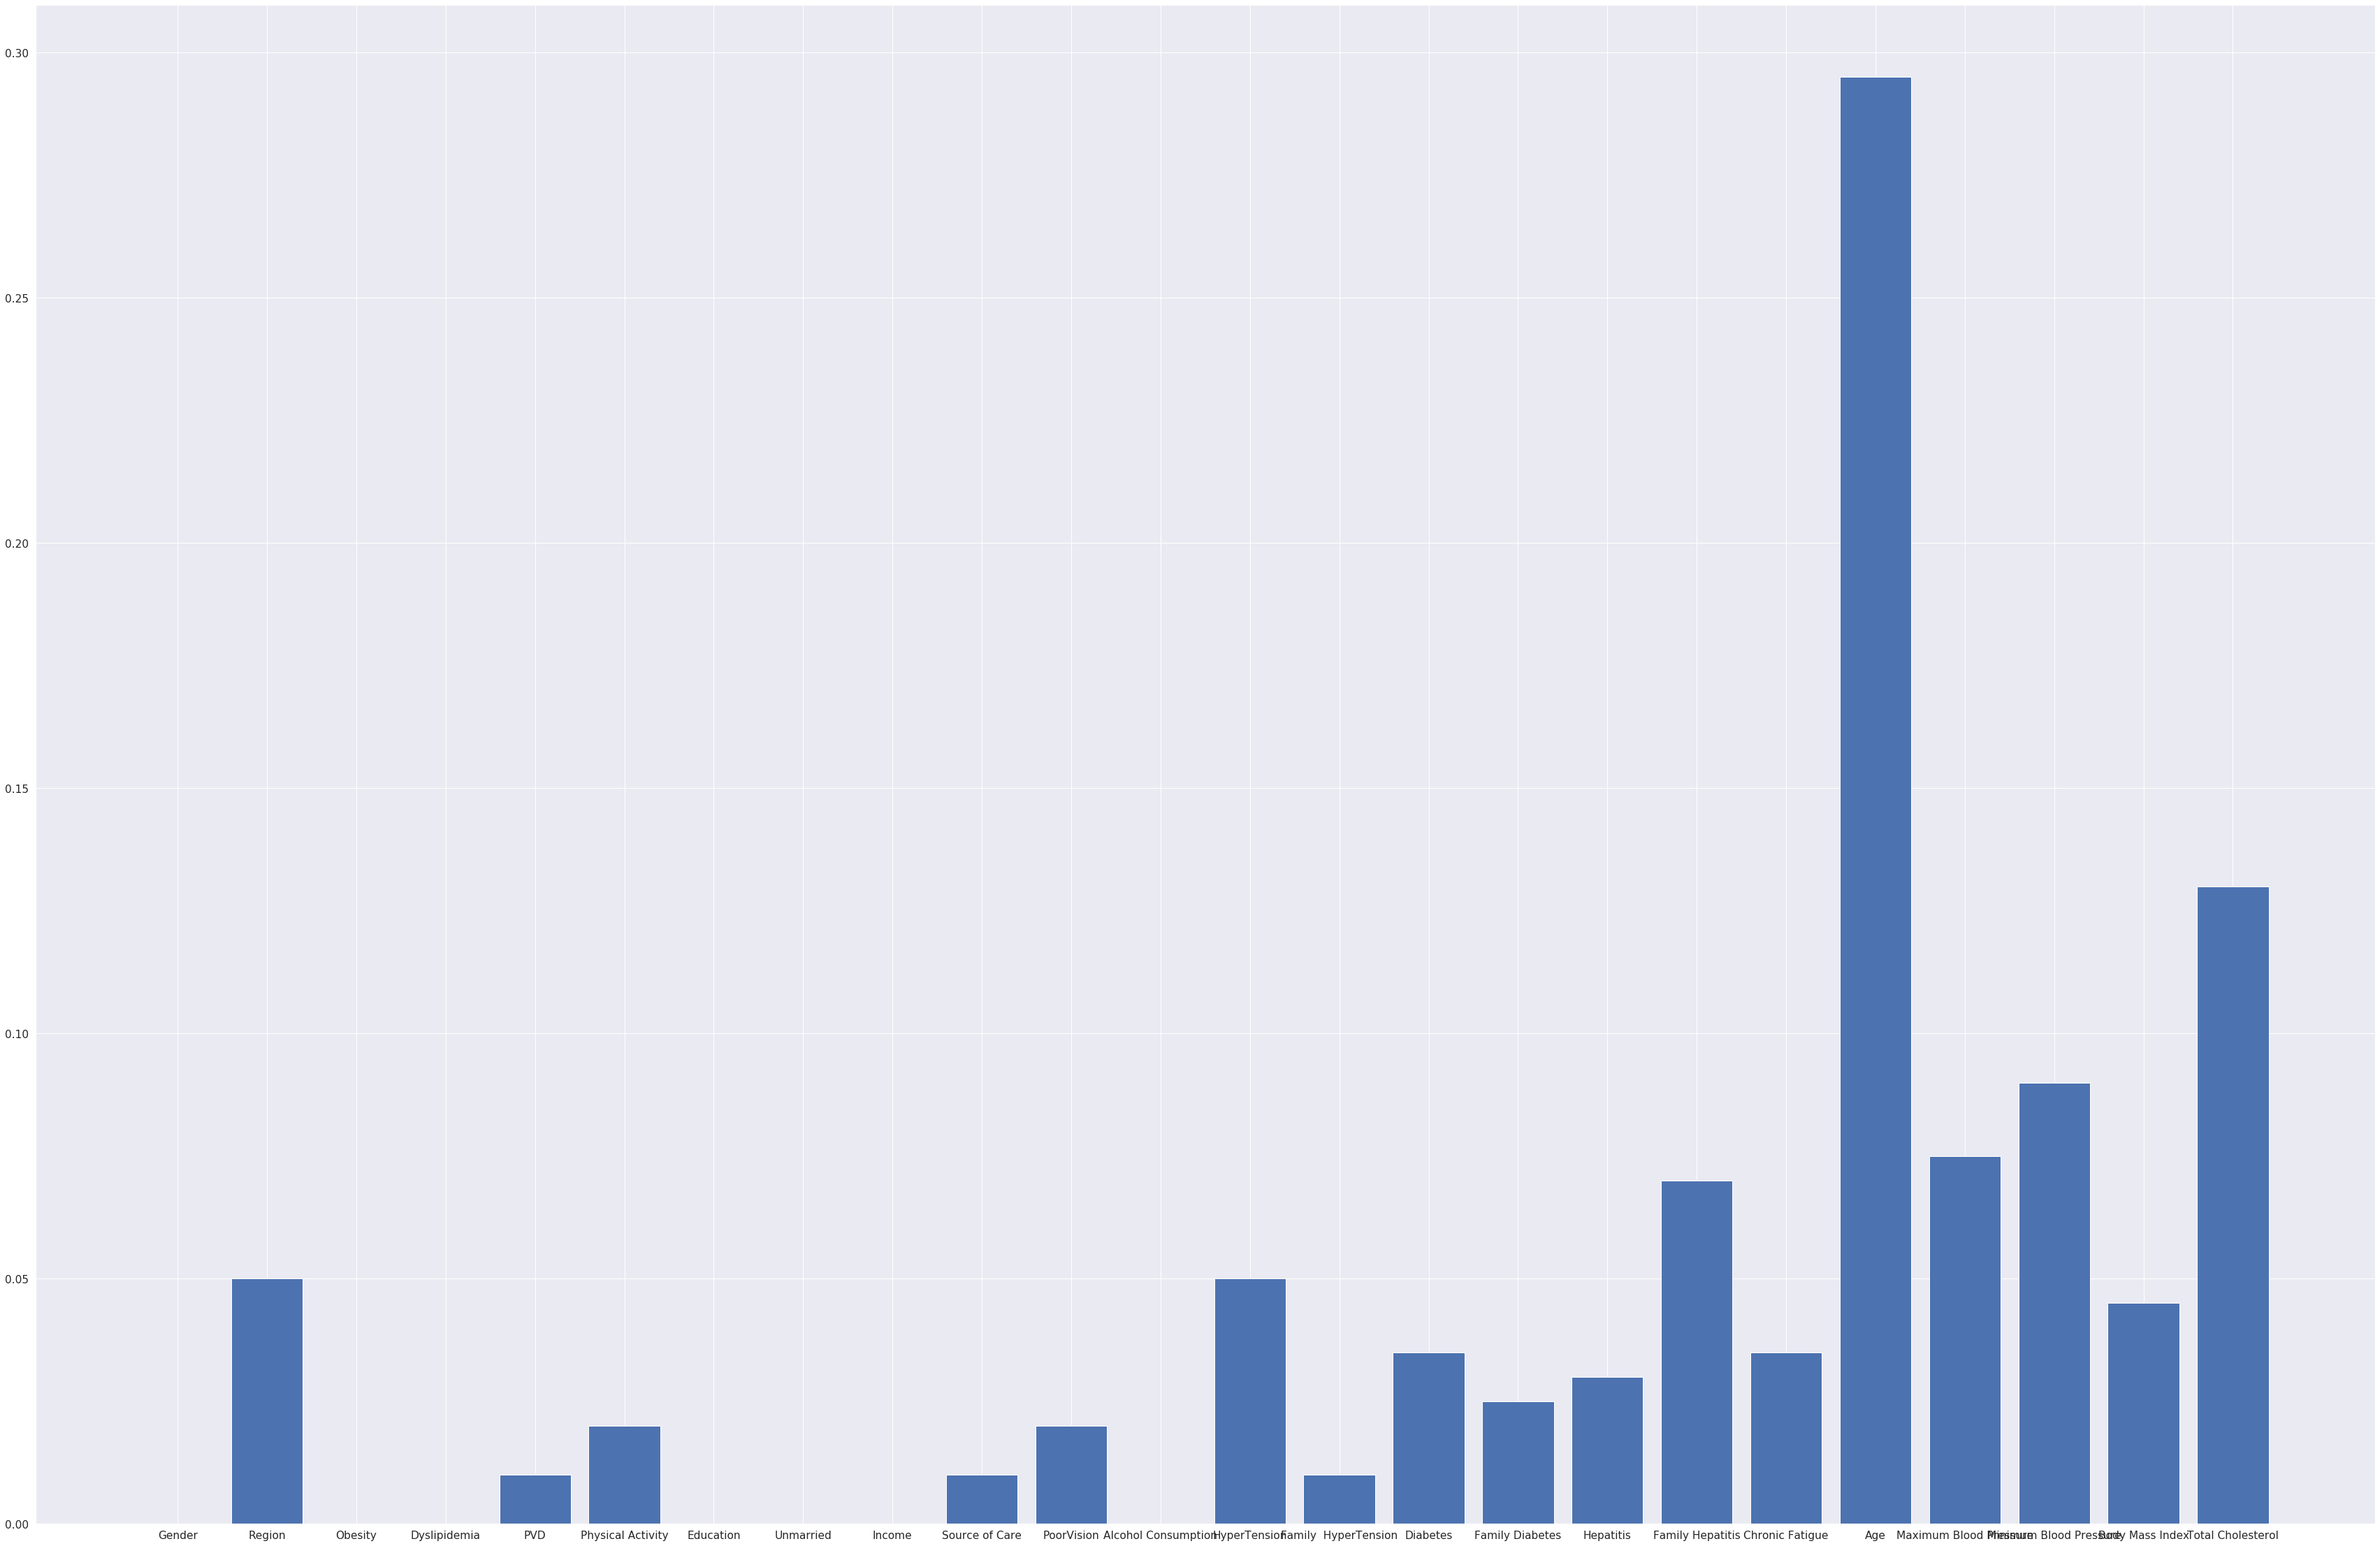

array([0.   , 0.05 , 0.   , 0.   , 0.01 , 0.02 , 0.   , 0.   , 0.   ,
       0.01 , 0.02 , 0.   , 0.05 , 0.01 , 0.035, 0.025, 0.03 , 0.07 ,
       0.035, 0.295, 0.075, 0.09 , 0.045, 0.13 ])

In [114]:
x= list(normalized_X_train.columns)
ada_boost_model = AdaBoostClassifier(n_estimators=adaBoost_best_param['n_estimators'],
                                     learning_rate=adaBoost_best_param['learning_rate'])
ada_boost_model.fit(normalized_X_train, Y_train)

featureScores={}
importance  = ada_boost_model.feature_importances_
for i,v in enumerate(importance):
    print('Feature: %s, Score: %.5f' % (x[i],v))
    featureScores[x[i]]=v
# plot feature importance
plt.figure(figsize=(60,40))
plt.bar(featureScores.keys(), featureScores.values())

plt.show()

importance

# Değerlendirme <a class="anchor" id="evaluation"></a>

In [115]:
model_acc={'KNN': knn_accuracy , 'Decision Tree Classifier': decisiontree_accuracy ,
           'Support Vector Machine' : svc_accuracy , 'Logistic Regression' : lr_accuracy,
          'Random Forest Classifier':randomforest_accuracy,'AdaBoost Classifier' : adaBoost_accuracy}
model_acc

{'KNN': 0.9277777777777778,
 'Decision Tree Classifier': 0.8822222222222222,
 'Support Vector Machine': 0.9266666666666666,
 'Logistic Regression': 0.9244444444444444,
 'Random Forest Classifier': 0.9288888888888889,
 'AdaBoost Classifier': 0.9277777777777778}

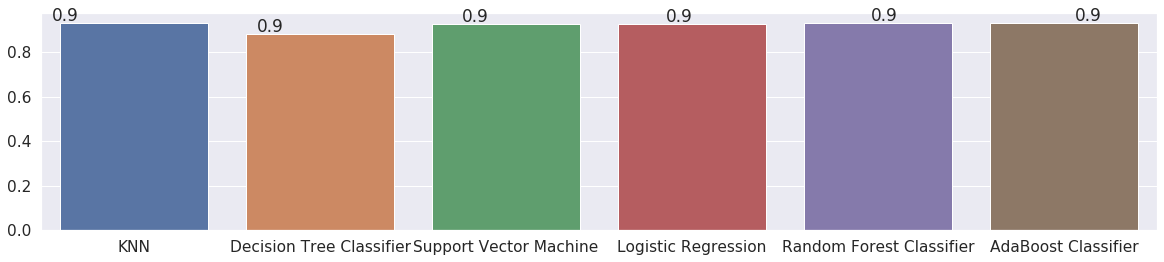

In [116]:
model_results = pd.Series(model_acc)
res = sns.barplot(x=model_results.index, y=model_results.values)

for i in res.patches:
        res.annotate(str(round(i.get_height(), 1)), (i.get_x() * 1.1, i.get_height() * 1.01))
showPlot(fig, x=20)

Akut karaciğer yetmezliği tanısını tespit etmek için 8785 örneklemden ve 30 özellikten oluşan bir dataseti kullandık. Bu veriseti ile makine öğrenmesi modelleri oluşturmadan önce verisetimizi analiz ettik ve modelleme aşamasına hazırladık. Öncelikle datasetini detaylı bir şekilde inceledik. Bu incelemelerimiz sonucunda veriseitndeki özelliklerin veri tiplerini ve veri tesindeki eksik verileri tespit ettik. Verisetindeki özelliklerin hangi değerlere ne şekilde dağıldıklarını görselleştirme yöntemleriyle inceledik.


Veri analizi aşamasında elde ettiğimiz sonuçlar şu şekildedir: 

- Verisetindeki örneklemlerin önemli kısmı 25-30 yaş aralığındadır.
- Verisetindeki örneklemlerin çoğunun yaşadığı bölge doğu bölgesidir.
- Örnek hastaların yarısının vücut kitle index(BMI) değeri 25-30 aralığındadır. 
- Yüksek BMI değerinde sahip hasta gruplarında evli olmayan kişilerin oranı daha yüksektir.
- Yüksek BMI değerine sahip hasta gruplarında erkek hastalar çoğunluktadır.


Daha sonra verisetimizdeki yüksek corelasyona sahip bazı özellikleri versetinden çıkararak verisetini daha basit hale getirmeyi amaçladık. Daha sonra eksik verileri çeşitli yöntemlerle doldurduk. Kategorik değerlere sahip özelliklerin veri tipini numaralandırma yöntemiyle sayısal veri tipine dönüştürdük. 


Modellemeye geçmeden hemen önce daha doğru ve başarılı modeller oluşturmak için verisetindeki sayısal özelliklere normalizasyon işlemi uyguladık. 



Akut karaciğer yetmezliği tanısı için kullandığımız dataset ile 6 farklı sınıflandırma modeli oluşturduk ve modellerin doğruluklarını çeşitli ölçütler ile inceledik. Modellerimizi oluştururken daha başarılı sonuçlar elde etmek ve doğru modeller oluşturmak için **Grid Search** kullandık. Böylece modellerimizin performansında önemli ölçüde artış gözlemledik. Genel olarak çoğu modelin birbirine yakın doğrulukta çalıştığını gözlemledik. **Verisetimizin bağımlı değişkeni olan akut karaciğer yetmezliği(ALF) verisetinde eşit bir şekilde dağılmadığı için modeller üzerinde pozitif hastalar için yeterince doğru sonuç alamadık. Verisetindeki pozitif örneklem sayısı datasetinin sadece %7 sini oluşturmaktadır. Bu durum modelleri eğitirken ve test ederken pozitif örneklerin doğru tahmin edilmesini olumsuz etkilemiştir.** 

Ancak yinede negatif örnekler üzerinde başarılı sonuçlar elde ettik. Doğruluğu en yüksek ve en hassas modellerimiz **Rassal Orman Sınıflandırıcı %92.6** ve **AdaBoost sınıflandırıcı %92.7** oldu. **Pozitif hastalar için f1 score en yüksek olan model karar ağacı sınıflnadırıcısı olmuştur.** Verisetimizde akut karaciğer yetmezliği(ALF) sınıfları birbirlerine daha yakın oranlarda dağılsalardı daha başarılı sonuçlar elde edebilirdik. 

# Referanslar<a class="anchor" id="references"></a>

__1.__ ALF Dataset : https://www.kaggle.com/rahul121/acute-liver-failure

__2.__ Data Visualization : https://learn.datacamp.com/courses/data-visualization-for-everyone

__3.__ Supervised Learning:https://scikit-learn.org/stable/supervised_learning.html

__4.__ AdaBoost Classifier:https://machinelearningmastery.com/adaboost-ensemble-in-python/

__5.__ Random Forest Classifier :https://www.kaggle.com/sociopath00/random-forest-using-gridsearchcv

__6.__ Feature Importance :https://machinelearningmastery.com/calculate-feature-importance-with-python/




**Disclaimer!** <font color='grey'>This notebook was prepared by Dilara İşeri and Umut Aydemir as a term project for the *BBM469 - Data Intensive Applications Laboratory* class. The notebook is available for educational purposes only. There is no guarantee on the correctness of the content provided as it is a student work.

If you think there is any copyright violation, please let us [know](https://forms.gle/BNNRB2kR8ZHVEREq8). 
</font>